In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

## Data Inspection
`Popularity` merupakan jumlah berapa kali lagu tersebut diputar oleh pengguna spotify

### Top Popular Song in Indonesia


In [2]:
# baca data lagu yang populer di indonesia
indo_df = pd.read_csv('spotify_song_indonesia.csv')
indo_df.head()

Unnamed: 0      artist name  \
0           0  Keisya Levronka   
1           1        Ish Kevin   
2           2             Joji   
3           3     Lana Del Rey   
4           4            Tulus   

                                          track name                track id  \
0                                     Tak Ingin Usai  1b0aDgrG775i4sPQgJGmkU   
1                                     My Year (2022)  4eHkG6yWQ4pD0zqVkV0R5a   
2                                      Glimpse of Us  6xGruZOHLs39ZbVccQTuPZ   
3  Summertime Sadness (Lana Del Rey Vs. Cedric Ge...  1kA8kyl733T0Qmy8rOIYeM   
4                                 Hati-Hati di Jalan  2hHeGD57S0BcopfVcmehdl   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          84         0.490   0.398    0    -7.712     1       0.0266   
1          22         0.521   0.683    5    -6.240     0       0.5010   
2          99         0.440   0.317    8    -9.258     1       0.0531   
3           3         0.572   0.810    1    -5.791     0       0.0557   
4          82         0.643   0.436    6   -11.322     1       0.0357   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0        0.8150          0.000187     0.114    0.136  129.772       278500   
1        0.1590          0.000000     0.187    0.737  139.439       161808   
2        0.8910          0.000005     0.141    0.268  169.914       233456   
3        0.0147          0.000007     0.130    0.106  126.045       214912   
4        0.7020          0.088900     0.115    0.755   71.969       242000   

   time_signature  
0               3  
1               3  
2               3  
3               4  
4               4

In [ ]:
# liat jumlah baris dan kolomnya
indo_df.shape

(752, 17)

In [ ]:
# liat info datasetnya
indo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist name       752 non-null    object 
 1   track name        752 non-null    object 
 2   track id          752 non-null    object 
 3   popularity        752 non-null    int64  
 4   danceability      752 non-null    float64
 5   energy            752 non-null    float64
 6   key               752 non-null    int64  
 7   loudness          752 non-null    float64
 8   mode              752 non-null    int64  
 9   speechiness       752 non-null    float64
 10  acousticness      752 non-null    float64
 11  instrumentalness  752 non-null    float64
 12  liveness          752 non-null    float64
 13  valence           752 non-null    float64
 14  tempo             752 non-null    float64
 15  duration_ms       752 non-null    int64  
 16  time_signature    752 non-null    int64  
dt

In [ ]:
# check data kosong
indo_df.isnull().sum()

artist name         0
track name          0
track id            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [ ]:
indo_df[indo_df.duplicated()].count()

artist name         0
track name          0
track id            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [ ]:
indo_df.describe()

popularity  danceability      energy         key    loudness  \
count  752.000000    752.000000  752.000000  752.000000  752.000000   
mean    17.734043      0.617028    0.662403    5.477394   -7.768598   
std     29.639305      0.169953    0.230853    3.624450    5.075794   
min      0.000000      0.069200    0.010900    0.000000  -39.424000   
25%      0.000000      0.512000    0.485000    2.000000   -9.505000   
50%      1.000000      0.640500    0.701500    6.000000   -6.392500   
75%     12.000000      0.746250    0.847000    9.000000   -4.469250   
max     99.000000      0.957000    1.000000   11.000000    1.526000   

             mode  speechiness  acousticness  instrumentalness    liveness  \
count  752.000000   752.000000    752.000000        752.000000  752.000000   
mean     0.570479     0.093698      0.252415          0.190526    0.193837   
std      0.495337     0.107175      0.295489          0.336450    0.156589   
min      0.000000     0.023200      0.000000          0.000000    0.024700   
25%      0.000000     0.036800      0.014475          0.000000    0.095575   
50%      1.000000     0.053650      0.108500          0.000049    0.125000   
75%      1.000000     0.098625      0.443000          0.173250    0.256500   
max      1.000000     0.919000      0.996000          0.978000    0.950000   

          valence       tempo   duration_ms  time_signature  
count  752.000000  752.000000  7.520000e+02      752.000000  
mean     0.493978  122.212437  2.531436e+05        3.917553  
std      0.259593   27.483040  2.744116e+05        0.377264  
min      0.025400   63.495000  2.000000e+04        1.000000  
25%      0.289500  100.239250  1.814362e+05        4.000000  
50%      0.489000  123.038000  2.147300e+05        4.000000  
75%      0.704000  137.953500  2.635708e+05        4.000000  
max      0.974000  200.263000  4.585105e+06        5.000000

In [ ]:
indo_df.describe(include=object)

artist name           track name                track id
count              752                  752                     752
unique             392                  708                     752
top     Workout Music   Happy New Year 2022  1b0aDgrG775i4sPQgJGmkU
freq                33                   18                       1

### Top Popular Song in Korea

In [ ]:
# baca data lagu yang populer di korea
korean_df = pd.read_csv('spotify_song_korea.csv')
korean_df.head()

artist name                                         track name  \
0         Jimin                                           With you   
1     Ish Kevin                                     My Year (2022)   
2  Charlie Puth            Left and Right (Feat. Jung Kook of BTS)   
3  Lana Del Rey  Summertime Sadness (Lana Del Rey Vs. Cedric Ge...   
4           BTS                                        Yet To Come   

                 track id  popularity  danceability  energy  key  loudness  \
0  2gzhQaCTeNgxpeB2TPllyY          86         0.532   0.426    3    -6.117   
1  4eHkG6yWQ4pD0zqVkV0R5a          22         0.521   0.683    5    -6.240   
2  0mBP9X2gPCuapvpZ7TGDk3          94         0.881   0.592    2    -4.898   
3  1kA8kyl733T0Qmy8rOIYeM           3         0.572   0.810    1    -5.791   
4  10SRMwb9EuVS1K9rYsBfHQ          93         0.559   0.885    1    -4.515   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0288        0.6390          0.000000    0.1340    0.137   
1     0       0.5010        0.1590          0.000000    0.1870    0.737   
2     1       0.0324        0.6190          0.000013    0.0901    0.719   
3     0       0.0557        0.0147          0.000007    0.1300    0.106   
4     1       0.1890        0.0432          0.000000    0.3330    0.683   

     tempo  duration_ms  time_signature  
0  149.898       201905               3  
1  139.439       161808               3  
2  101.058       154487               4  
3  126.045       214912               4  
4  172.029       193594               4

In [ ]:
korean_df.shape

(788, 17)

In [ ]:
korean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist name       788 non-null    object 
 1   track name        788 non-null    object 
 2   track id          788 non-null    object 
 3   popularity        788 non-null    int64  
 4   danceability      788 non-null    float64
 5   energy            788 non-null    float64
 6   key               788 non-null    int64  
 7   loudness          788 non-null    float64
 8   mode              788 non-null    int64  
 9   speechiness       788 non-null    float64
 10  acousticness      788 non-null    float64
 11  instrumentalness  788 non-null    float64
 12  liveness          788 non-null    float64
 13  valence           788 non-null    float64
 14  tempo             788 non-null    float64
 15  duration_ms       788 non-null    int64  
 16  time_signature    788 non-null    int64  
dt

In [ ]:
# check data kosong
korean_df.isnull().sum()

artist name         0
track name          0
track id            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [ ]:
korean_df[korean_df.duplicated()].count()

artist name         0
track name          0
track id            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [ ]:
korean_df.describe()

popularity  danceability      energy         key    loudness  \
count  788.000000    788.000000  788.000000  788.000000  788.000000   
mean    20.206853      0.624671    0.667143    5.310914   -7.639503   
std     29.333842      0.161779    0.227969    3.652439    5.183347   
min      0.000000      0.095500    0.010900    0.000000  -39.424000   
25%      0.000000      0.528000    0.519750    2.000000   -9.307250   
50%      5.000000      0.647000    0.706000    6.000000   -6.046000   
75%     38.500000      0.742250    0.842000    8.000000   -4.375500   
max     99.000000      0.957000    1.000000   11.000000    1.526000   

             mode  speechiness  acousticness  instrumentalness    liveness  \
count  788.000000   788.000000    788.000000        788.000000  788.000000   
mean     0.587563     0.095989      0.247704          0.192362    0.194366   
std      0.492586     0.107190      0.294697          0.340702    0.155320   
min      0.000000     0.023200      0.000000          0.000000    0.024700   
25%      0.000000     0.038575      0.016300          0.000000    0.094975   
50%      1.000000     0.054400      0.101000          0.000016    0.126000   
75%      1.000000     0.101250      0.389000          0.173250    0.270250   
max      1.000000     0.919000      0.996000          0.977000    0.950000   

          valence       tempo   duration_ms  time_signature  
count  788.000000  788.000000  7.880000e+02      788.000000  
mean     0.510742  121.420920  2.441381e+05        3.928934  
std      0.253582   27.131269  2.491576e+05        0.370480  
min      0.025400   63.495000  2.000000e+04        1.000000  
25%      0.321000  100.244500  1.800048e+05        4.000000  
50%      0.529000  121.993500  2.088995e+05        4.000000  
75%      0.707000  135.920250  2.539915e+05        4.000000  
max      0.974000  200.263000  4.585105e+06        5.000000

In [ ]:
korean_df.describe(include=object)

artist name           track name                track id
count              788                  788                     788
unique             402                  741                     788
top     Workout Music   Happy New Year 2022  2gzhQaCTeNgxpeB2TPllyY
freq                33                   18                       1

### Top Popular Song in Japan

In [ ]:
# baca data lagu yang populer di jepang
japan_df = pd.read_csv('spotify_song_japan.csv')
japan_df.head()

artist name           track name                track id  \
0  Official HIGE DANdism              ミックスナッツ  60ReNXcPcsVFd7nUuQw5HZ   
1              Ish Kevin       My Year (2022)  16TeLUubmneRAhwmRAMbjM   
2          Kenshi Yonezu             POP SONG  2wPSiRWMFFeL1FC4MJ3Qxf   
3      THE YELLOW MONKEY  JAM - 2022 Remaster  4uQkimBWBbDdDZdPo6GJsZ   
4         SEKAI NO OWARI                Habit  2uMNMcjjUz8oNIxjIu20qE   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.542   0.918    6    -5.074     1       0.0937   
1          21         0.521   0.683    5    -6.240     0       0.5010   
2          50         0.762   0.792   11    -6.443     0       0.1340   
3          46         0.282   0.862    0    -3.578     1       0.0484   
4          78         0.749   0.850   10    -5.390     0       0.1260   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.01010          0.000000     0.259    0.784  150.094       213438   
1       0.15900          0.000000     0.187    0.737  139.439       161808   
2       0.22000          0.000017     0.939    0.806  109.968       199187   
3       0.00392          0.000000     0.107    0.366  113.808       319987   
4       0.20300          0.000000     0.180    0.912  117.968       253154   

   time_signature  
0               4  
1               3  
2               4  
3               3  
4               4

In [ ]:
japan_df.shape

(833, 17)

In [ ]:
japan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist name       833 non-null    object 
 1   track name        833 non-null    object 
 2   track id          833 non-null    object 
 3   popularity        833 non-null    int64  
 4   danceability      833 non-null    float64
 5   energy            833 non-null    float64
 6   key               833 non-null    int64  
 7   loudness          833 non-null    float64
 8   mode              833 non-null    int64  
 9   speechiness       833 non-null    float64
 10  acousticness      833 non-null    float64
 11  instrumentalness  833 non-null    float64
 12  liveness          833 non-null    float64
 13  valence           833 non-null    float64
 14  tempo             833 non-null    float64
 15  duration_ms       833 non-null    int64  
 16  time_signature    833 non-null    int64  
dt

In [ ]:
japan_df.isnull().sum()

artist name         0
track name          0
track id            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [ ]:
japan_df[japan_df.duplicated()].count()

artist name         0
track name          0
track id            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [ ]:
japan_df.describe()

popularity  danceability      energy         key    loudness  \
count  833.000000    833.000000  833.000000  833.000000  833.000000   
mean    23.685474      0.614621    0.675037    5.322929   -7.733695   
std     30.052550      0.159787    0.238955    3.673602    5.258395   
min      0.000000      0.095500    0.010900    0.000000  -39.424000   
25%      0.000000      0.518000    0.516000    2.000000   -9.722000   
50%      3.000000      0.629000    0.729000    6.000000   -6.018000   
75%     55.000000      0.735000    0.867000    8.000000   -4.343000   
max    100.000000      0.957000    1.000000   11.000000    1.526000   

             mode  speechiness  acousticness  instrumentalness    liveness  \
count  833.000000   833.000000    833.000000        833.000000  833.000000   
mean     0.608643     0.092652      0.248564          0.209812    0.203588   
std      0.488347     0.102991      0.295258          0.354953    0.159430   
min      0.000000     0.022500      0.000000          0.000000    0.022300   
25%      0.000000     0.038200      0.019000          0.000000    0.098300   
50%      1.000000     0.054100      0.104000          0.000014    0.133000   
75%      1.000000     0.100000      0.410000          0.381000    0.289000   
max      1.000000     0.919000      0.996000          0.977000    0.950000   

          valence       tempo   duration_ms  time_signature  
count  833.000000  833.000000  8.330000e+02      833.000000  
mean     0.510205  122.885271  2.431689e+05        3.941176  
std      0.247177   29.391239  2.435221e+05        0.336336  
min      0.025400   63.495000  2.000000e+04        1.000000  
25%      0.328000  100.009000  1.771070e+05        4.000000  
50%      0.529000  120.996000  2.103470e+05        4.000000  
75%      0.697000  139.994000  2.580040e+05        4.000000  
max      0.974000  204.143000  4.585105e+06        5.000000

In [ ]:
japan_df.describe(include=object)

artist name           track name                track id
count                 833                  833                     833
unique                453                  789                     833
top     THE YELLOW MONKEY  Happy New Year 2022  60ReNXcPcsVFd7nUuQw5HZ
freq                   30                   18                       1

### JKT48 Song

In [ ]:
# baca data lagu jkt48
jkt48_df = pd.read_csv('lagu_jkt48.csv')
jkt48_df.head()

album  track_number                      id  \
0  Sambil Menggandeng Erat Tanganku             1  7mGO7lGxnJhMWtqERZig8l   
1  Sambil Menggandeng Erat Tanganku             2  1TdhewZV5VYPZY1ahpfgBE   
2  Sambil Menggandeng Erat Tanganku             3  4fhJ1jFoIapbdiW8aDccHc   
3  Sambil Menggandeng Erat Tanganku             4  0eotVbveGVkC4gPvzdvks5   
4  Sambil Menggandeng Erat Tanganku             5  2N6KAievdXztAwHzcymJdz   

                               name                                   uri  \
0                        Angin Kita  spotify:track:7mGO7lGxnJhMWtqERZig8l   
1                       Mango No. 2  spotify:track:1TdhewZV5VYPZY1ahpfgBE   
2  Sambil Menggandeng Erat Tanganku  spotify:track:4fhJ1jFoIapbdiW8aDccHc   
3      Bel Sekolah adalah Love Song  spotify:track:0eotVbveGVkC4gPvzdvks5   
4                        Glory Days  spotify:track:2N6KAievdXztAwHzcymJdz   

   key  mode  danceability  acousticness  energy  liveness  loudness    tempo  \
0    5     1         0.554        0.0582   0.583    0.3260   -11.260  106.997   
1    1     0         0.614        0.2120   0.602    0.0829   -11.706  170.008   
2    5     1         0.515        0.0344   0.692    0.8020   -10.994  163.954   
3    7     1         0.452        0.0167   0.625    0.3350   -11.097  175.068   
4    0     1         0.553        0.0823   0.752    0.0674   -12.588  172.056   

   valence  instrumentalness  speechiness  duration_ms  time_signature  \
0    0.662               0.0       0.0343       279708               4   
1    0.795               0.0       0.0488       231404               4   
2    0.642               0.0       0.0520       264684               4   
3    0.679               0.0       0.0429       232121               4   
4    0.816               0.0       0.0340       295535               4   

   popularity  
0          27  
1          25  
2          32  
3          31  
4          28

In [ ]:
jkt48_df.shape

(195, 19)

In [ ]:
jkt48_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   album             195 non-null    object 
 1   track_number      195 non-null    int64  
 2   id                195 non-null    object 
 3   name              195 non-null    object 
 4   uri               195 non-null    object 
 5   key               195 non-null    int64  
 6   mode              195 non-null    int64  
 7   danceability      195 non-null    float64
 8   acousticness      195 non-null    float64
 9   energy            195 non-null    float64
 10  liveness          195 non-null    float64
 11  loudness          195 non-null    float64
 12  tempo             195 non-null    float64
 13  valence           195 non-null    float64
 14  instrumentalness  195 non-null    float64
 15  speechiness       195 non-null    float64
 16  duration_ms       195 non-null    int64  
 1

In [ ]:
jkt48_df.isnull().sum()

album               0
track_number        0
id                  0
name                0
uri                 0
key                 0
mode                0
danceability        0
acousticness        0
energy              0
liveness            0
loudness            0
tempo               0
valence             0
instrumentalness    0
speechiness         0
duration_ms         0
time_signature      0
popularity          0
dtype: int64

In [ ]:
jkt48_df[jkt48_df.duplicated()].count()

album               0
track_number        0
id                  0
name                0
uri                 0
key                 0
mode                0
danceability        0
acousticness        0
energy              0
liveness            0
loudness            0
tempo               0
valence             0
instrumentalness    0
speechiness         0
duration_ms         0
time_signature      0
popularity          0
dtype: int64

In [ ]:
jkt48_df.describe()

track_number         key        mode  danceability  acousticness  \
count    195.000000  195.000000  195.000000    195.000000    195.000000   
mean       7.584615    5.071795    0.620513      0.565836      0.073312   
std        4.638117    3.481168    0.486508      0.099193      0.140873   
min        1.000000    0.000000    0.000000      0.317000      0.000016   
25%        4.000000    2.000000    0.000000      0.493000      0.003475   
50%        7.000000    5.000000    1.000000      0.572000      0.014300   
75%       11.000000    8.000000    1.000000      0.637500      0.085350   
max       17.000000   11.000000    1.000000      0.849000      0.873000   

           energy    liveness    loudness       tempo     valence  \
count  195.000000  195.000000  195.000000  195.000000  195.000000   
mean     0.815277    0.273329   -5.693774  136.721621    0.662518   
std      0.140193    0.206866    2.964999   26.666767    0.166853   
min      0.200000    0.024800  -13.085000   73.924000    0.164000   
25%      0.740000    0.118500   -7.380500  119.272000    0.540500   
50%      0.846000    0.215000   -5.450000  137.023000    0.685000   
75%      0.920500    0.356000   -3.551000  156.012500    0.783000   
max      0.997000    0.988000   -0.152000  206.035000    0.971000   

       instrumentalness  speechiness    duration_ms  time_signature  \
count        195.000000   195.000000     195.000000      195.000000   
mean           0.000784     0.052698  259983.528205        3.979487   
std            0.005406     0.030719   39203.165866        0.142111   
min            0.000000     0.023700   58944.000000        3.000000   
25%            0.000000     0.034450  236378.500000        4.000000   
50%            0.000000     0.045600  255536.000000        4.000000   
75%            0.000006     0.056250  282369.000000        4.000000   
max            0.061700     0.248000  416981.000000        4.000000   

       popularity  
count  195.000000  
mean    26.148718  
std      9.547139  
min     13.000000  
25%     20.000000  
50%     24.000000  
75%     31.000000  
max     63.000000

In [ ]:
jkt48_df.describe(include=object)

album                      id        name  \
count                               195                     195         195   
unique                               20                     195         195   
top     Theater no Megami: Dewi Theater  7mGO7lGxnJhMWtqERZig8l  Angin Kita   
freq                                 17                       1           1   

                                         uri  
count                                    195  
unique                                   195  
top     spotify:track:7mGO7lGxnJhMWtqERZig8l  
freq                                       1

In [ ]:
jkt48_df['album'].value_counts()

Theater no Megami: Dewi Theater                 17
Sambil Menggandeng Erat Tanganku                16
Renai Kinshi Jourei: Aturan Anti Cinta          16
Boku No Taiyou: Matahari Milikku                16
Bel Terakhir Berbunyi (Theater Live Version)    16
Pajama Drive                                    15
Seishun Girls - Gadis Gadis Remaja              14
Tadaima Renaichuu                               14
Dareka no Tame ni - Demi Seseorang              13
Mahagita: Kamikyokutachi                        13
B.E.L.I.E.V.E                                   12
Heavy Rotation                                  10
Joy Kick! Tears                                  8
Rapsodi                                          5
JKT48 5th Sousenkyo Special Unit                 4
JKT48 Acoustic                                   2
Flying High                                      1
Berani Bersuara <3 <3                            1
Bukan PHO (JKT48 Version)                        1
Cara Ceroboh untuk Mencinta    

In [ ]:
jkt48_df[jkt48_df['album'] == 'Flying High']

album  track_number                      id         name  \
180  Flying High             1  6a1mt15RL1Y3FxeU6Zoh3W  Flying High   

                                      uri  key  mode  danceability  \
180  spotify:track:6a1mt15RL1Y3FxeU6Zoh3W    8     0         0.678   

     acousticness  energy  liveness  loudness   tempo  valence  popularity  
180         0.104   0.761     0.765    -4.257  101.99    0.845          55

In [ ]:
jkt48_df[jkt48_df['album'] == 'Berani Bersuara <3 <3']

album  track_number                      id  \
181  Berani Bersuara <3 <3             1  4MMJA9BGygvCDpwxKzzIew   

                      name                                   uri  key  mode  \
181  Berani Bersuara <3 <3  spotify:track:4MMJA9BGygvCDpwxKzzIew    6     0   

     danceability  acousticness  energy  liveness  loudness    tempo  valence  \
181         0.483         0.219   0.817     0.163    -6.402  170.045    0.705   

     popularity  
181          49

In [ ]:
jkt48_df['name'].values

array(['Angin Kita', 'Mango No. 2', 'Sambil Menggandeng Erat Tanganku',
       'Bel Sekolah adalah Love Song', 'Glory Days', 'Barcode',
       'Ajak Aku Pergi Menuju ke Wimbledo', 'Sang Pianis Hujan',
       'Keberadaan Coklat Itu', 'Innocence', 'Romance Rocket',
       'Arah Sang Cinta dan Balasannya', 'Aku Sangat Suka',
       'Tali Persahabatan', 'Malam Hari Selasa',
       'Di Tempat yang Jauh pun', 'Sekarang Sedang Jatuh Cinta',
       'Boneka Teddy Bear', 'Cinta Pertama di Jam 7 Lewat 12',
       'Sampai Musim Semi Tiba', 'Cinta yang Tulus | Crescendo', 'Faint',
       'Pulang Kampung', 'Rasanya Malas', 'Mr. Kissman',
       'Kamulah yang Memberitahu Aku',
       'Rasa Sayang yang Dulu Aku Remehkan', 'LOVE CHASE',
       'Seragam Ini Sangat Mengganggu',
       'Betapa Indahnya Dunia Tempat Kita Lahir', 'Petak Umpet Romansa',
       'Palu Keberanian', 'Persentase Meteor', 'Stripper Cinta',
       'Dewi Theater', 'Cinta Pertamaku, Selamat Siang',
       'Pada Malam yang Berbadai', 

In [ ]:
jkt48_df[jkt48_df['album'] == 'Flying High']

album  track_number                      id         name  \
180  Flying High             1  6a1mt15RL1Y3FxeU6Zoh3W  Flying High   

                                      uri  key  mode  danceability  \
180  spotify:track:6a1mt15RL1Y3FxeU6Zoh3W    8     0         0.678   

     acousticness  energy  liveness  loudness   tempo  valence  popularity  
180         0.104   0.761     0.765    -4.257  101.99    0.845          55

## Exploratory Data Analysis

In [ ]:
def count_plot(data, feature, title):
  fig, ax1 = plt.subplots(figsize=(18, 10))
  # countplot
  graph = sns.countplot(ax=ax1, x=feature, data=data)

  # countplot annotation
  i=0
  total = len(data)
  for p in graph.patches:
      height = p.get_height()
      graph.text(p.get_x()+p.get_width()/2., height + 0.2,
          "%.2f" % (data[feature].value_counts()[i]/total * 100) + '%',ha="center")
      i += 1

  plt.title(title, fontsize=24)

In [ ]:
# compare_displot(df1, df2, 'label 1', 'label 2', 'kolom', 'chart title')
def compare_displot(data1, data2, label1, label2, feature, chart_title):
    fig, ax1 = plt.subplots(figsize=(20,10))
    sns.distplot(data1[feature], label=label1)
    sns.distplot(data2[feature], label=label2)
    plt.title(chart_title, fontsize=20)
    plt.legend()

### Audio Features Exporatory and Data Comparison

#### Artist


liat artist di playlist dengan 10 teratas

In [ ]:
# tampilkan value count descending, dan 10 teratas
print('Top Artist from Indonesian Most Popular Song')
indo_df['artist name'].value_counts(ascending=False)[:10]

Top Artist from Indonesian Most Popular Song


Workout Music        33
Time Shard           23
THE YELLOW MONKEY    21
Jack Harlow          16
J Balvin             15
KAROL G              15
Daddy Yankee         14
Bruno Mars           14
Master               13
Ed Sheeran           13
Name: artist name, dtype: int64

In [ ]:
print('Top Artist from Japan Most Popular Song')
# tampilkan value count descending, dan 10 teratas
japan_df['artist name'].value_counts(ascending=False)[:10]

Top Artist from Japan Most Popular Song


THE YELLOW MONKEY    30
Time Shard           23
J Balvin             19
Dua Lipa             19
LoFi Force           18
Yuuri                16
Justin Bieber        15
Master               13
Fujii Kaze           11
Imagine Dragons      11
Name: artist name, dtype: int64

In [ ]:
print('Top Artist from Korean Most Popular Song')
# tampilkan value count descending, dan 10 teratas
korean_df['artist name'].value_counts(ascending=False)[:10]

Top Artist from Korean Most Popular Song


Workout Music        33
Time Shard           23
Ed Sheeran           22
THE YELLOW MONKEY    21
Justin Bieber        20
J Balvin             18
Imagine Dragons      14
YOUNGTAK             13
Dua Lipa             13
The Weeknd           13
Name: artist name, dtype: int64

tampilkan dalam bentuk grafik bar horizontal mengenai 10 artist teratas

Top Artist from Korean Most Popular Song


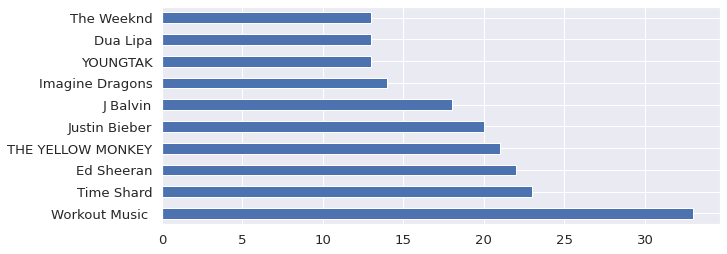

In [ ]:
print('Top Artist from Korean Most Popular Song')
sns.set(font_scale=1.2)
korean_df['artist name'].value_counts(ascending=False)[:10].plot(
    kind='barh', figsize=(10, 4))

Top Artist from Japan Most Popular Song


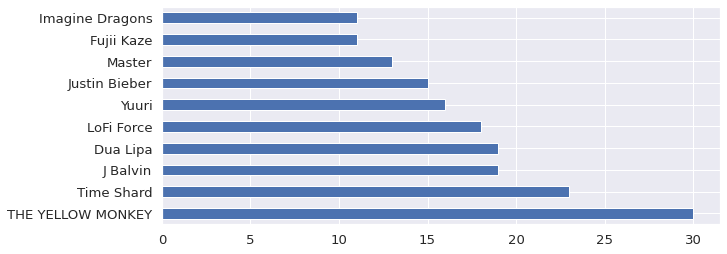

In [ ]:
print('Top Artist from Japan Most Popular Song')
sns.set(font_scale=1.2)
japan_df['artist name'].value_counts(ascending=False)[:10].plot(
    kind='barh', figsize=(10, 4))

Top Artist from Indonesian Most Popular Song


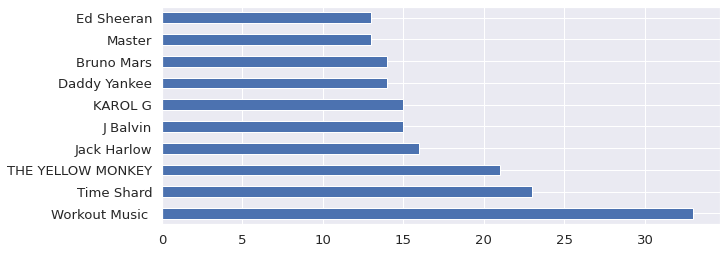

In [ ]:
print('Top Artist from Indonesian Most Popular Song')
sns.set(font_scale=1.2)
indo_df['artist name'].value_counts(ascending=False)[:10].plot(
    kind='barh', figsize=(10, 4))

#### Mode
visualisasi countplot berdasarkan mode mayor dan minor

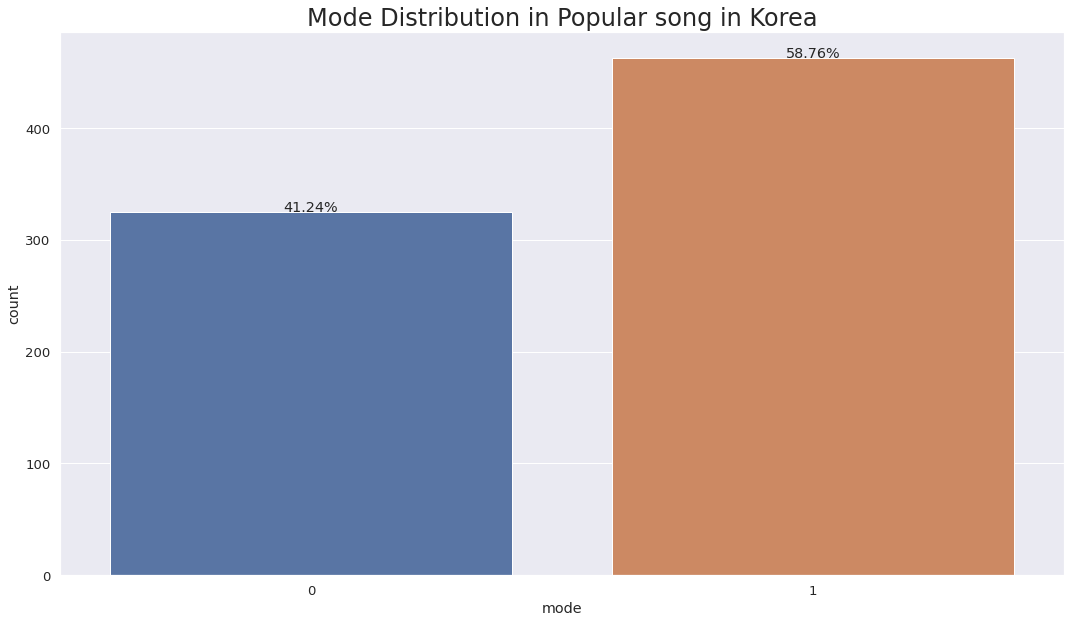

In [ ]:
# distribusi mode di lagu korea
count_plot(korean_df, 'mode', 'Mode Distribution in Popular song in Korea')

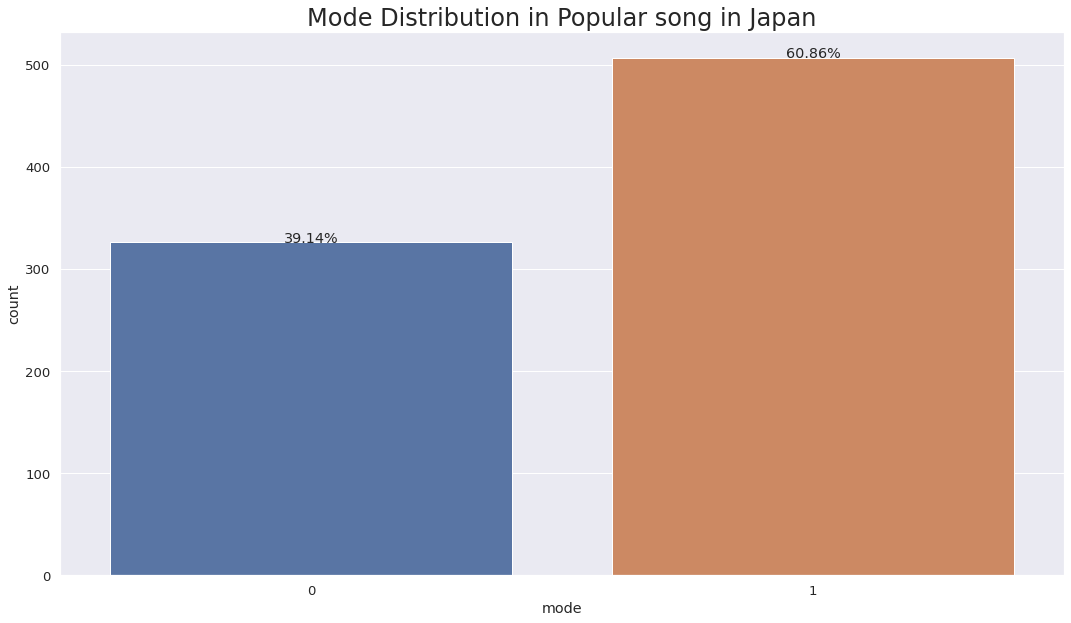

In [ ]:
# distribusi mode di lagu jepang
count_plot(japan_df, 'mode', 'Mode Distribution in Popular song in Japan')

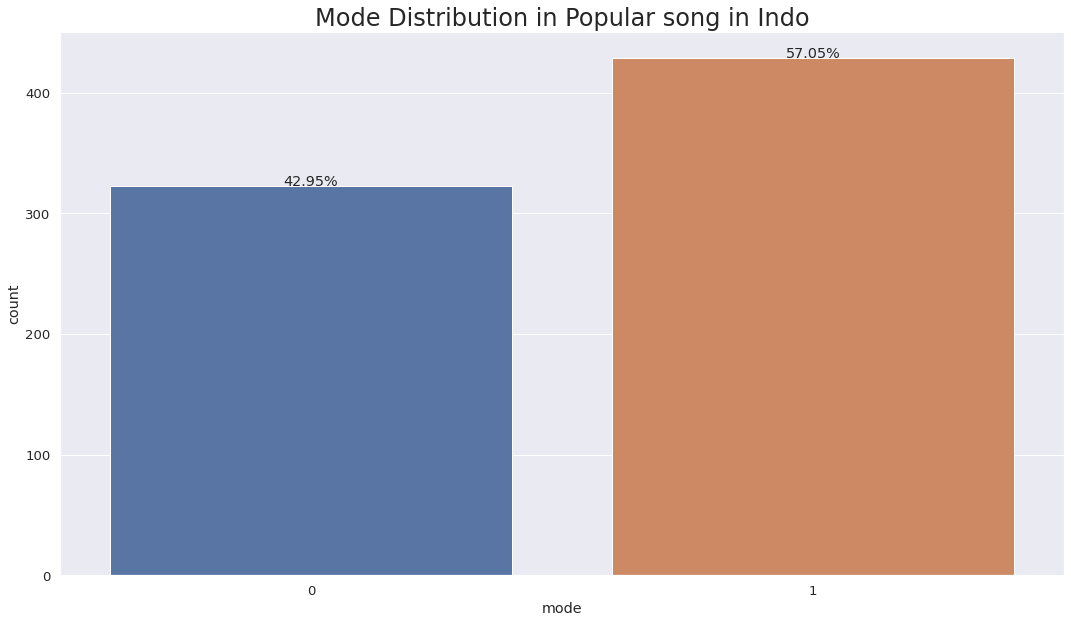

In [ ]:
# distribusi mode di lagu indonesia
count_plot(indo_df, 'mode', 'Mode Distribution in Popular song in Indo')

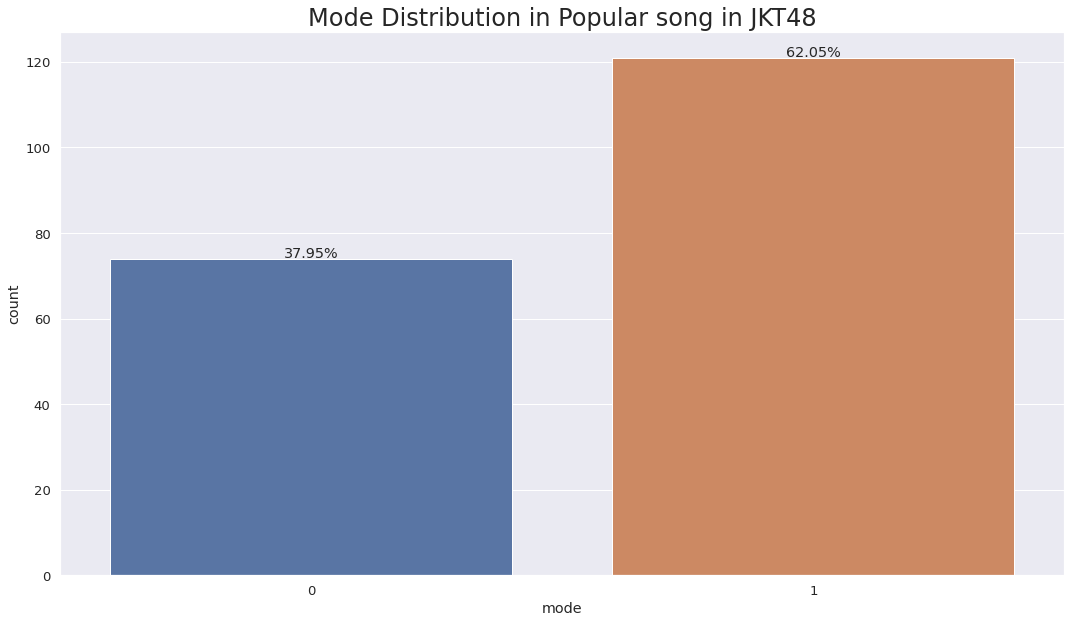

In [ ]:
# distribusi mode di lagu jkt48
count_plot(jkt48_df, 'mode', 'Mode Distribution in Popular song in JKT48')

#### Key
countplot lagu K-POP berdasarkan kunci tangga nada
- 0 = C
- 1 = C-sharp
- 2 = D
- 3 = D-sharp
- 4 = E
- 5 = F
- 6 = F-sharp
- 7 = G
- 8 = G-sharp
- 9 = A
- 10 = B-flat
- 11 = B

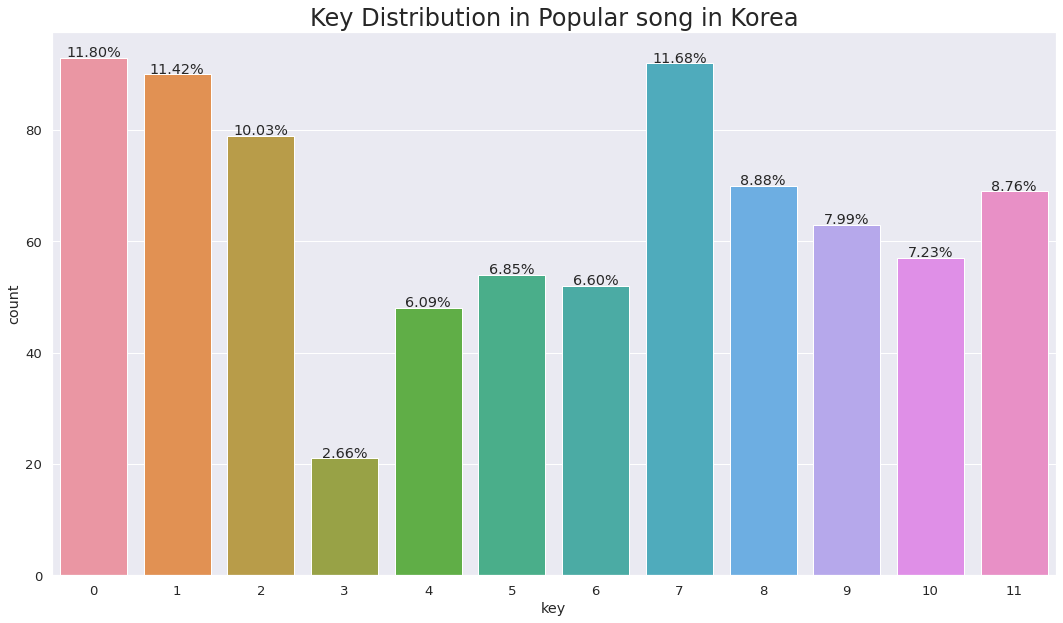

In [ ]:
# distribusi key di lagu korea
count_plot(korean_df, 'key', 'Key Distribution in Popular song in Korea')

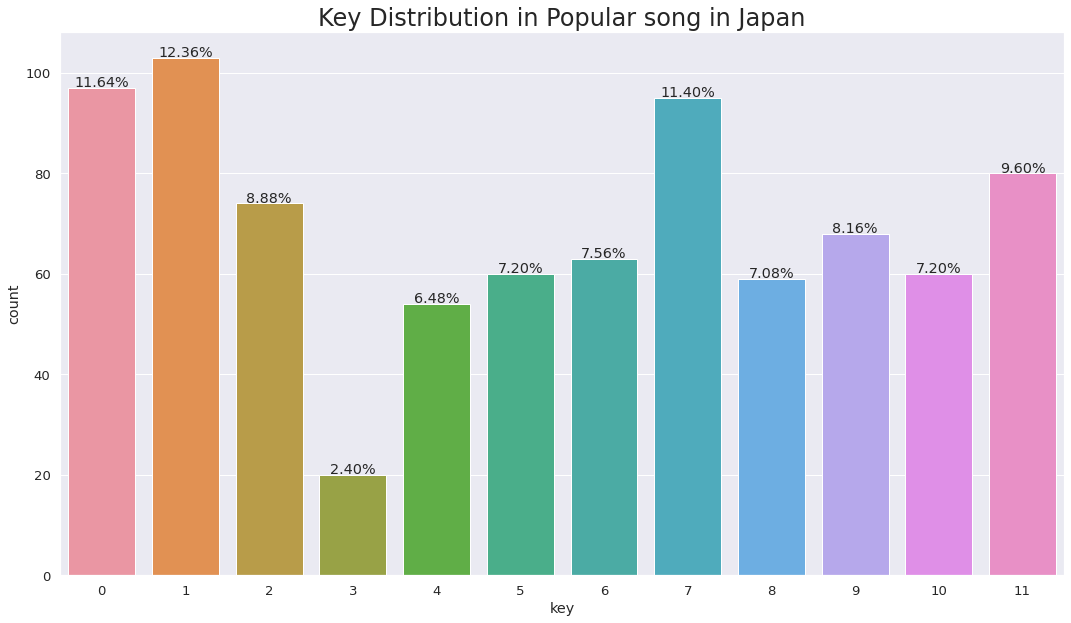

In [ ]:
# distribusi key di lagu jepang
count_plot(japan_df, 'key', 'Key Distribution in Popular song in Japan')

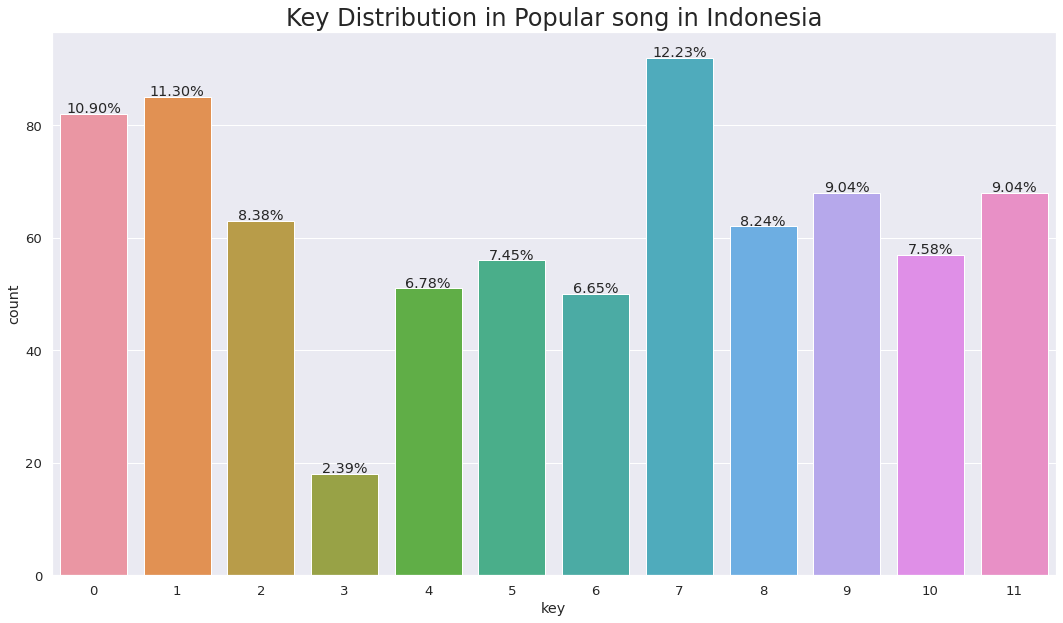

In [ ]:
# distribusi key di lagu indonesia
count_plot(indo_df, 'key', 'Key Distribution in Popular song in Indonesia')

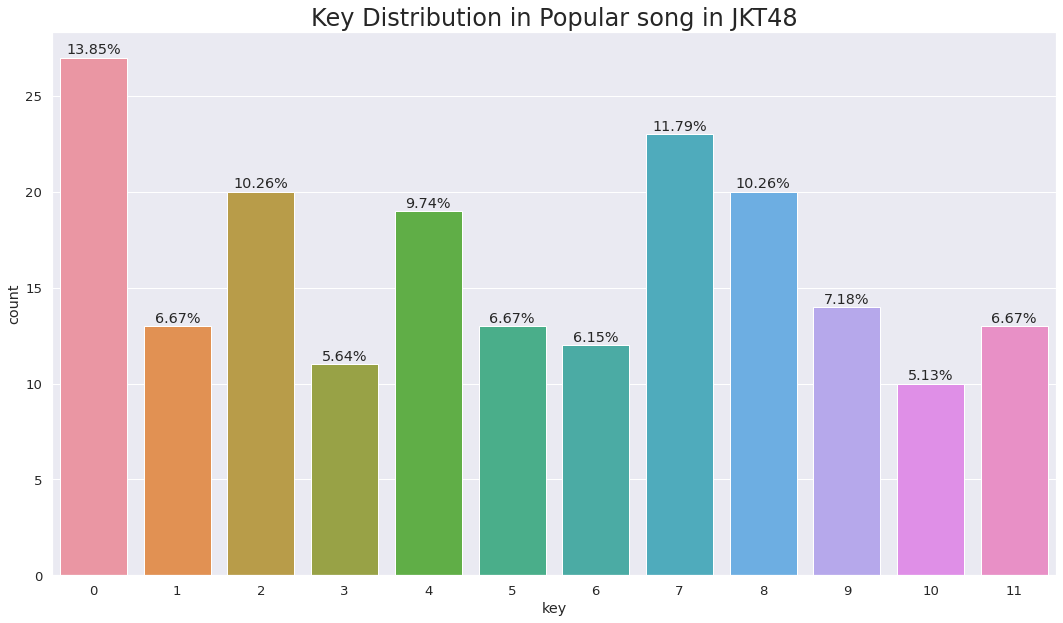

In [ ]:
# distribusi key di lagu jkt48
count_plot(jkt48_df, 'key', 'Key Distribution in Popular song in JKT48')

#### Acousticness
plot untuk menampilkan distribusi fitur acousticness pada lagu Kpop

Acousticness merupakan kecocokan lagu yang dimainkan secara akustik menggunakan gitar


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


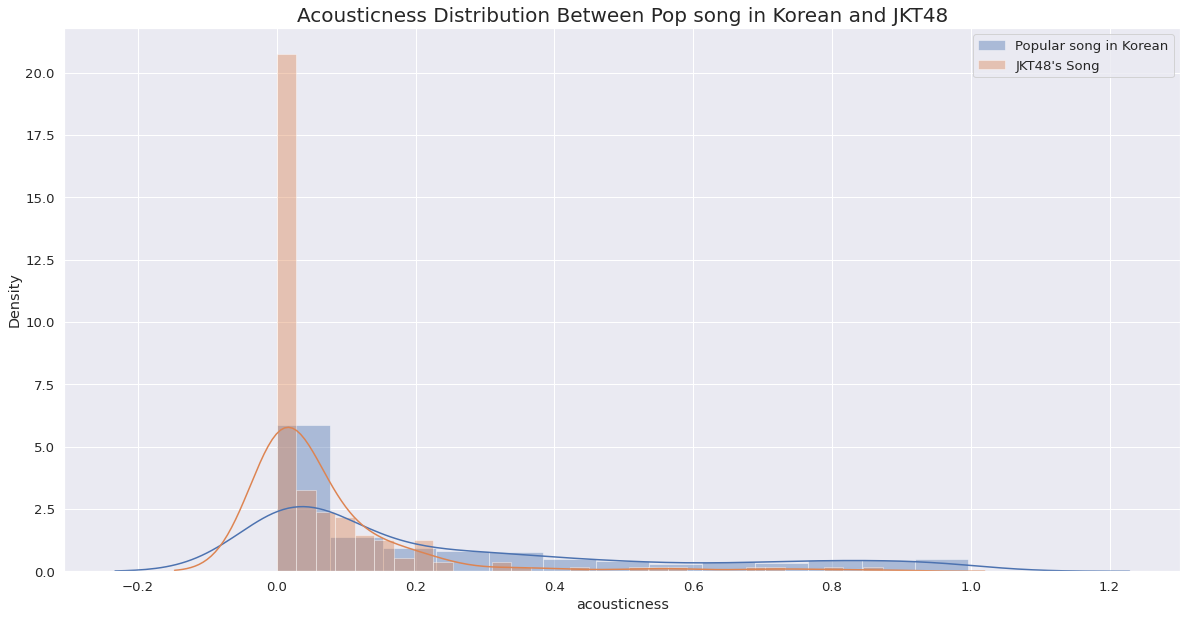

In [ ]:
compare_displot(korean_df, jkt48_df, 'Popular song in Korean', 'JKT48\'s Song', 'acousticness', 
            'Acousticness Distribution Between Pop song in Korean and JKT48')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


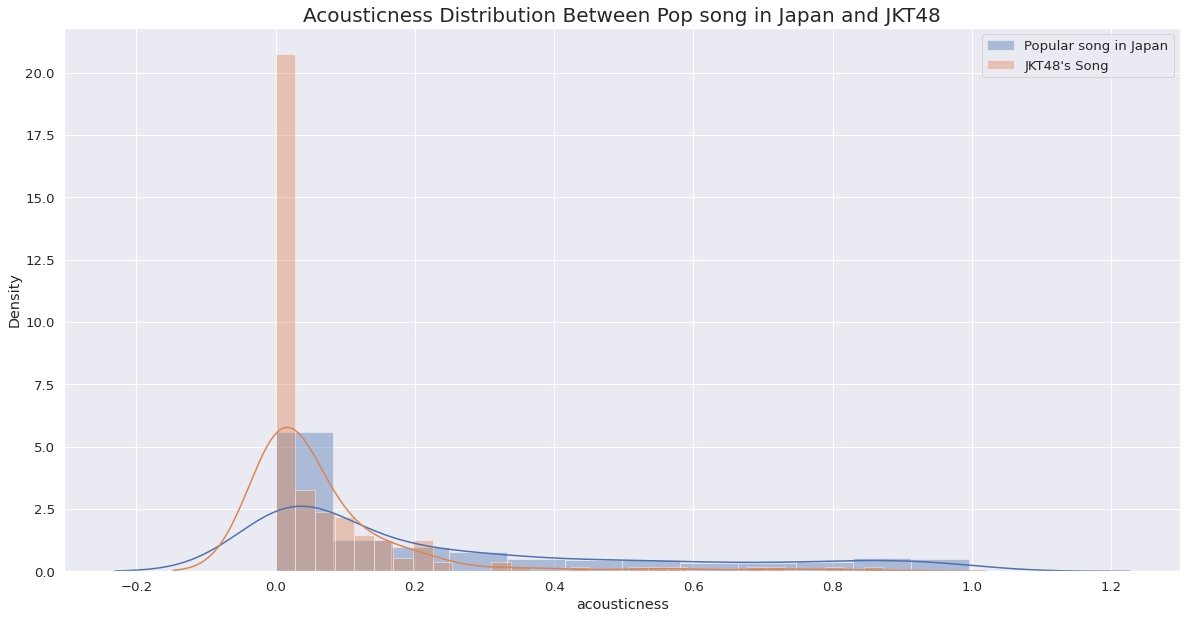

In [ ]:
compare_displot(japan_df, jkt48_df, 'Popular song in Japan', 'JKT48\'s Song', 'acousticness', 
            'Acousticness Distribution Between Pop song in Japan and JKT48')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


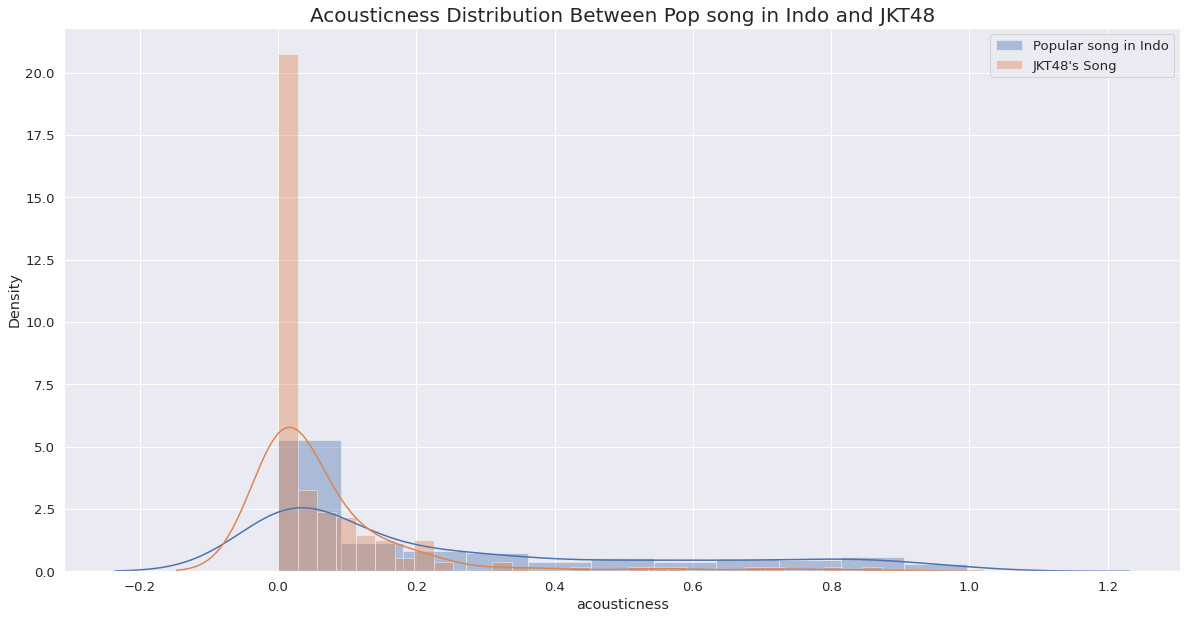

In [ ]:
compare_displot(indo_df, jkt48_df, 'Popular song in Indo', 'JKT48\'s Song', 'acousticness', 
            'Acousticness Distribution Between Pop song in Indo and JKT48')

#### Danceability
plot untuk menampilkan distribusi fitur danceability pada lagu Kpop

Danceability merupakan kecocokan lagu yang dipakai untuk menari

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


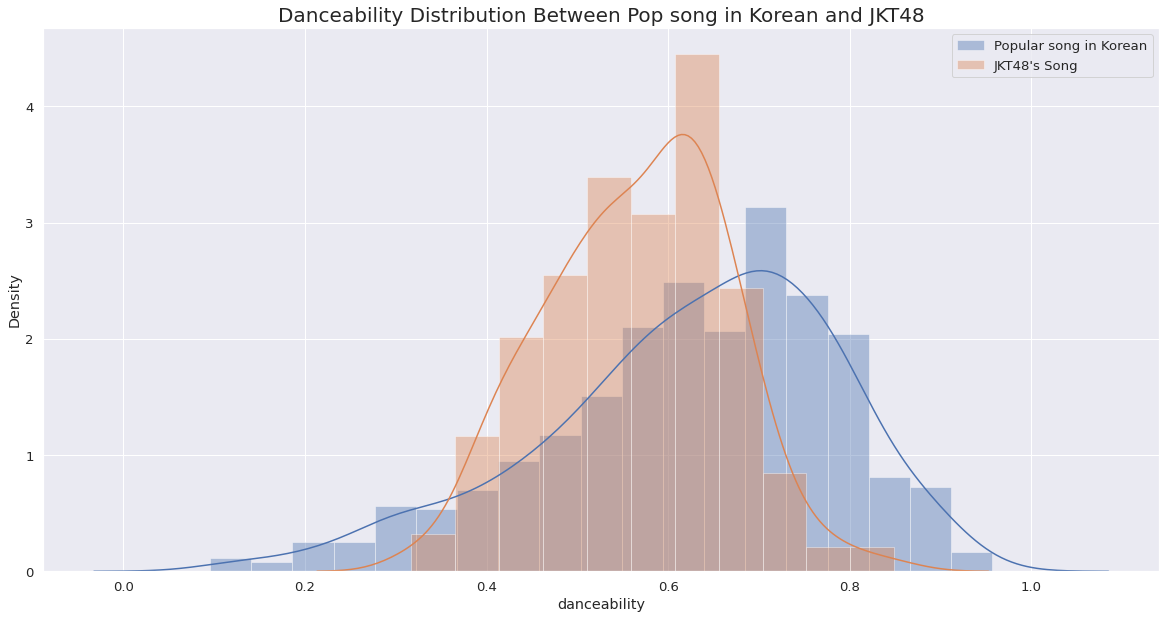

In [ ]:
compare_displot(korean_df, jkt48_df, 'Popular song in Korean', 'JKT48\'s Song', 'danceability', 
            'Danceability Distribution Between Pop song in Korean and JKT48')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


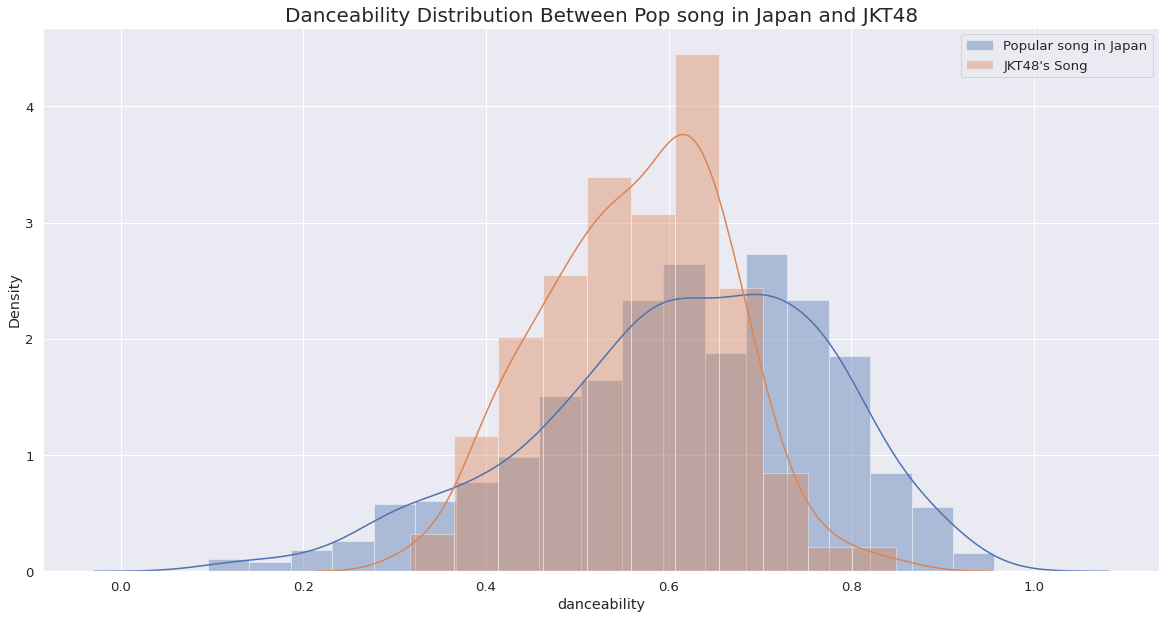

In [ ]:
compare_displot(japan_df, jkt48_df, 'Popular song in Japan', 'JKT48\'s Song', 'danceability', 
            'Danceability Distribution Between Pop song in Japan and JKT48')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


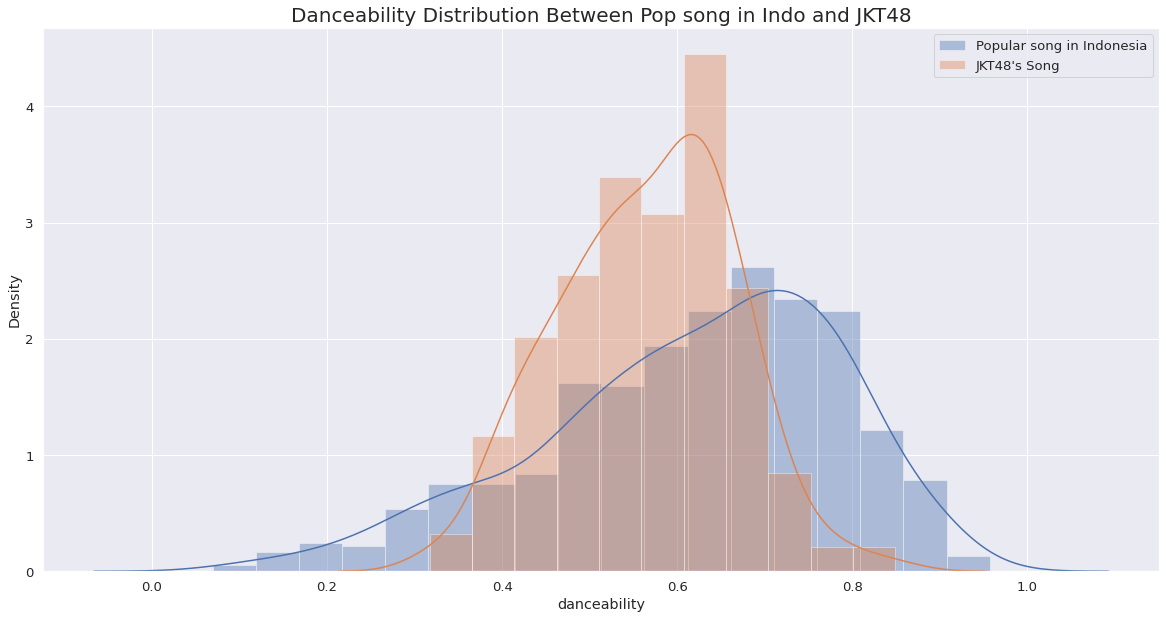

In [ ]:
compare_displot(indo_df, jkt48_df, 'Popular song in Indonesia', 'JKT48\'s Song', 'danceability', 
            'Danceability Distribution Between Pop song in Indo and JKT48')

#### Energy
plot untuk menampilkan distribusi fitur Energi pada lagu kpop

Energy merupakan aktivitas yang dihasilkan oleh lagu tersebut

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


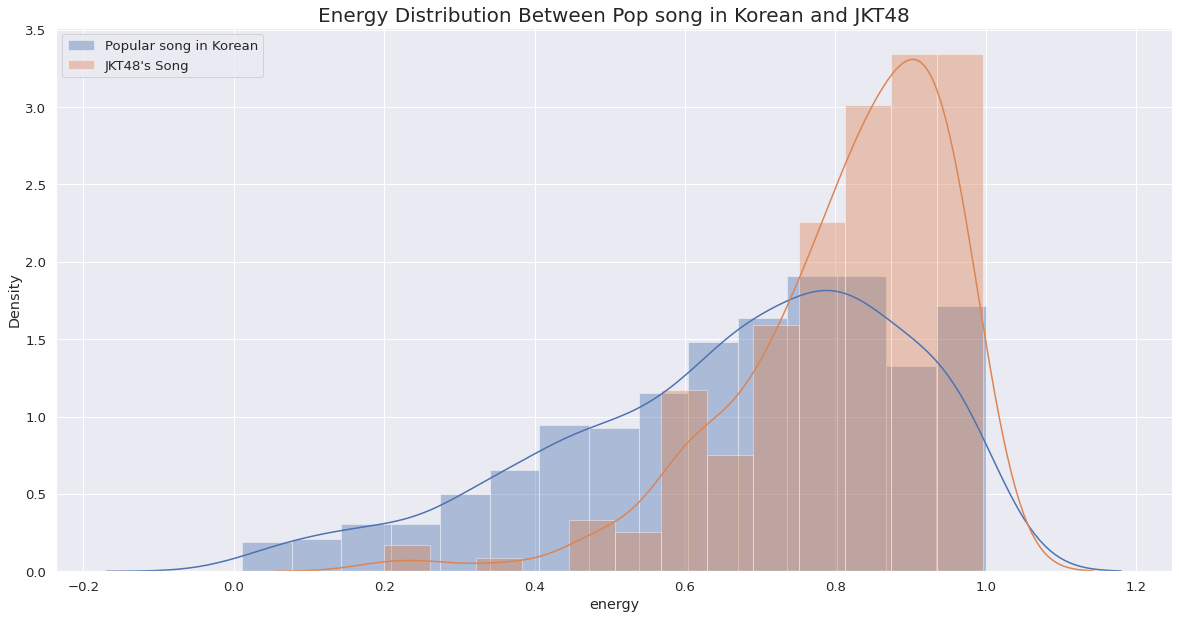

In [ ]:
compare_displot(korean_df, jkt48_df, 'Popular song in Korean', 'JKT48\'s Song', 'energy', 
            'Energy Distribution Between Pop song in Korean and JKT48')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


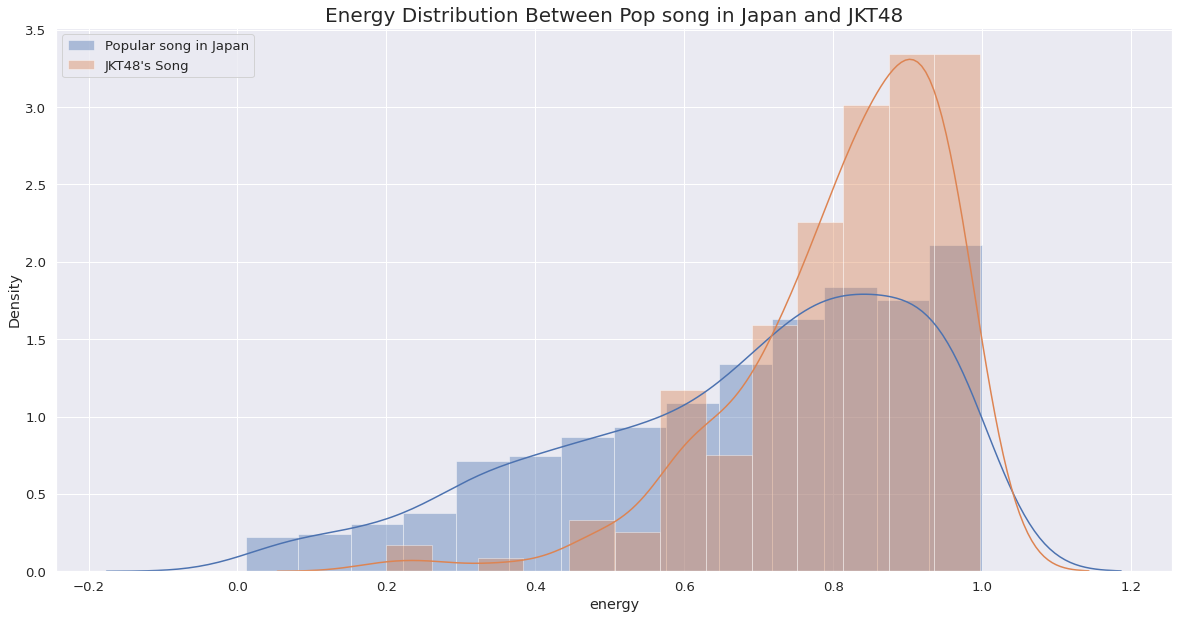

In [ ]:
compare_displot(japan_df, jkt48_df, 'Popular song in Japan', 'JKT48\'s Song', 'energy', 
            'Energy Distribution Between Pop song in Japan and JKT48')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


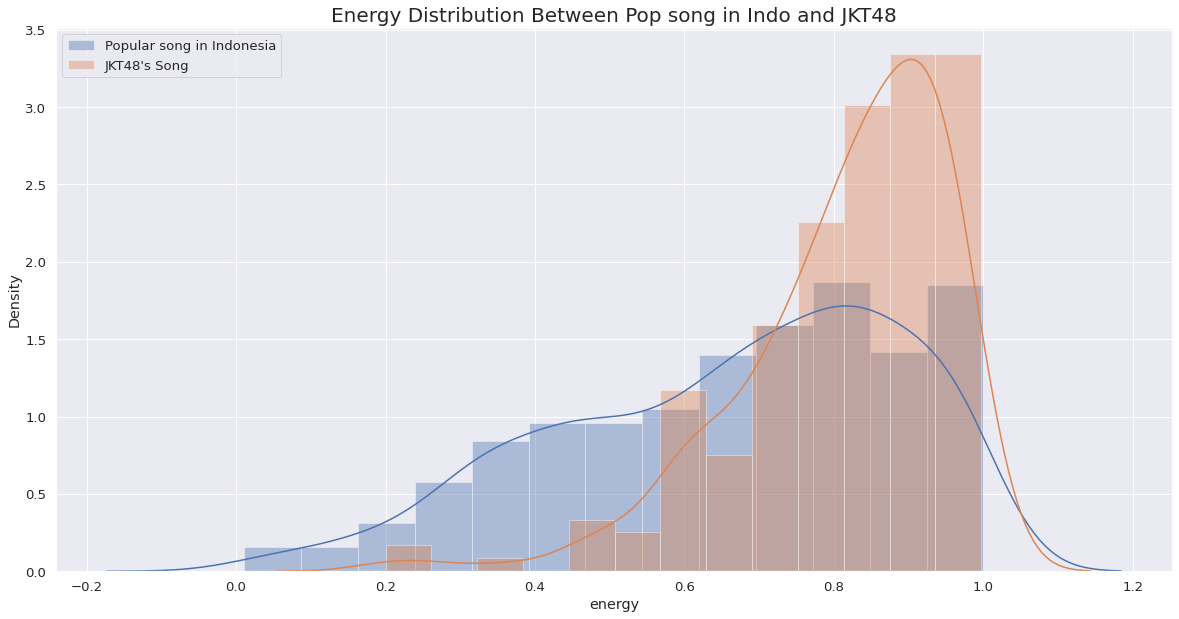

In [ ]:
compare_displot(indo_df, jkt48_df, 'Popular song in Indonesia', 'JKT48\'s Song', 'energy', 
            'Energy Distribution Between Pop song in Indo and JKT48')

#### Valence
plot untuk menampilkan distribusi fitur valence pada lagu K-Pop

Valence merupakan penggambaran suasana yang dihasilkan oleh lagu

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


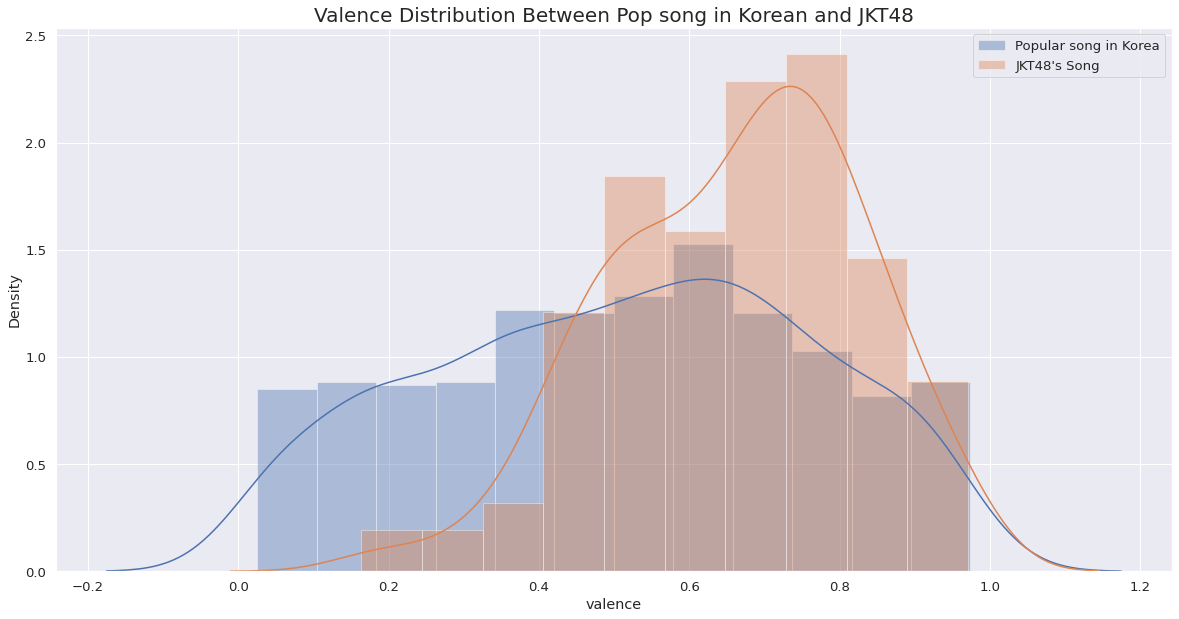

In [ ]:
compare_displot(korean_df, jkt48_df, 'Popular song in Korea', 'JKT48\'s Song', 'valence', 
            'Valence Distribution Between Pop song in Korean and JKT48')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


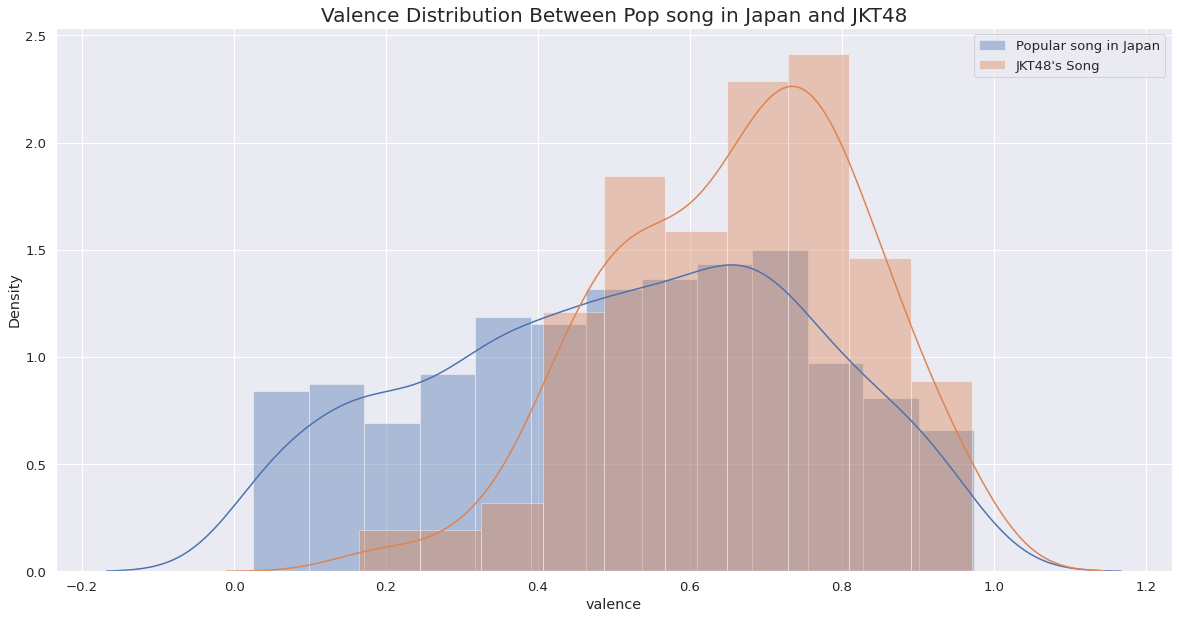

In [ ]:
compare_displot(japan_df, jkt48_df, 'Popular song in Japan', 'JKT48\'s Song', 'valence', 
            'Valence Distribution Between Pop song in Japan and JKT48')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


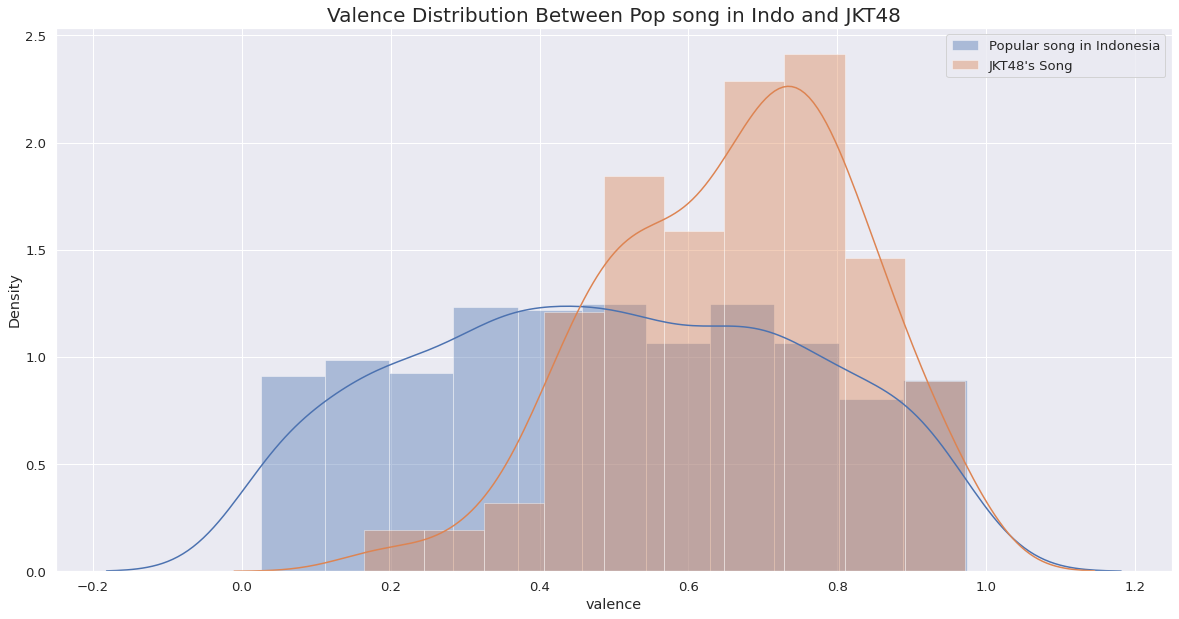

In [ ]:
compare_displot(indo_df, jkt48_df, 'Popular song in Indonesia', 'JKT48\'s Song', 'valence', 
            'Valence Distribution Between Pop song in Indo and JKT48')

#### Loudness
plot untuk menampilkan distribusi fitur loudness pada lagu K-Pop

Loudness merupakan keras atau lembutnya nada yang dihasilkan oleh lagu

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


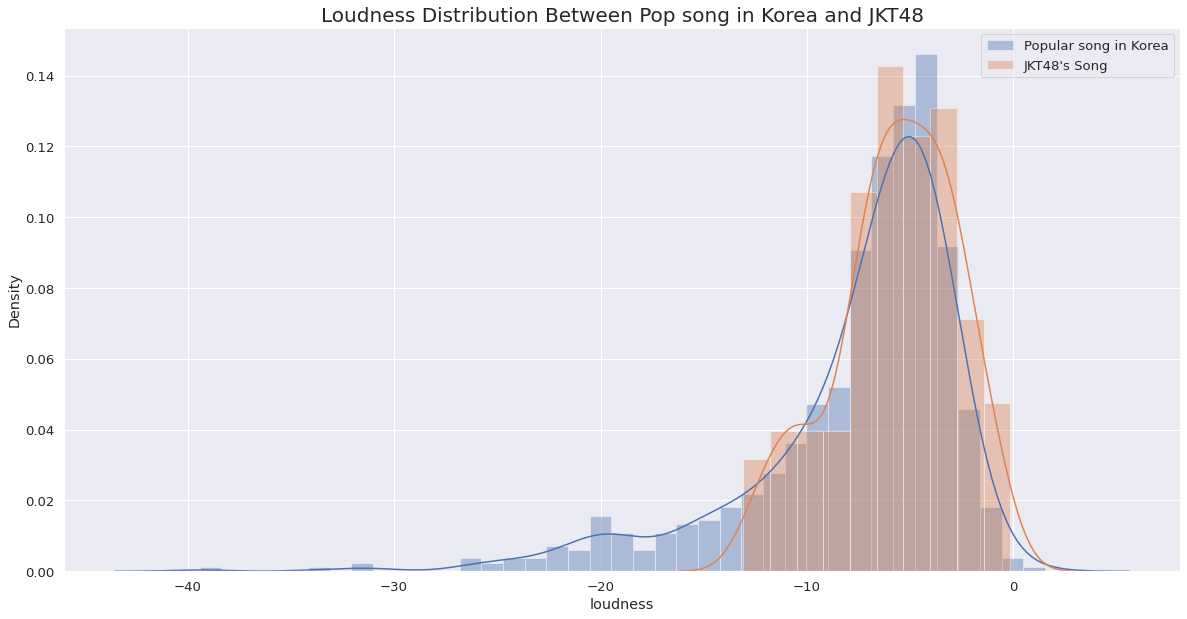

In [ ]:
compare_displot(korean_df, jkt48_df, 'Popular song in Korea', 'JKT48\'s Song', 'loudness', 
            'Loudness Distribution Between Pop song in Korea and JKT48')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


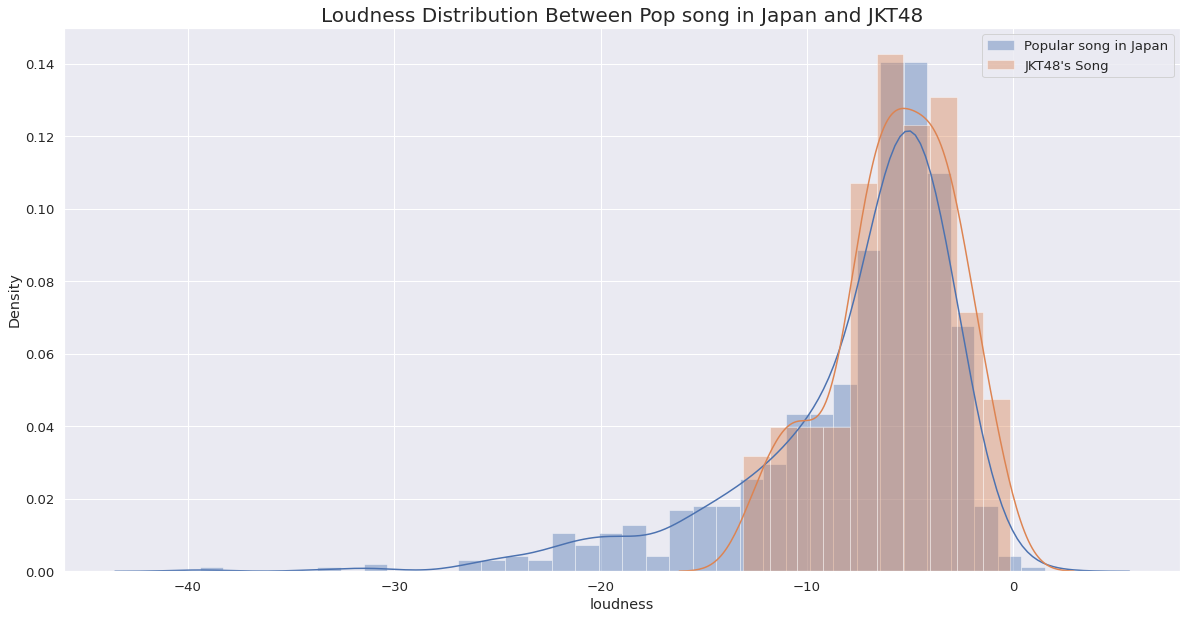

In [ ]:
compare_displot(japan_df, jkt48_df, 'Popular song in Japan', 'JKT48\'s Song', 'loudness', 
            'Loudness Distribution Between Pop song in Japan and JKT48')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


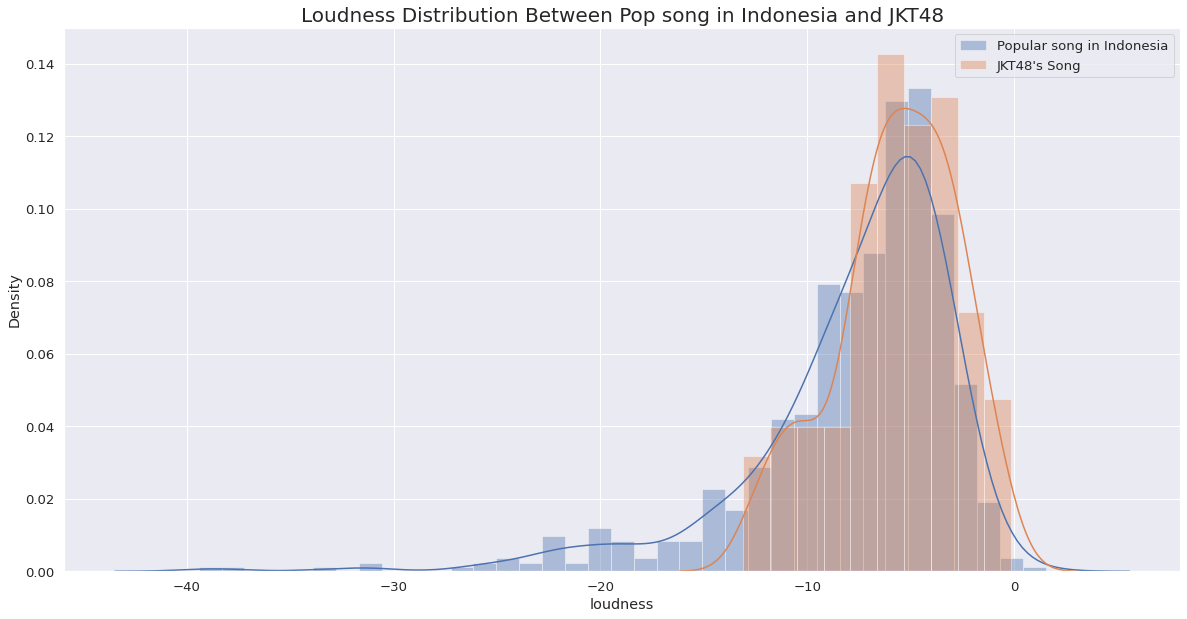

In [ ]:
compare_displot(indo_df, jkt48_df, 'Popular song in Indonesia', 'JKT48\'s Song', 'loudness', 
            'Loudness Distribution Between Pop song in Indonesia and JKT48')

#### Liveness
plot untuk menampilkan distribusi fitur liveness pada lagu K-Pop

Liveness merupakan jumlah kehadiran pengguna spotify sebagai pendengar yang mendengarkan lagu tersebut

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


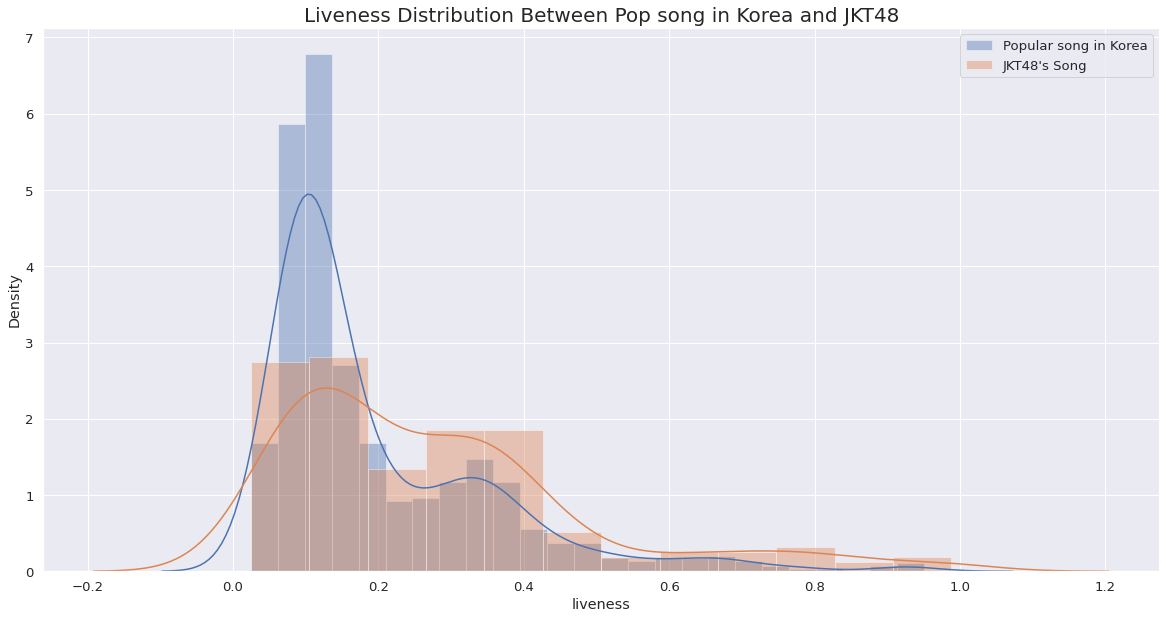

In [ ]:
compare_displot(korean_df, jkt48_df, 'Popular song in Korea', 'JKT48\'s Song', 'liveness', 
            'Liveness Distribution Between Pop song in Korea and JKT48')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


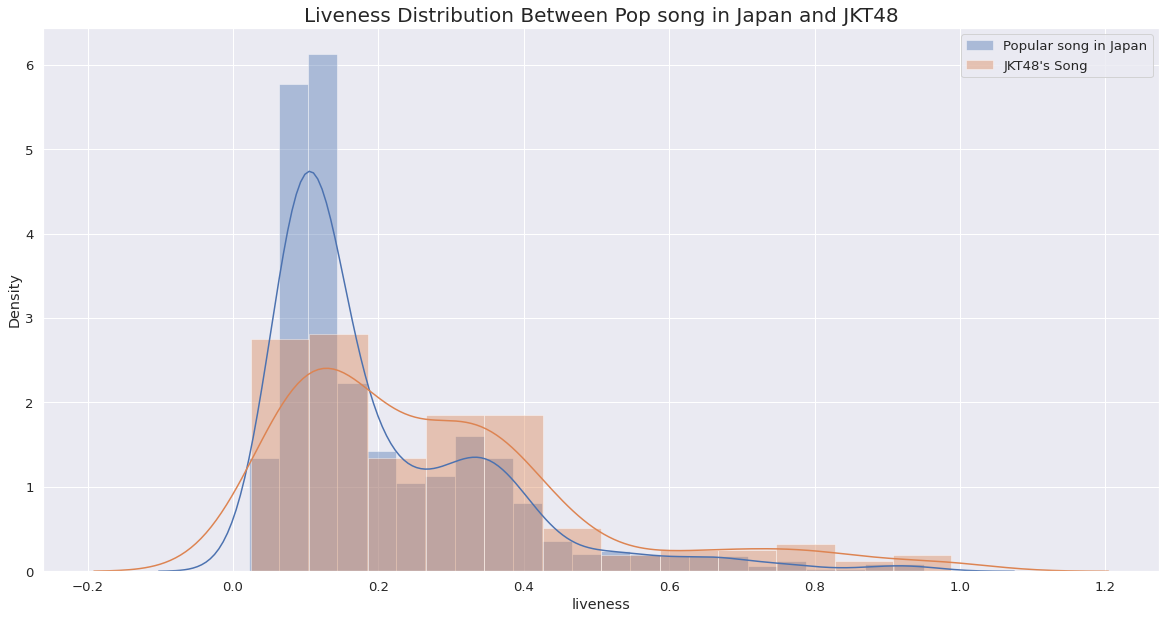

In [ ]:
compare_displot(japan_df, jkt48_df, 'Popular song in Japan', 'JKT48\'s Song', 'liveness', 
            'Liveness Distribution Between Pop song in Japan and JKT48')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


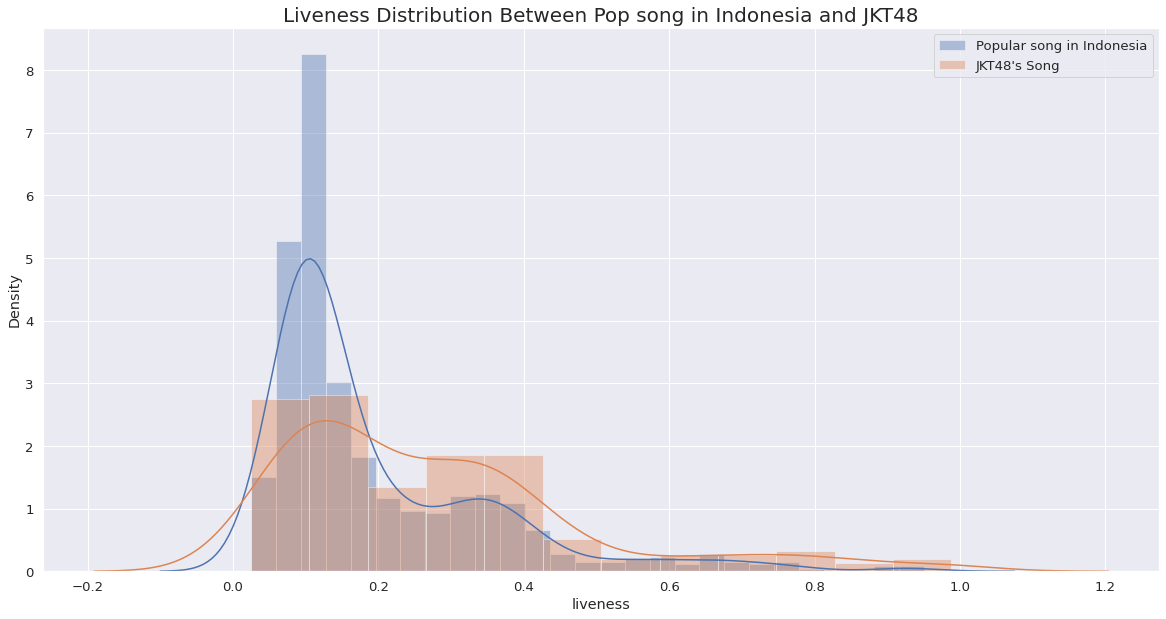

In [ ]:
compare_displot(indo_df, jkt48_df, 'Popular song in Indonesia', 'JKT48\'s Song', 'liveness', 
            'Liveness Distribution Between Pop song in Indonesia and JKT48')

#### Tempo
plot untuk menampilkan distribusi fitur tempo pada lagu K-Pop

Tempo merupakan kecepatan tempo yang dihasilkan oleh lagu

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


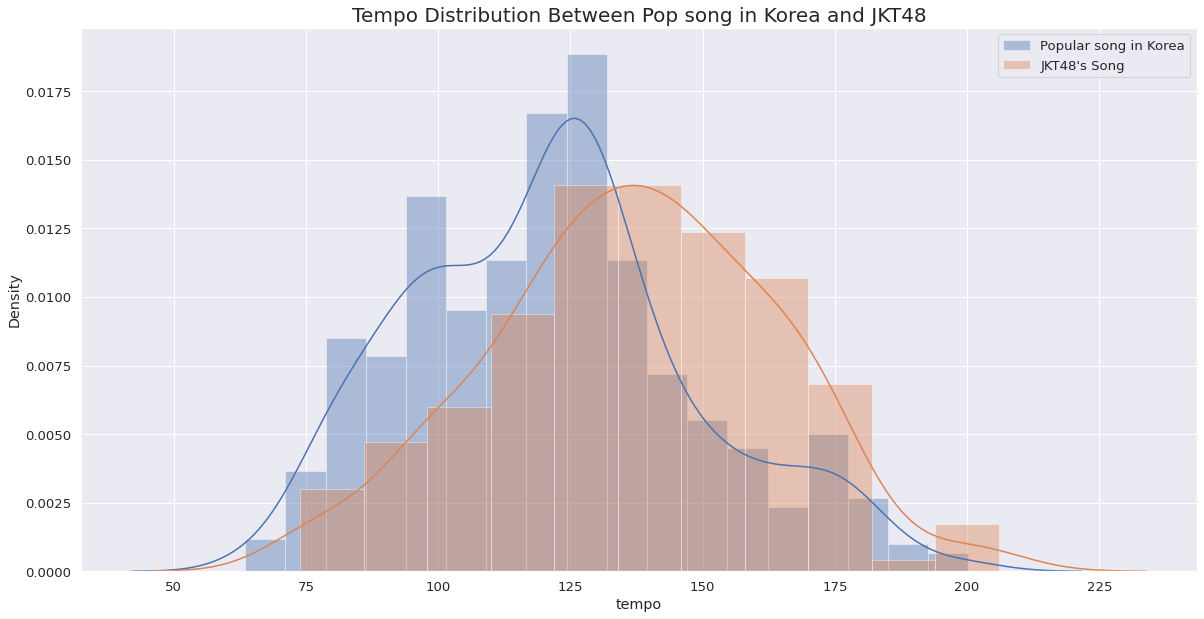

In [ ]:
compare_displot(korean_df, jkt48_df, 'Popular song in Korea', 'JKT48\'s Song', 'tempo', 
            'Tempo Distribution Between Pop song in Korea and JKT48')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


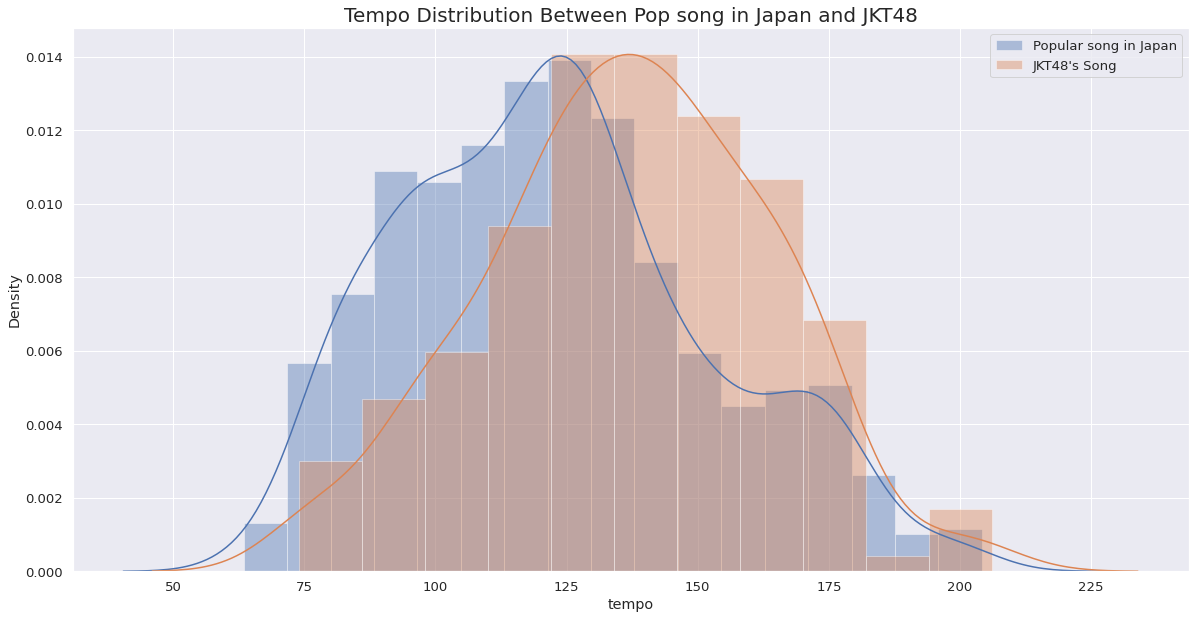

In [ ]:
compare_displot(japan_df, jkt48_df, 'Popular song in Japan', 'JKT48\'s Song', 'tempo', 
            'Tempo Distribution Between Pop song in Japan and JKT48')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


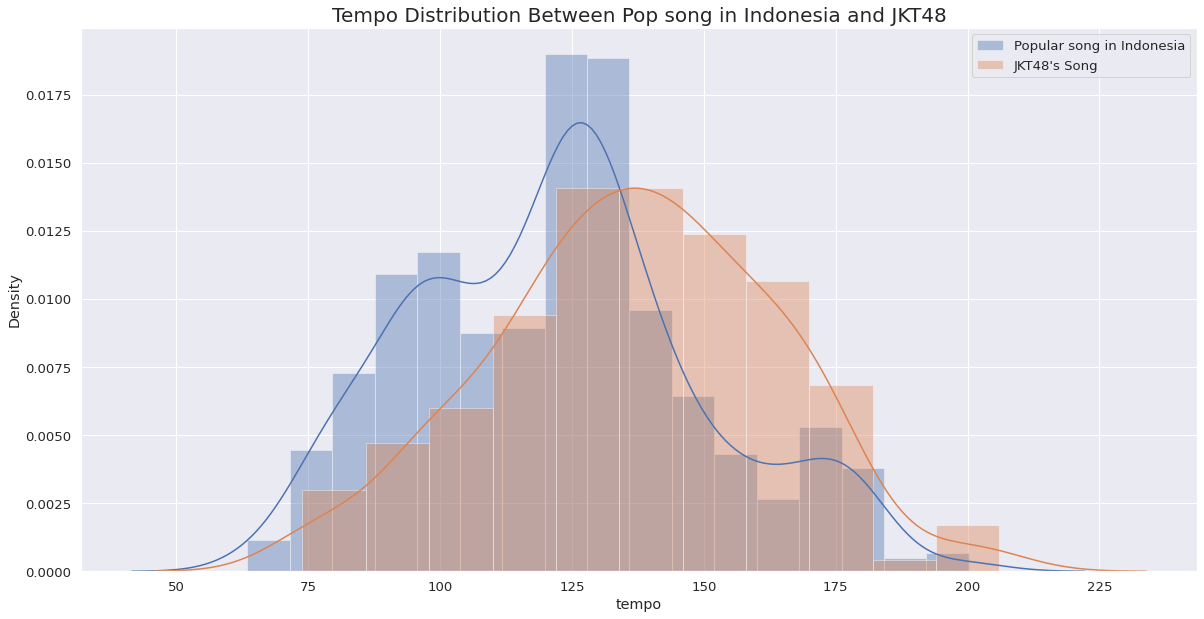

In [ ]:
compare_displot(indo_df, jkt48_df, 'Popular song in Indonesia', 'JKT48\'s Song', 'tempo', 
            'Tempo Distribution Between Pop song in Indonesia and JKT48')

### Audio Feature Correlation
tools visualisasi untuk memahami keterkaitan antar fitur

memahami audio fitur apa yang mempengaruhi popularitas (`popularity`) pada lagu

In [ ]:
# function untuk korelasi
def heatmap_correlation(var_corr):
    # visualisasi heatmap
    f, ax = plt.subplots(figsize=(22, 12))

    sns.heatmap(var_corr, square=True, linecolor='white', vmax = 1.0, 
                annot = True, cmap='Blues', fmt='.2f')
    plt.tight_layout()

# visualisasi heatmap khusus Popularity
def heatmap_largest_corr(var_cor, df):
    # memilih 10 variabel yang paling berkorelasi
    top10 = var_cor.nlargest(10, 'popularity')['popularity'].index
    corr_map = np.corrcoef(df[top10].values.T)

    # tampilkan heatmap
    f, ax = plt.subplots(figsize = (12, 9))
    sns.set(font_scale = 1.25)
    sns.heatmap(corr_map, cbar=True, annot=True, fmt='.2f', cmap='Blues',
                annot_kws={'size': 10}, yticklabels=top10.values, 
                xticklabels=top10.values)
    plt.tight_layout()

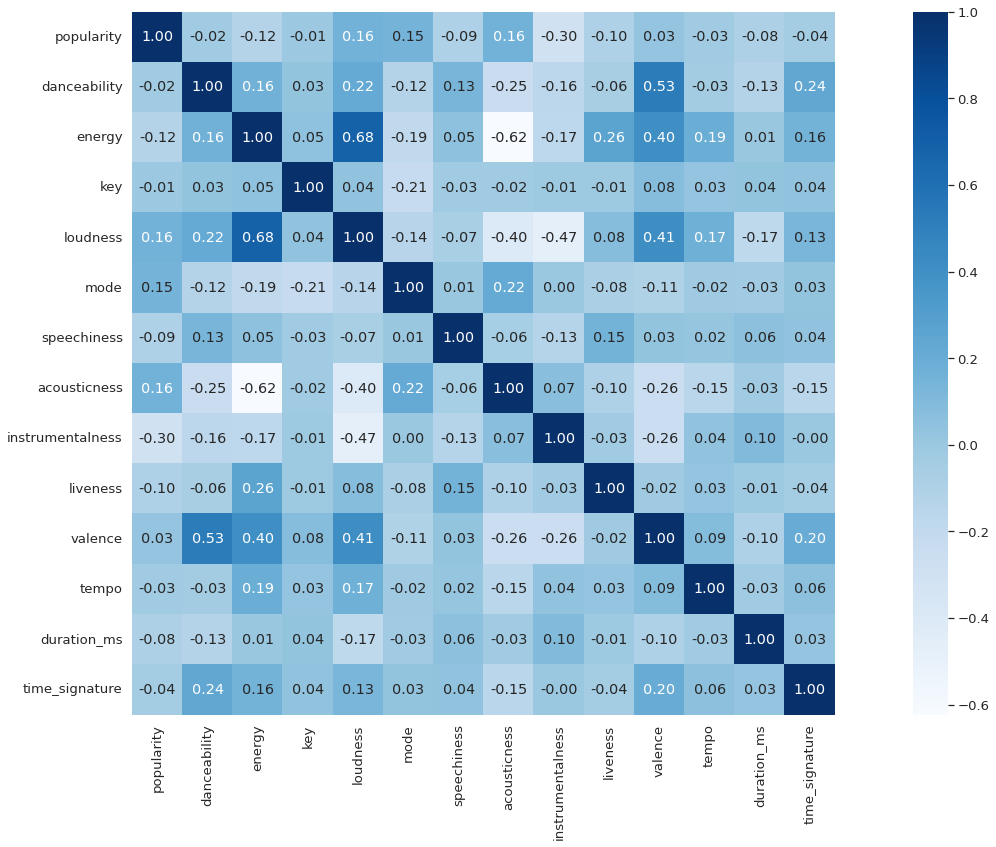

In [ ]:
# buat matrix correlasi
indo_corr = indo_df.corr()

# visualisasi heatmap
heatmap_correlation(indo_corr)

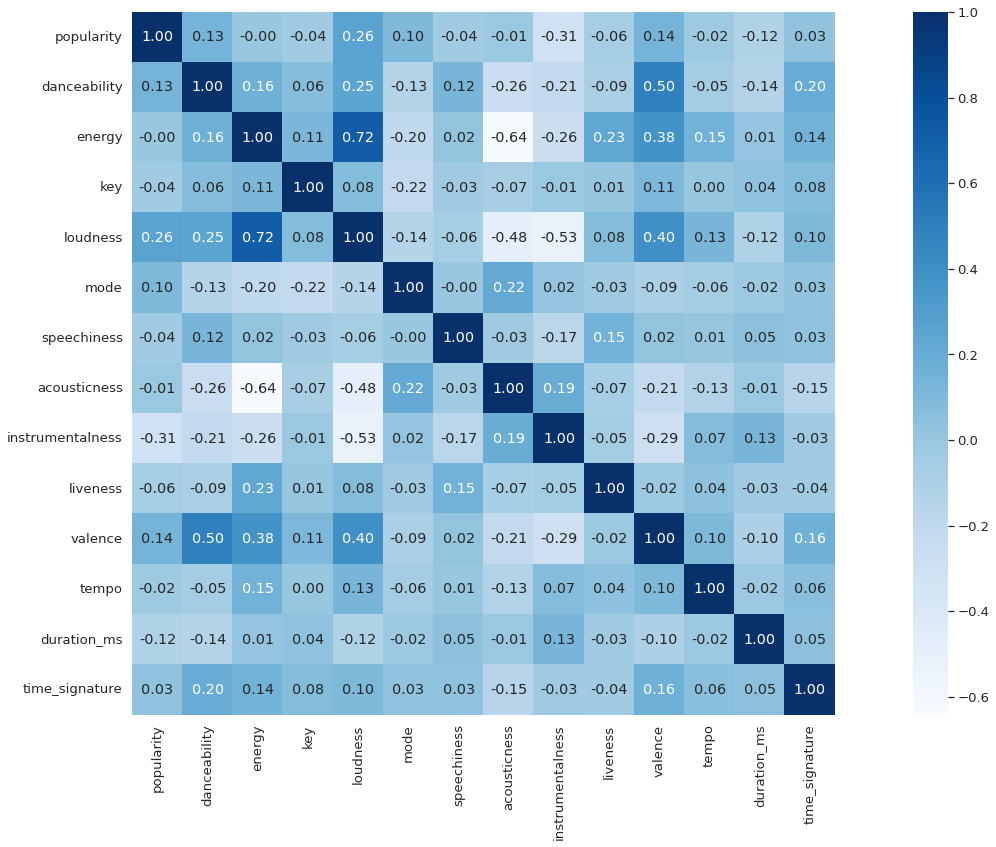

In [ ]:
# buat matrix correlasi
korean_corr = korean_df.corr()

# visualisasi heatmap
heatmap_correlation(korean_corr)

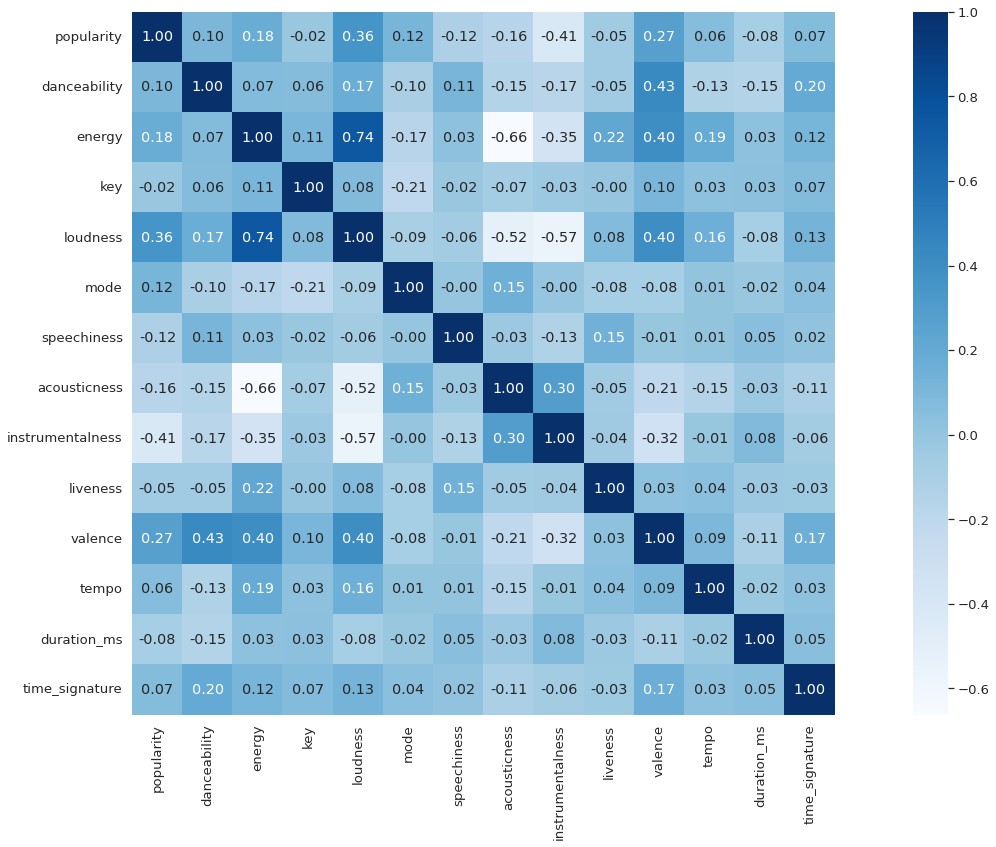

In [ ]:
# buat matrix correlasi
japan_corr = japan_df.corr()

# visualisasi heatmap
heatmap_correlation(japan_corr)

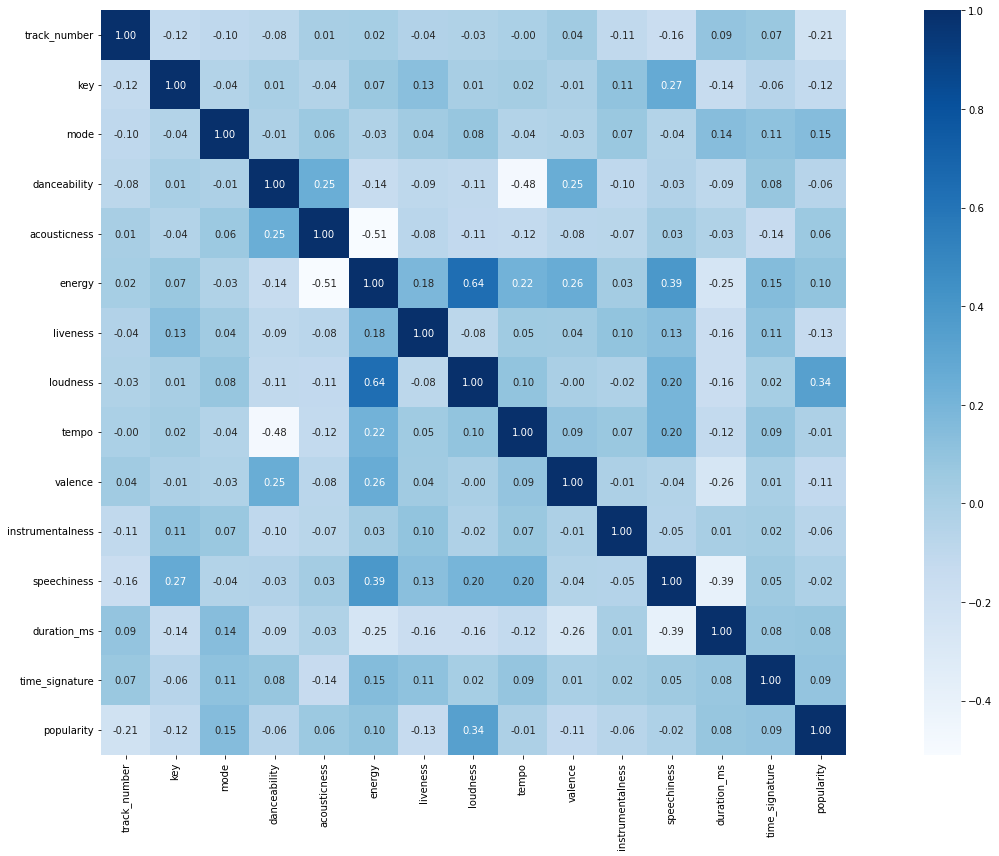

In [ ]:
# buat matrix correlasi
jkt48_corr = jkt48_df.corr()

# visualisasi heatmap
heatmap_correlation(jkt48_corr)

terlihat semakin tua birunya semakin kuat korelasi dari popularitas lagu tersebut

namun coba fokus ke 10 variabel yang paling berkorelasi

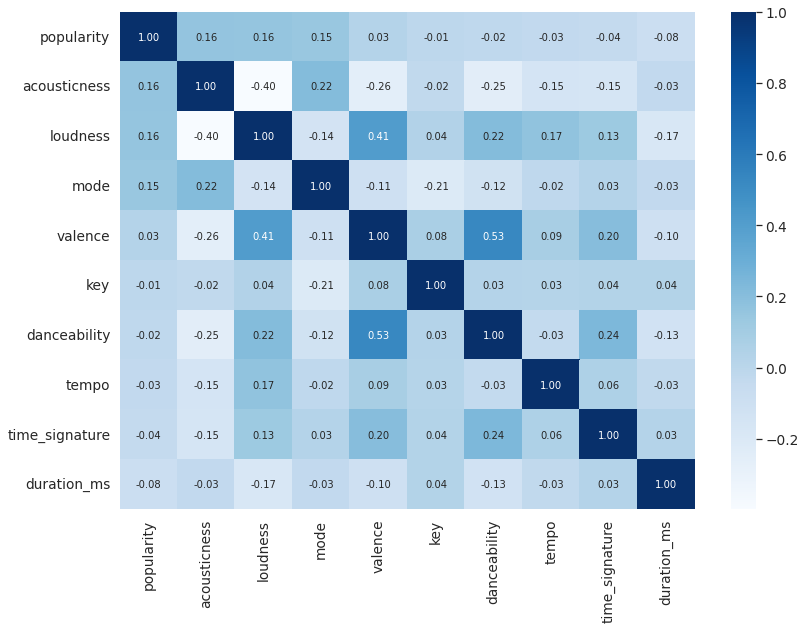

In [ ]:
# visualisasi heatmap khusus Popularity
heatmap_largest_corr(indo_corr, indo_df)

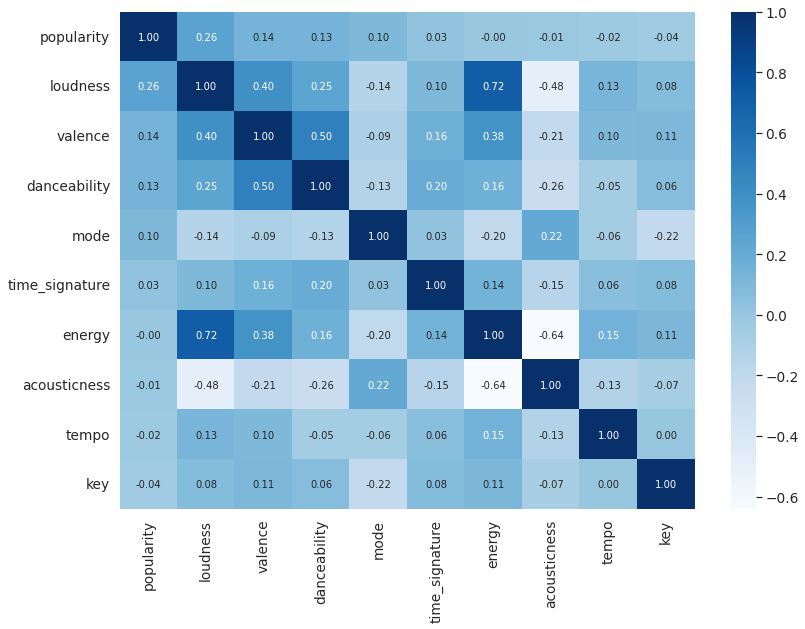

In [ ]:
# visualisasi heatmap khusus Popularity
heatmap_largest_corr(korean_corr, korean_df)

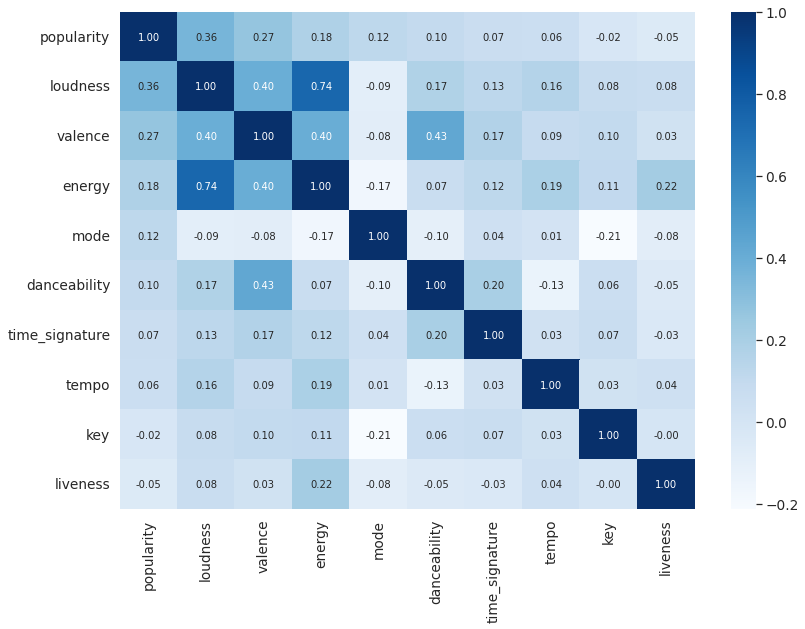

In [ ]:
# visualisasi heatmap khusus Popularity
heatmap_largest_corr(japan_corr, japan_df)

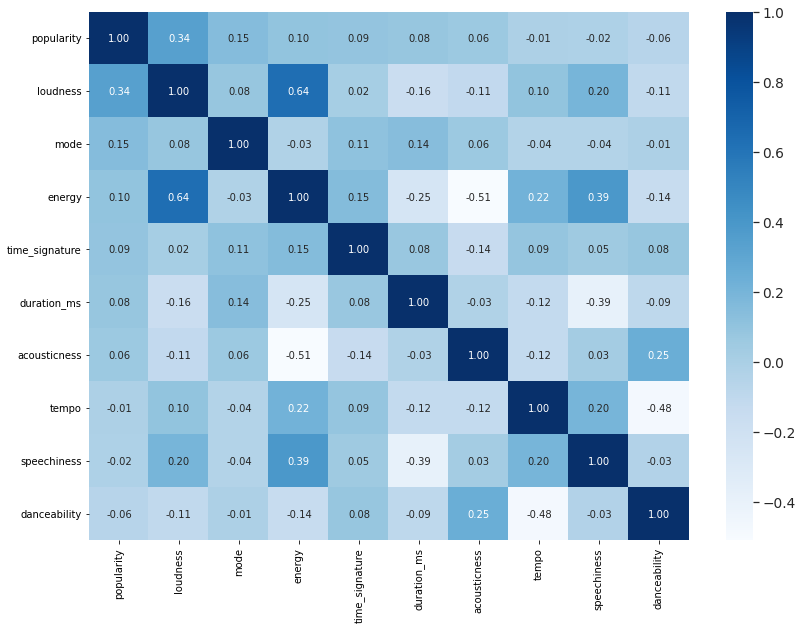

In [ ]:
# visualisasi heatmap khusus Popularity
heatmap_largest_corr(jkt48_corr, jkt48_df)

### Juicy Features

In [ ]:
def correlation_scatter_compare(df, feature1, feature2):
    # scatterplot dengan line linear regression
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15, 10))
    # visualisasi antara popularity dengan feature 1 dan feature 2
    sns.regplot(x=df['popularity'], y=df[feature1], ax=ax1)
    sns.regplot(x=df['popularity'], y=df[feature2], ax=ax2)
    plt.tight_layout()

#### Lagu Populer di Korea

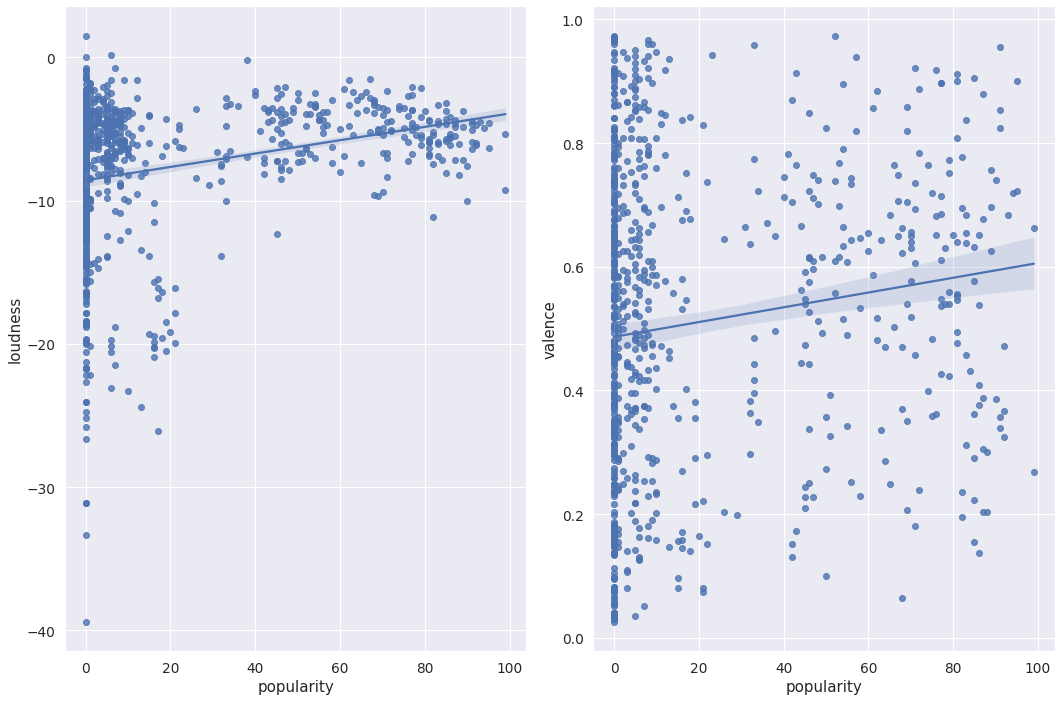

In [ ]:
# pengaruh popularity atas loudness dan valence
correlation_scatter_compare(korean_df, 'loudness', 'valence')

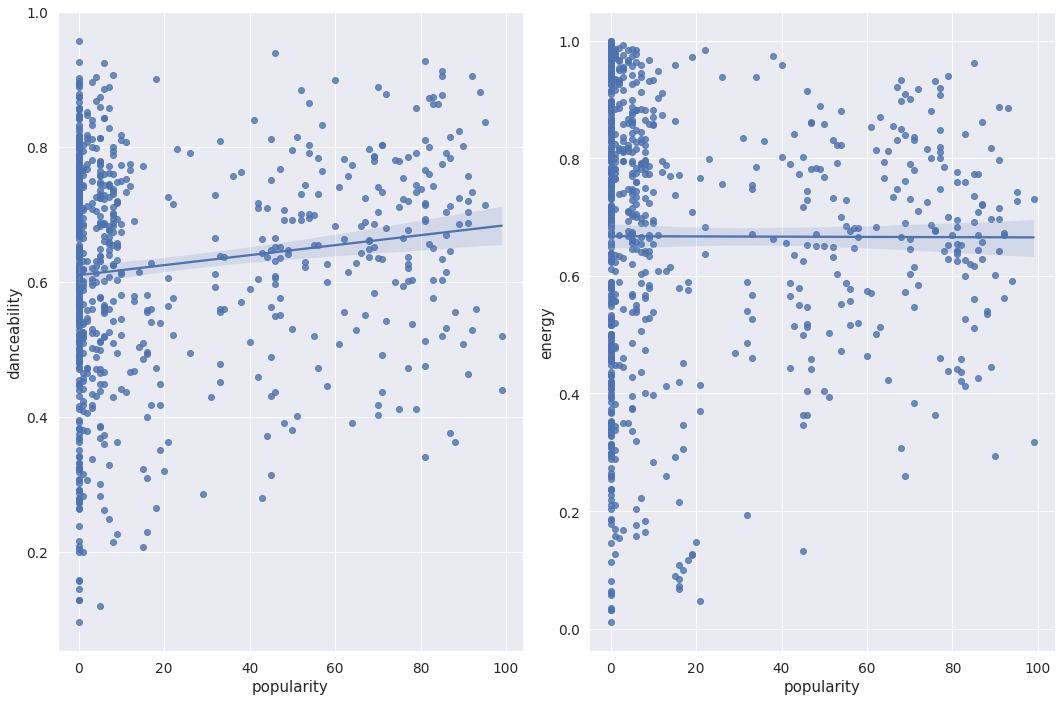

In [ ]:
# pengaruh popularity atas danceability dan energy
correlation_scatter_compare(korean_df, 'danceability', 'energy')

#### Lagu Populer di Jepang

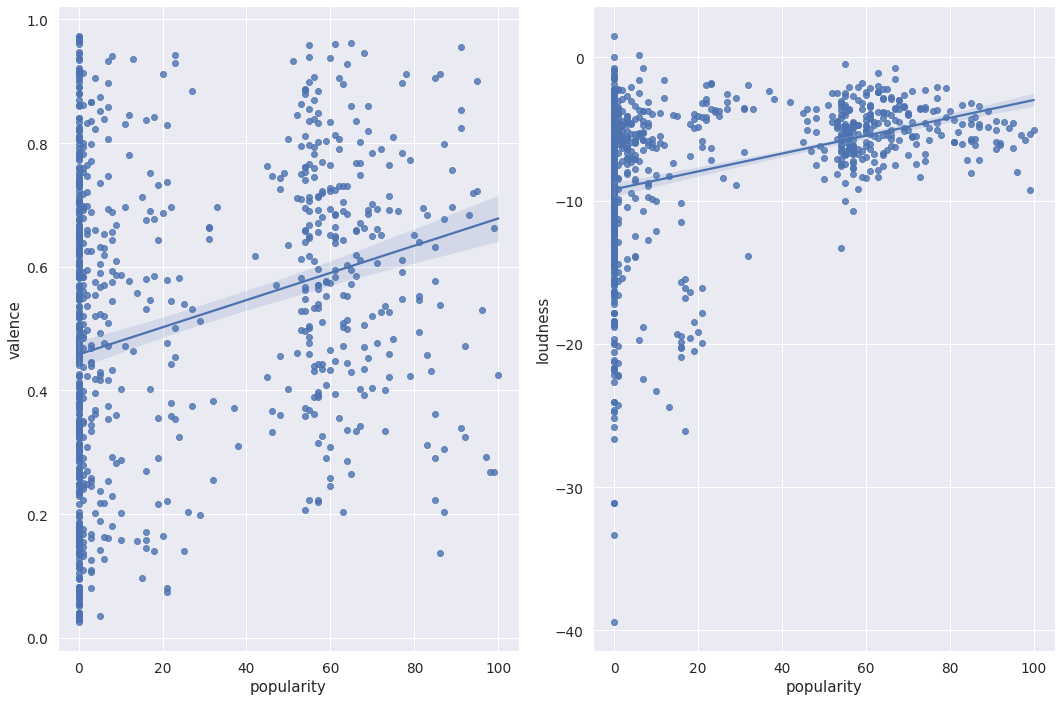

In [ ]:
# pengaruh popularity atas valence dan loudness
correlation_scatter_compare(japan_df, 'valence', 'loudness')

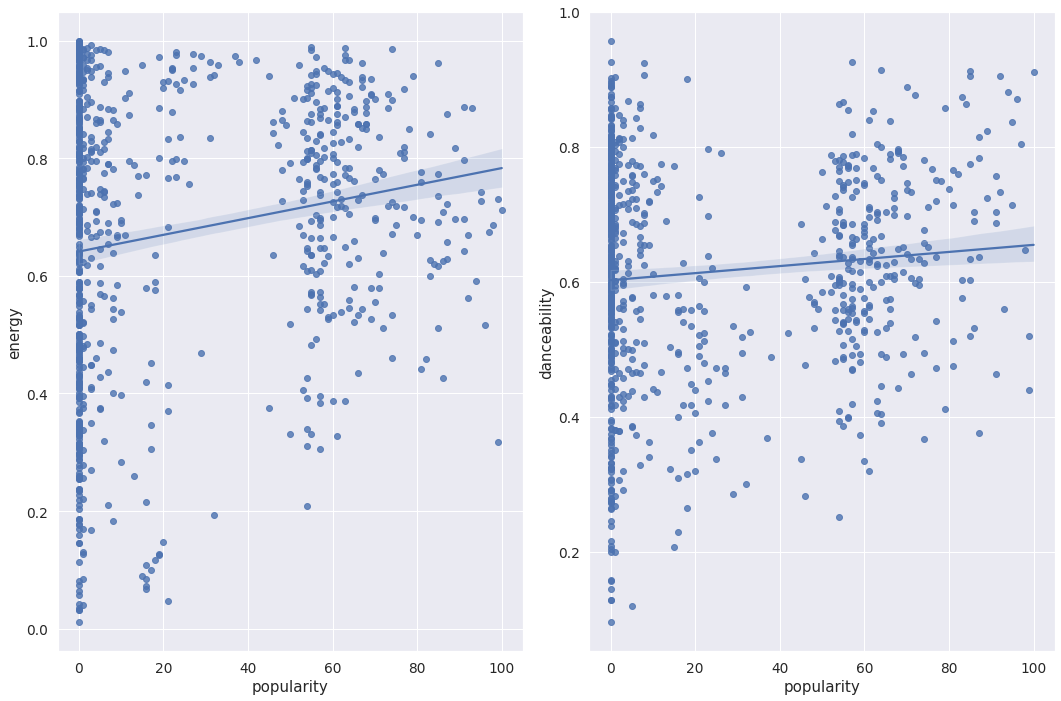

In [ ]:
# pengaruh popularity atas energy dan danceability
correlation_scatter_compare(japan_df, 'energy', 'danceability')

#### Lagu Populer di Indonesia

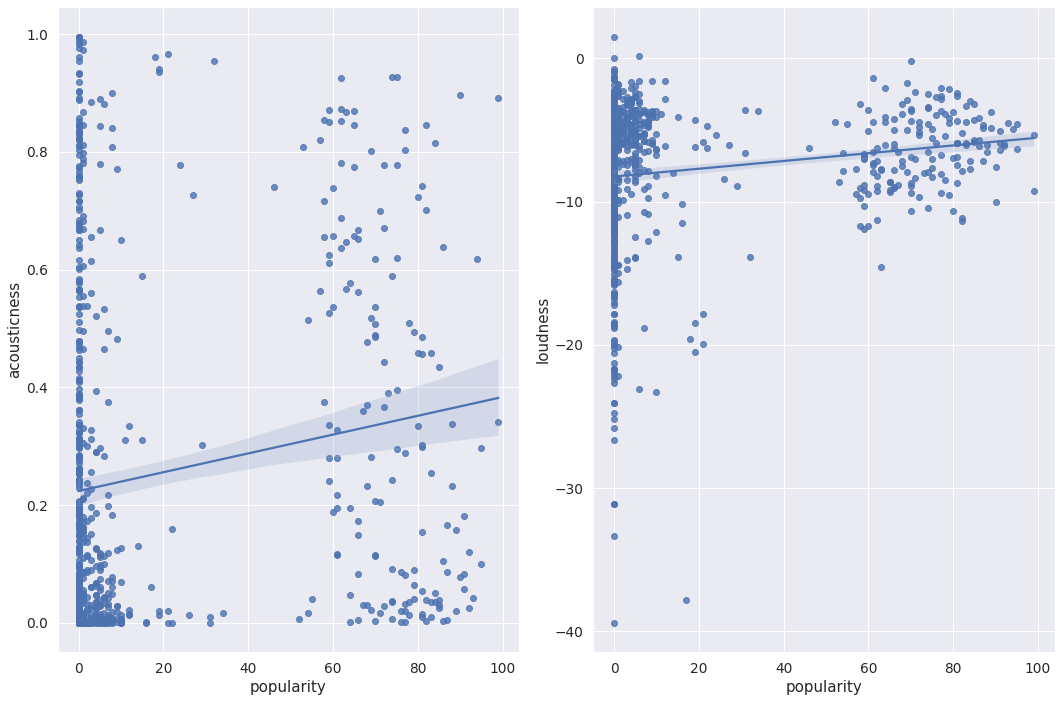

In [ ]:
# pengaruh popularity atas acousticness dan loudness
correlation_scatter_compare(indo_df, 'acousticness', 'loudness')

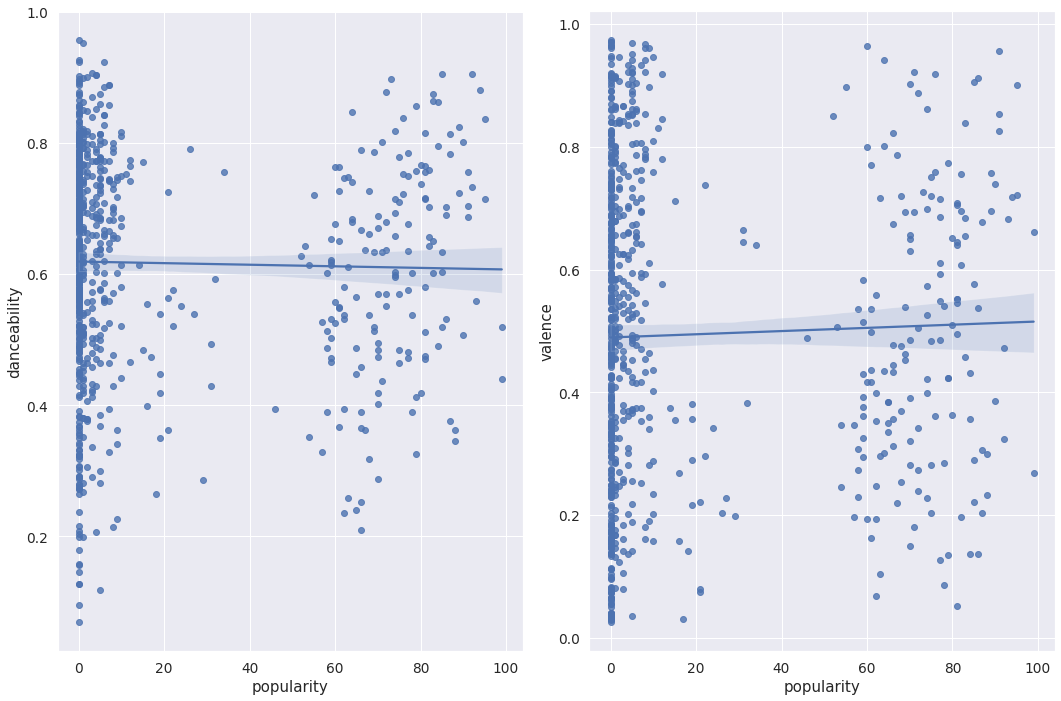

In [ ]:
# pengaruh popularity atas danceability dan valence
correlation_scatter_compare(indo_df, 'danceability', 'valence')

#### Lagu JKT48

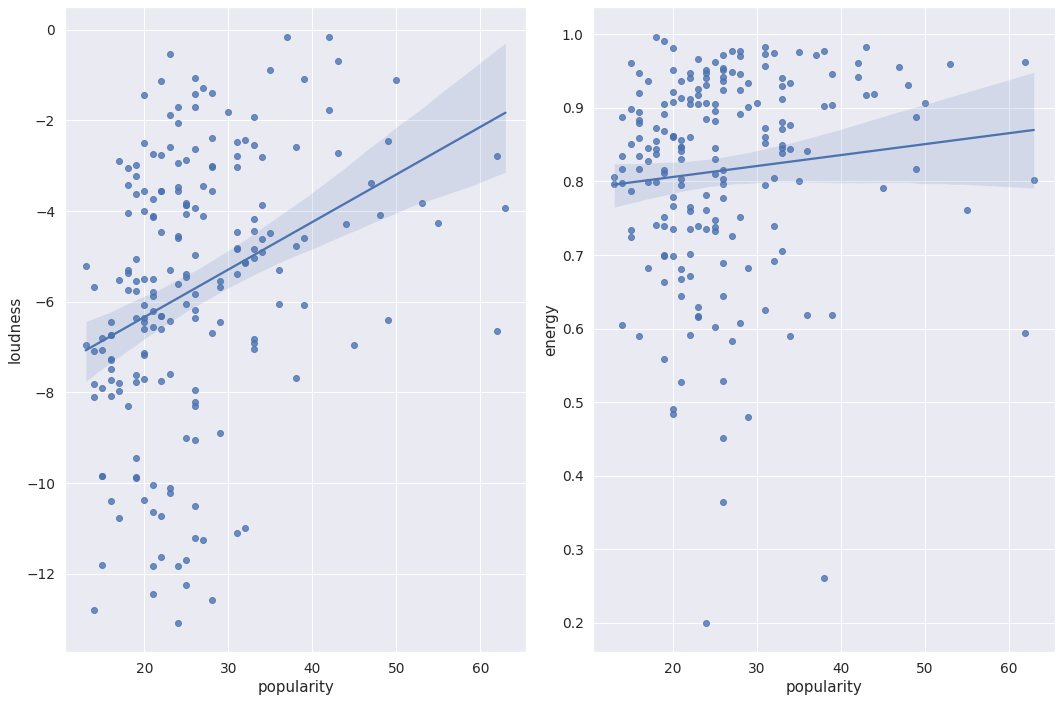

In [ ]:
# pengaruh popularity atas loudness dan energy
correlation_scatter_compare(jkt48_df, 'loudness', 'energy')

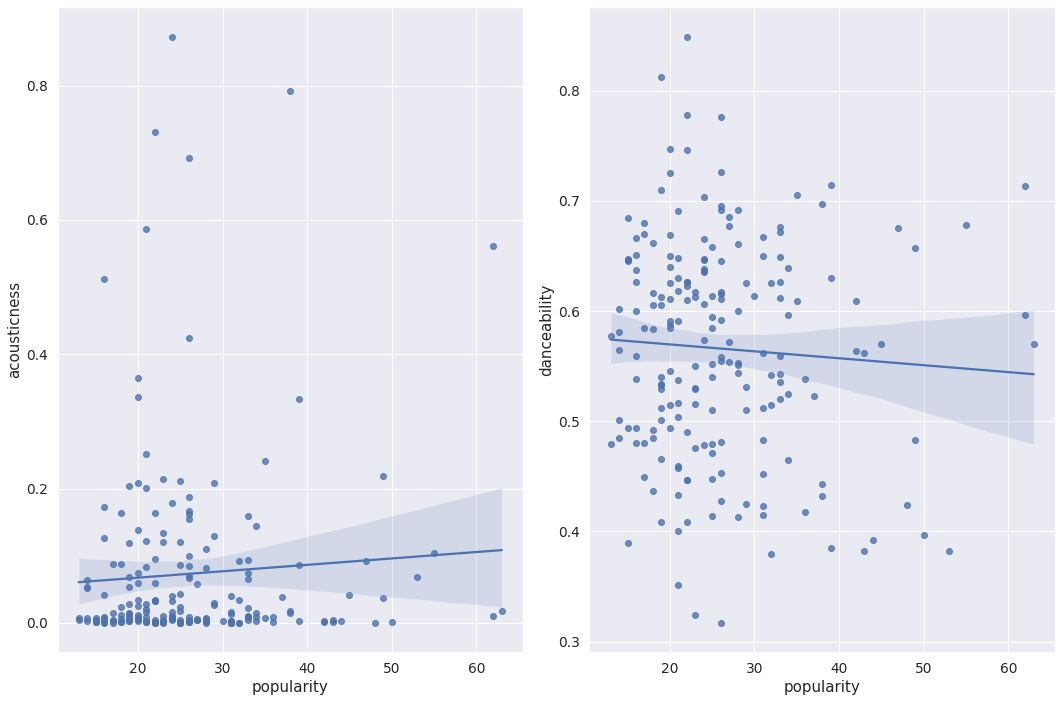

In [ ]:
# pengaruh popularity atas acousticness dan danceability
correlation_scatter_compare(jkt48_df, 'acousticness', 'danceability')

## Data Preparation

In [ ]:
# function buat minmax feature yang dipilih
def minmax_features(x):
    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    return x_scaled

In [ ]:
# buat dataset copy untuk di cluster
indo_cluster = indo_df.copy()
# ambil 200 baris teratas
indo_cluster = indo_cluster.sort_values('popularity', ascending=False).iloc[:200]

X_id = indo_cluster[['danceability', 'energy', 'loudness',  'acousticness', 
                'instrumentalness', 'liveness', 'valence', 'tempo']].values

# run minmax scaling 
scaled_Xid = minmax_features(X_id)

In [ ]:
scaled_Xid.shape

(200, 8)

In [ ]:
# buat dataset copy untuk di cluster
japan_cluster = japan_df.copy()
# ambil 200 baris teratas
japan_cluster = japan_cluster.sort_values('popularity', ascending=False).iloc[:200]

X_jp = japan_cluster[['danceability', 'energy', 'loudness',  'acousticness', 
                'instrumentalness', 'liveness', 'valence', 'tempo']].values

# run minmax scaling
scaled_Xjp = minmax_features(X_jp)

In [ ]:
scaled_Xjp.shape

(200, 8)

In [ ]:
# buat dataset copy untuk di cluster
korean_cluster = korean_df.copy()
# ambil 200 baris teratas
korean_cluster = korean_cluster.sort_values('popularity', ascending=False).iloc[:200]

X_kr = korean_cluster[['danceability', 'energy', 'loudness',  'acousticness', 
                'instrumentalness', 'liveness', 'valence', 'tempo']].values

# run minmax scaling
scaled_Xkr = minmax_features(X_kr)     

In [ ]:
scaled_Xkr.shape

(200, 8)

## Data Modelling

### Elbow Method

In [ ]:
# elbow method, 
# parameter feature, range1 dan range2
def elbow_method(x, n1, n2):
    wcss= []

    for i in range(n1, n2):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                        n_init = 10, random_state = 0)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)

    # vsualisasi plot
    plt.plot(range(n1, n2), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

Cari elbow method terbaik dari masing-masing data

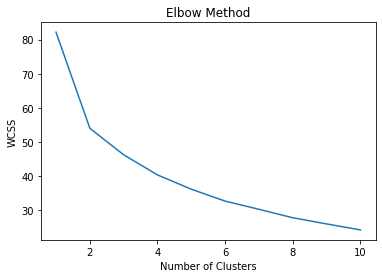

In [ ]:
# lagu dari indonesia
elbow_method(scaled_Xid, 1, 11)

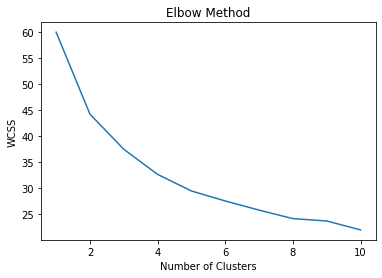

In [ ]:
# lagu dari korea
elbow_method(scaled_Xkr, 1, 11)

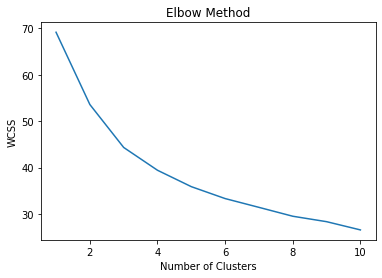

In [ ]:
# lagu dari jepang
elbow_method(scaled_Xjp, 1, 11)

### K-Means Cluster Modelling
hasil terbaik berada pada cluster ke 5

In [ ]:
# buat function model clustering
def cluster_modelling(x, n_clus):
    cluster_model = KMeans(n_clusters=n_clus, init='k-means++', max_iter=300, 
                           n_init=10, random_state=0)
    cluster_model.fit(x)

    # return model cluster
    return cluster_model

In [ ]:
# clusteirng untuk lagu indo
kmean_id = cluster_modelling(scaled_Xid, 4)
id_label = kmean_id.predict(scaled_Xid)

In [ ]:
np.unique(id_label, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([73, 11, 54, 62]))

In [ ]:
# clusteirng untuk lagu jepang
kmean_jp = cluster_modelling(scaled_Xjp, 4)
jp_label = kmean_jp.predict(scaled_Xjp)

In [ ]:
np.unique(jp_label, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([75, 41, 45, 39]))

In [ ]:
# clusteirng untuk lagu korea
kmean_kr = cluster_modelling(scaled_Xkr, 4)
kr_label = kmean_kr.predict(scaled_Xkr)

In [ ]:
np.unique(kr_label, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([38, 27, 65, 70]))

### Masukan Label ke masing-masing dataset

In [ ]:
# lagu - lagu di indonesia
indo_cluster['cluster'] = id_label
indo_cluster.head()

artist name                               track name  \
2           Joji                            Glimpse of Us   
12  Harry Styles                                As It Was   
77         Lizzo                          About Damn Time   
63  Harry Styles                       Late Night Talking   
20  Charlie Puth  Left and Right (Feat. Jung Kook of BTS)   

                  track id  popularity  danceability  energy  key  loudness  \
2   6xGruZOHLs39ZbVccQTuPZ          99         0.440   0.317    8    -9.258   
12  4LRPiXqCikLlN15c3yImP7          99         0.520   0.731    6    -5.338   
77  1PckUlxKqWQs3RlWXVBLw3          95         0.836   0.743   10    -6.305   
63  1qEmFfgcLObUfQm0j1W2CK          95         0.714   0.728   10    -4.595   
20  0mBP9X2gPCuapvpZ7TGDk3          94         0.881   0.592    2    -4.898   

    mode  speechiness  acousticness  instrumentalness  liveness  valence  \
2      1       0.0531        0.8910          0.000005    0.1410    0.268   
12     0       0.0557        0.3420          0.001010    0.3110    0.662   
77     0       0.0656        0.0995          0.000000    0.3350    0.722   
63     1       0.0468        0.2980          0.000000    0.1060    0.901   
20     1       0.0324        0.6190          0.000013    0.0901    0.719   

      tempo  duration_ms  time_signature  cluster  
2   169.914       233456               3        3  
12  173.930       167303               4        2  
77  108.966       191822               4        0  
63  114.996       177955               4        0  
20  101.058       154487               4        0

In [ ]:
closest_id, _ = pairwise_distances_argmin_min(kmean_id.cluster_centers_, scaled_Xid)
closest_id

array([113, 196, 136,  90])

In [ ]:
# tampilkan isi dari masing-masing dataset
indo_cluster.iloc[[113, 196, 136,  90],[0,1,3,4,5,7,10,11,12,13,14,17]]

artist name                             track name  popularity  \
92              Tiko                           Stressed Out          66   
116  Avery Alexander  Stealth (10 Year Anniversary Edition)          10   
254            Tulus                              Satu Kali          61   
50       Calum Scott                  Heaven (feat. Lyodra)          70   

     danceability  energy  loudness  acousticness  instrumentalness  liveness  \
92          0.789   0.749    -5.995         0.174          0.000003    0.0806   
116         0.441   0.283   -23.314         0.650          0.844000    0.1160   
254         0.550   0.598    -7.298         0.117          0.000016    0.1470   
50          0.473   0.349    -6.852         0.619          0.000000    0.1090   

     valence    tempo  cluster  
92     0.822  117.935        0  
116    0.201   80.002        1  
254    0.436  150.020        2  
50     0.390  117.697        3

In [ ]:
# lagu - lagu di jepang
japan_cluster['cluster'] = jp_label
japan_cluster.head()

artist name       track name                track id  popularity  \
688     Bad Bunny  Me Porto Bonito  6Sq7ltF9Qa7SNFBsV5Cogx         100   
223          Joji    Glimpse of Us  6xGruZOHLs39ZbVccQTuPZ          99   
196  Harry Styles        As It Was  4LRPiXqCikLlN15c3yImP7          99   
680     Bad Bunny    Ojitos Lindos  3k3NWokhRRkEPhCzPmV8TW          98   
725     Bad Bunny      Moscow Mule  6Xom58OOXk2SoU711L2IXO          97   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
688         0.911   0.712    1    -5.105     0       0.0817        0.0901   
223         0.440   0.317    8    -9.258     1       0.0531        0.8910   
196         0.520   0.731    6    -5.338     0       0.0557        0.3420   
680         0.647   0.686    3    -5.745     0       0.0413        0.0800   
725         0.804   0.674    5    -5.453     0       0.0333        0.2940   

     instrumentalness  liveness  valence    tempo  duration_ms  \
688          0.000027    0.0933    0.425   92.005       178567   
223          0.000005    0.1410    0.268  169.914       233456   
196          0.001010    0.3110    0.662  173.930       167303   
680          0.000001    0.5280    0.268   79.928       258299   
725          0.000001    0.1150    0.292   99.968       245940   

     time_signature  cluster  
688               4        0  
223               3        3  
196               4        1  
680               4        2  
725               4        3

In [ ]:
closest_jp, _ = pairwise_distances_argmin_min(kmean_jp.cluster_centers_, scaled_Xjp)
closest_jp

array([149,  33, 136,  90])

In [ ]:
# tampilkan isi dari masing-masing dataset
japan_cluster.iloc[[149,  33, 136,  90],[0,1,3,4,5,7,10,11,12,13,14,17]]

artist name   track name  popularity  danceability  energy  loudness  \
229  Ayumu Imazu    Tangerine          60         0.746   0.700    -4.785   
159          BTS  Born Singer          83         0.602   0.841    -3.334   
162       Aimyon           双葉          61         0.600   0.794    -3.322   
75         Yuuri           レオ          67         0.629   0.543    -6.281   

     acousticness  instrumentalness  liveness  valence    tempo  cluster  
229        0.0454          0.000000     0.118    0.693  117.012        0  
159        0.0354          0.000000     0.235    0.684  157.937        1  
162        0.0387          0.000005     0.414    0.664  111.984        2  
75         0.3830          0.000000     0.127    0.403   93.043        3

In [ ]:
# lagu - lagu di korean
korean_cluster['cluster'] = kr_label
korean_cluster.head()

artist name                               track name  \
64   Harry Styles                                As It Was   
42           Joji                            Glimpse of Us   
125         Lizzo                          About Damn Time   
83   Harry Styles                       Late Night Talking   
2    Charlie Puth  Left and Right (Feat. Jung Kook of BTS)   

                   track id  popularity  danceability  energy  key  loudness  \
64   4LRPiXqCikLlN15c3yImP7          99         0.520   0.731    6    -5.338   
42   6xGruZOHLs39ZbVccQTuPZ          99         0.440   0.317    8    -9.258   
125  1PckUlxKqWQs3RlWXVBLw3          95         0.836   0.743   10    -6.305   
83   1qEmFfgcLObUfQm0j1W2CK          95         0.714   0.728   10    -4.595   
2    0mBP9X2gPCuapvpZ7TGDk3          94         0.881   0.592    2    -4.898   

     mode  speechiness  acousticness  instrumentalness  liveness  valence  \
64      0       0.0557        0.3420          0.001010    0.3110    0.662   
42      1       0.0531        0.8910          0.000005    0.1410    0.268   
125     0       0.0656        0.0995          0.000000    0.3350    0.722   
83      1       0.0468        0.2980          0.000000    0.1060    0.901   
2       1       0.0324        0.6190          0.000013    0.0901    0.719   

       tempo  duration_ms  time_signature  cluster  
64   173.930       167303               4        0  
42   169.914       233456               3        1  
125  108.966       191822               4        3  
83   114.996       177955               4        3  
2    101.058       154487               4        2

In [ ]:
closest_kr, _ = pairwise_distances_argmin_min(kmean_kr.cluster_centers_, scaled_Xkr)
closest_kr

array([ 65, 116,  51, 134])

In [ ]:
# tampilkan isi dari masing-masing dataset
korean_cluster.iloc[[ 65, 116,  51, 134], [0,1,3,4,5,7,10,11,12,13,14,17]]

artist name              track name  popularity  danceability  energy  \
403  Chris Jonex      Deja Que Tus Manos          78         0.538   0.785   
744         BIBI            Very, Slowly          65         0.528   0.423   
623   Ed Sheeran  2step (feat. Lil Baby)          81         0.693   0.643   
504        HEIZE                    Undo          56         0.784   0.676   

     loudness  acousticness  instrumentalness  liveness  valence    tempo  \
403    -4.870         0.142          0.000000    0.3000    0.631  146.066   
744    -7.381         0.678          0.001480    0.1670    0.249  135.917   
623    -5.867         0.138          0.000000    0.1080    0.477   95.055   
504    -4.836         0.201          0.000001    0.0903    0.734  116.103   

     cluster  
403        0  
744        1  
623        2  
504        3

## Feature Analysis

In [ ]:
def compare_between_cluster(df, feature, feature_title):
    fig, ax1 = plt.subplots(figsize=(16,9))
    sns.distplot(df[df['cluster'] == 0][feature], label = 'Cluster 1')
    sns.distplot(df[df['cluster'] == 1][feature], label = 'Cluster 2')
    sns.distplot(df[df['cluster'] == 2][feature], label = 'Cluster 3')
    sns.distplot(df[df['cluster'] == 3][feature], label = 'Cluster 4')
    plt.title(feature_title)
    plt.legend()

### Membandingkan Karakteristik Fitur berdasarkan Cluster

#### Valence

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

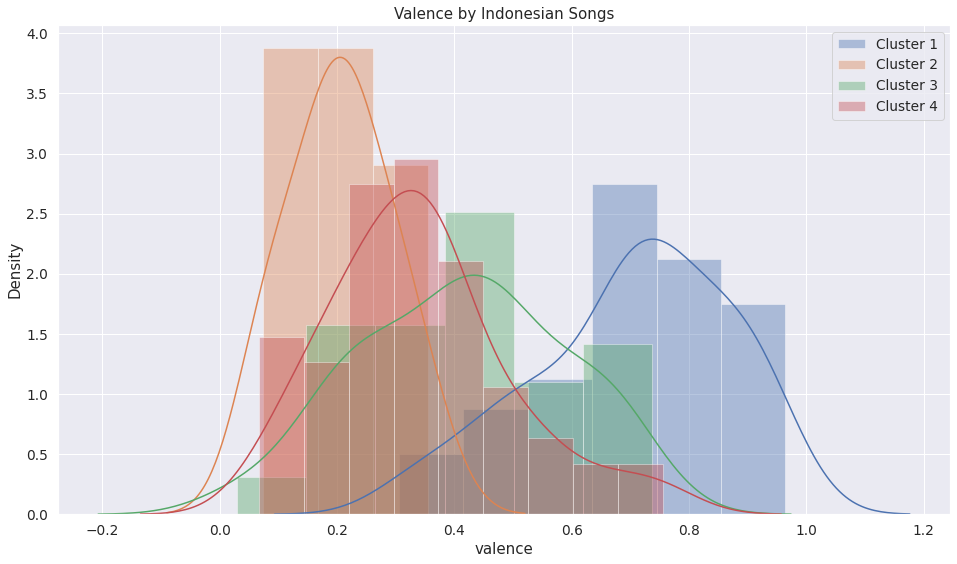

In [ ]:
# valence dari lagu indo
compare_between_cluster(indo_cluster, 'valence', 'Valence by Indonesian Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

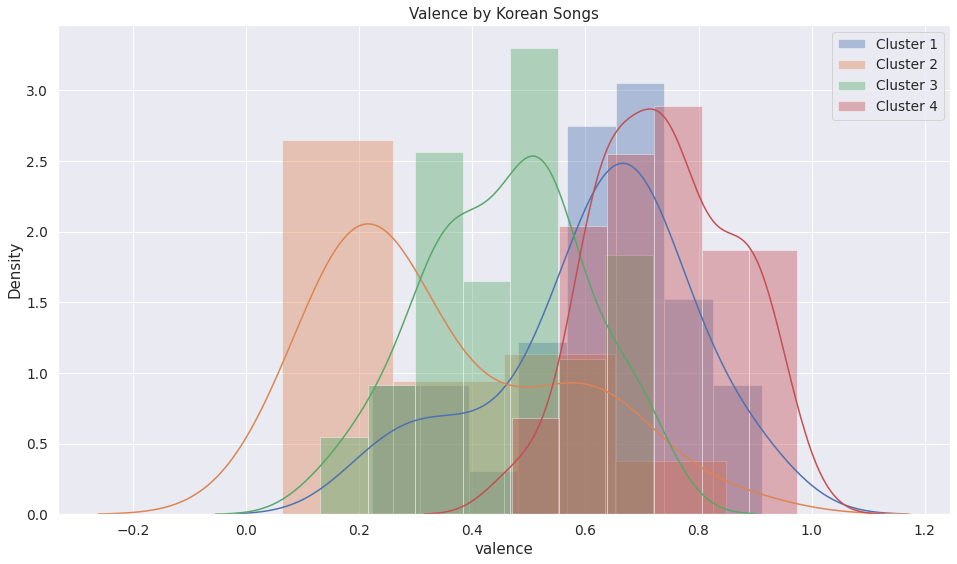

In [ ]:
# valence dari lagu korea
compare_between_cluster(korean_cluster, 'valence', 'Valence by Korean Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

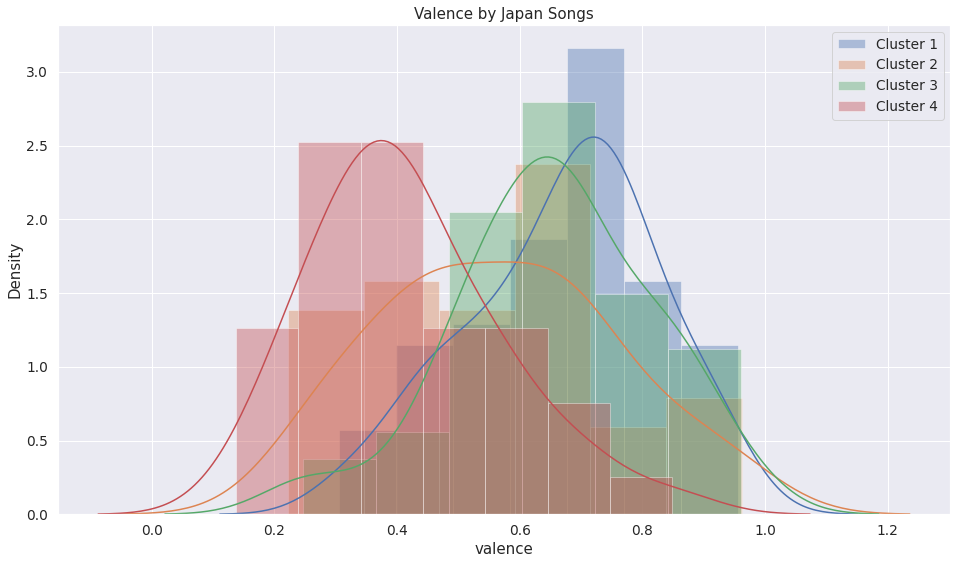

In [ ]:
# valence dari lagu japan
compare_between_cluster(japan_cluster, 'valence', 'Valence by Japan Songs')

#### Danceability

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

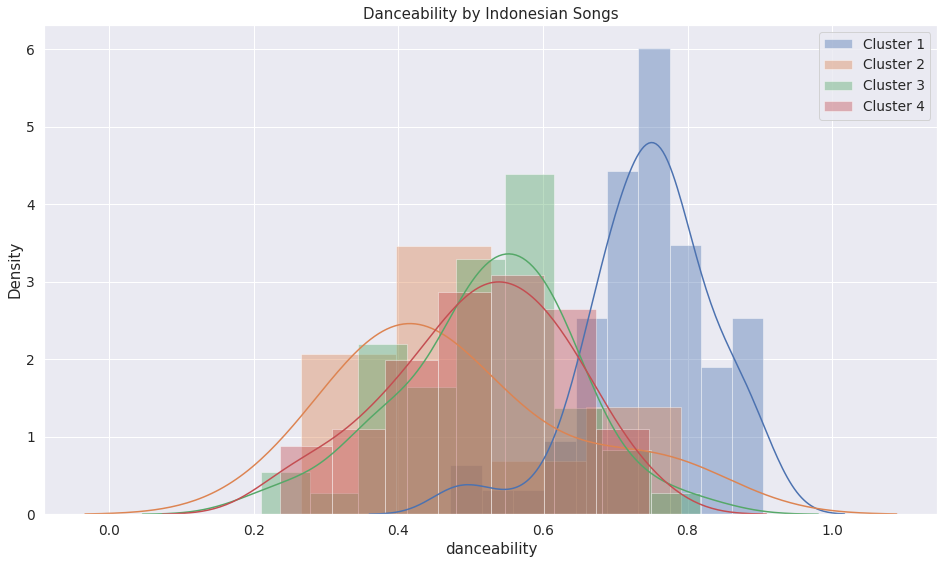

In [ ]:
# danceability dari lagu indonesia
compare_between_cluster(indo_cluster, 'danceability', 'Danceability by Indonesian Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

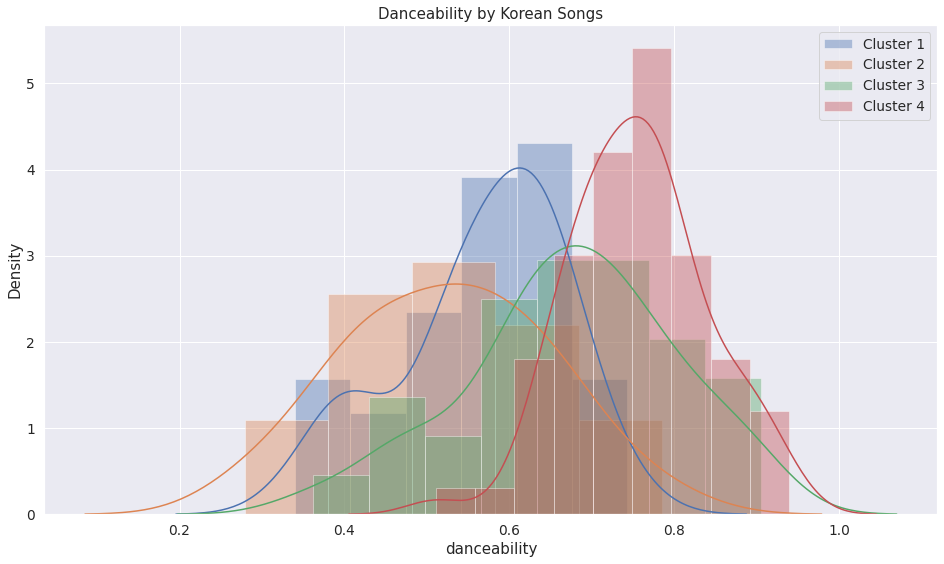

In [ ]:
# danceability dari lagu korea
compare_between_cluster(korean_cluster, 'danceability', 'Danceability by Korean Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

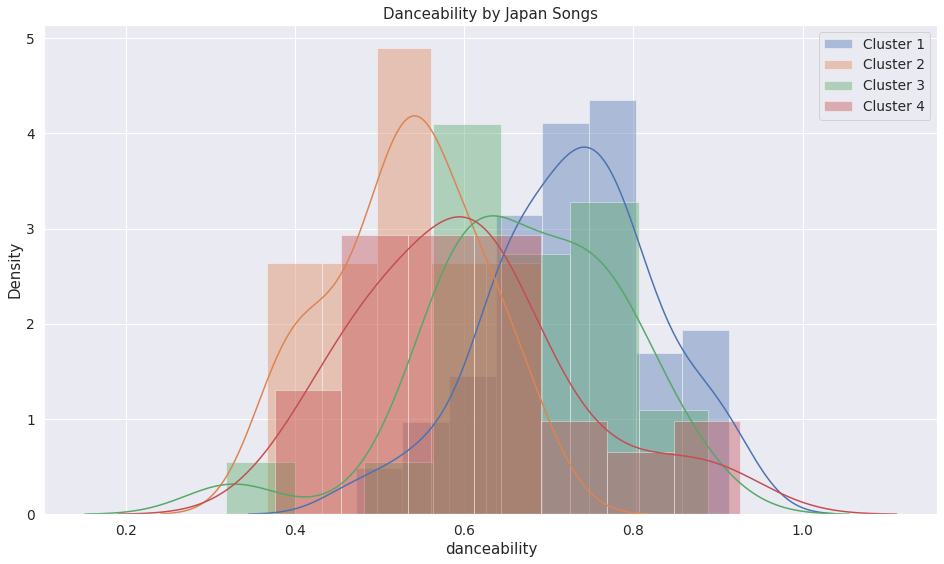

In [ ]:
# danceability dari lagu japan
compare_between_cluster(japan_cluster, 'danceability', 'Danceability by Japan Songs')

#### Energy

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

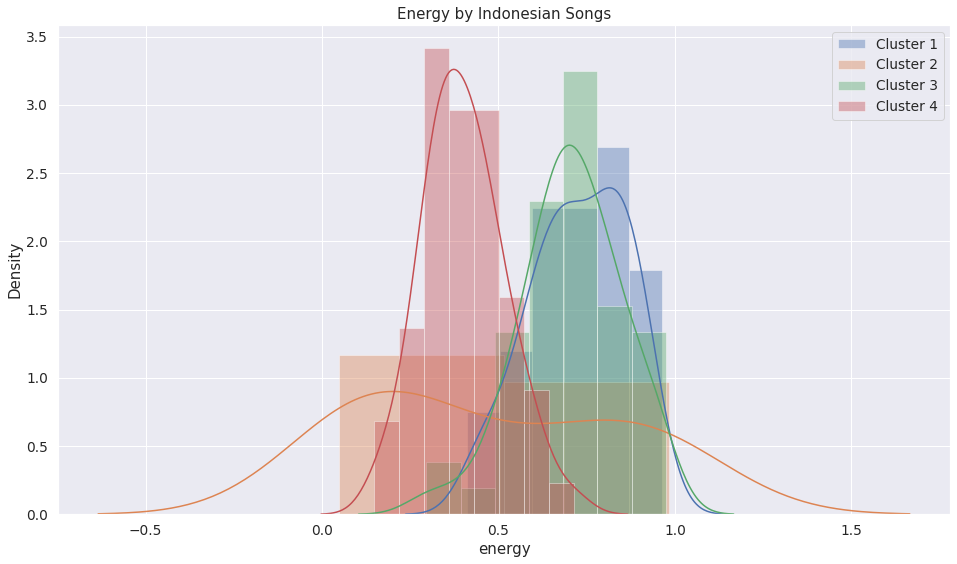

In [ ]:
# energy dari lagu indonesia
compare_between_cluster(indo_cluster, 'energy', 'Energy by Indonesian Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

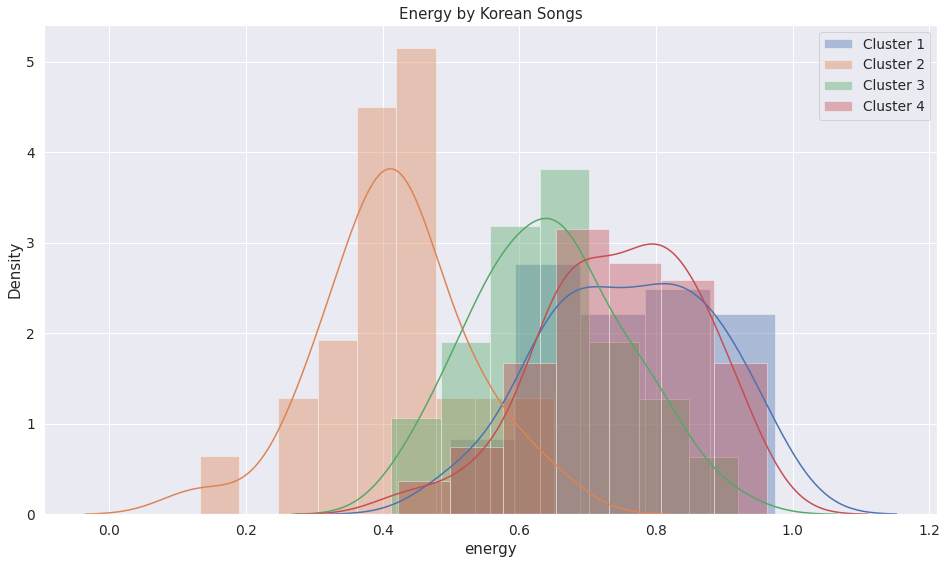

In [ ]:
# energy dari lagu korea
compare_between_cluster(korean_cluster, 'energy', 'Energy by Korean Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

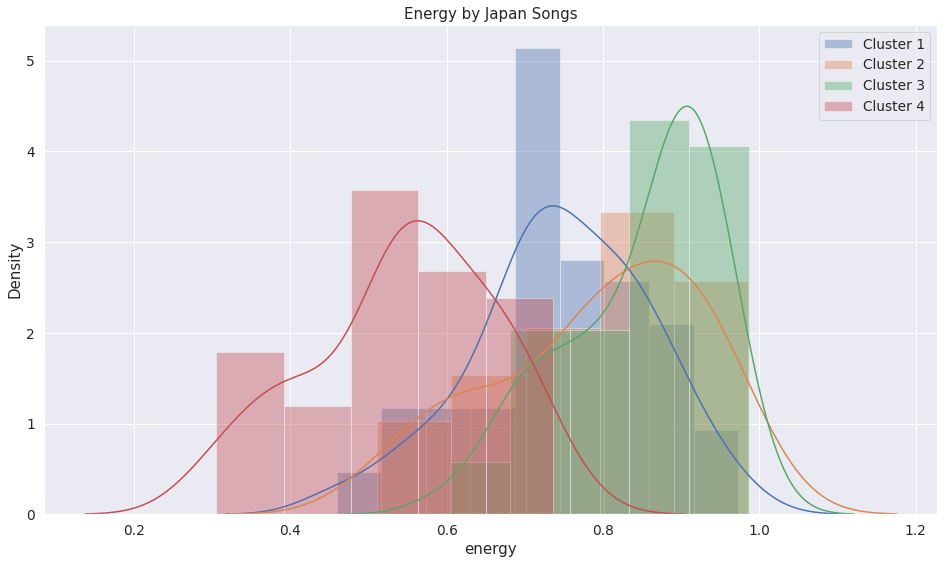

In [ ]:
# energy dari lagu jepang
compare_between_cluster(japan_cluster, 'energy', 'Energy by Japan Songs')

#### Loudness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

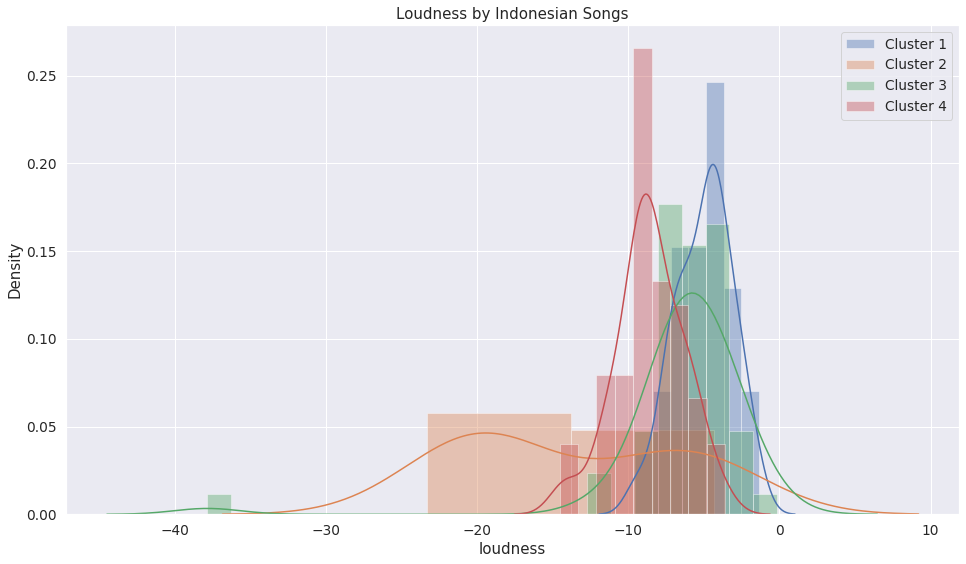

In [ ]:
# loudness dari lagu indonesia
compare_between_cluster(indo_cluster, 'loudness', 'Loudness by Indonesian Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

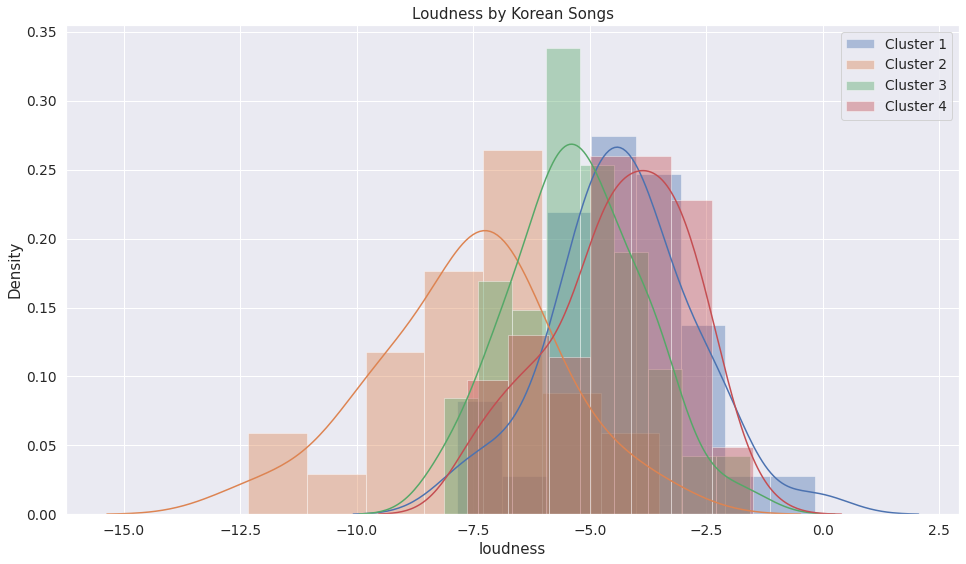

In [ ]:
# loudness dari lagu korea
compare_between_cluster(korean_cluster, 'loudness', 'Loudness by Korean Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

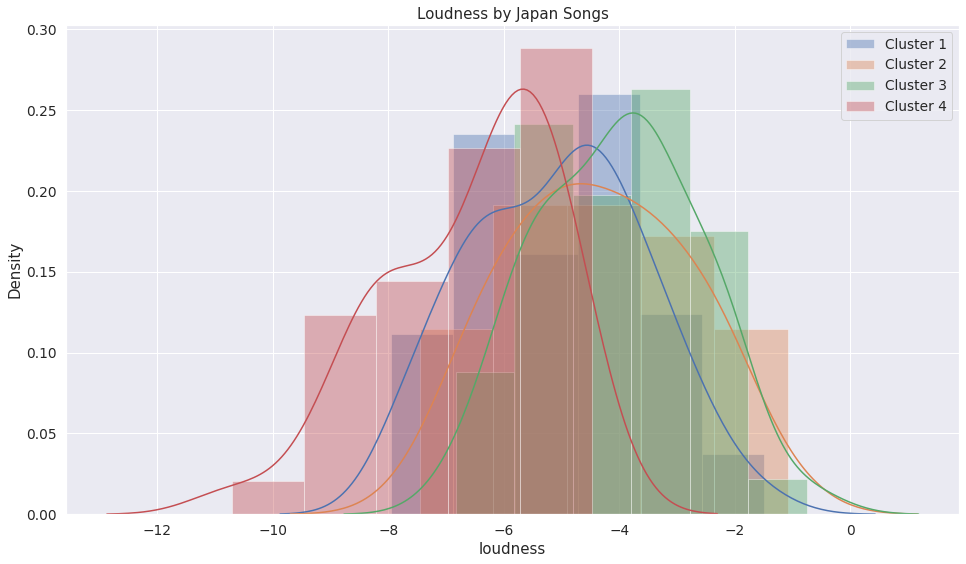

In [ ]:
# loudness dari lagu jepang
compare_between_cluster(japan_cluster, 'loudness', 'Loudness by Japan Songs')

#### Acousticness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

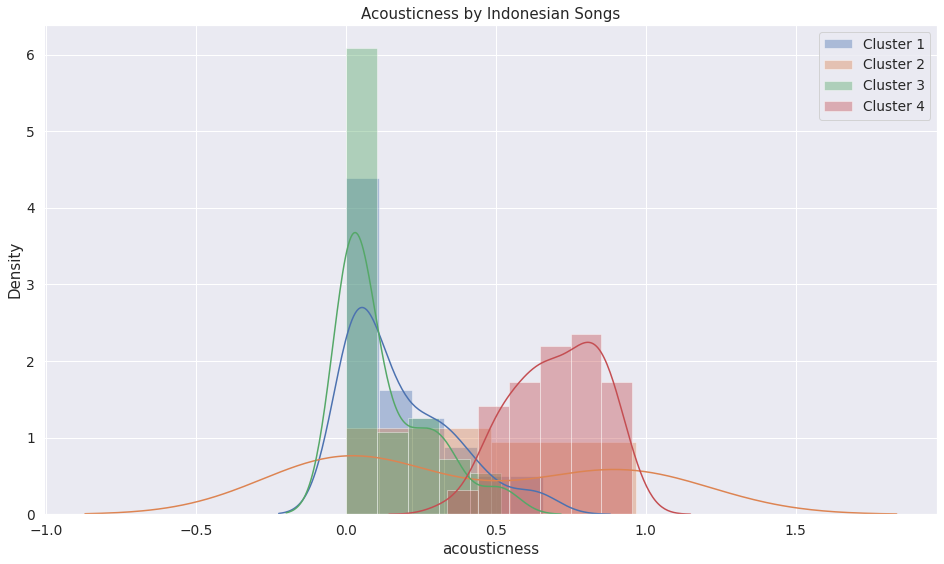

In [ ]:
# acousticness dari lagu indonesia
compare_between_cluster(indo_cluster, 'acousticness', 'Acousticness by Indonesian Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

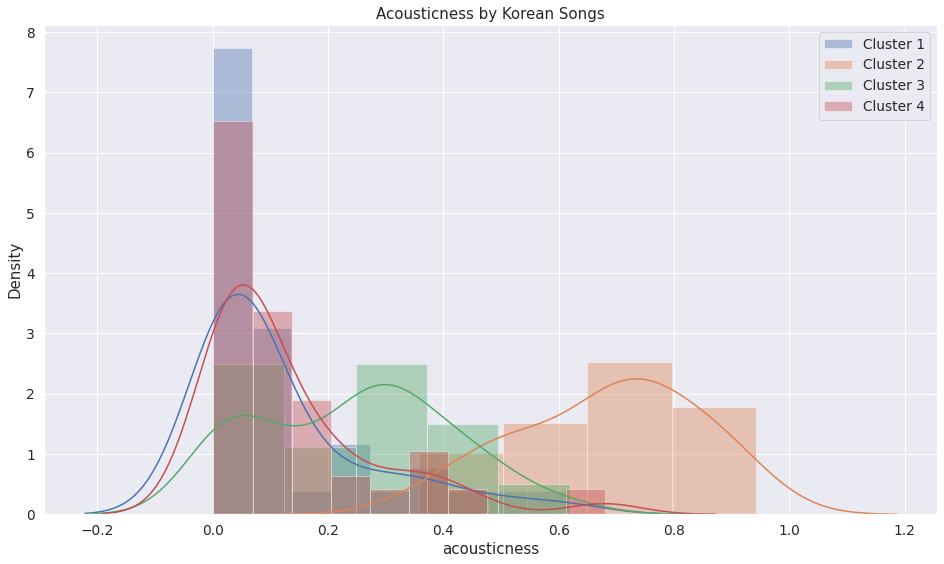

In [ ]:
# acousticness dari lagu korea
compare_between_cluster(korean_cluster, 'acousticness', 'Acousticness by Korean Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

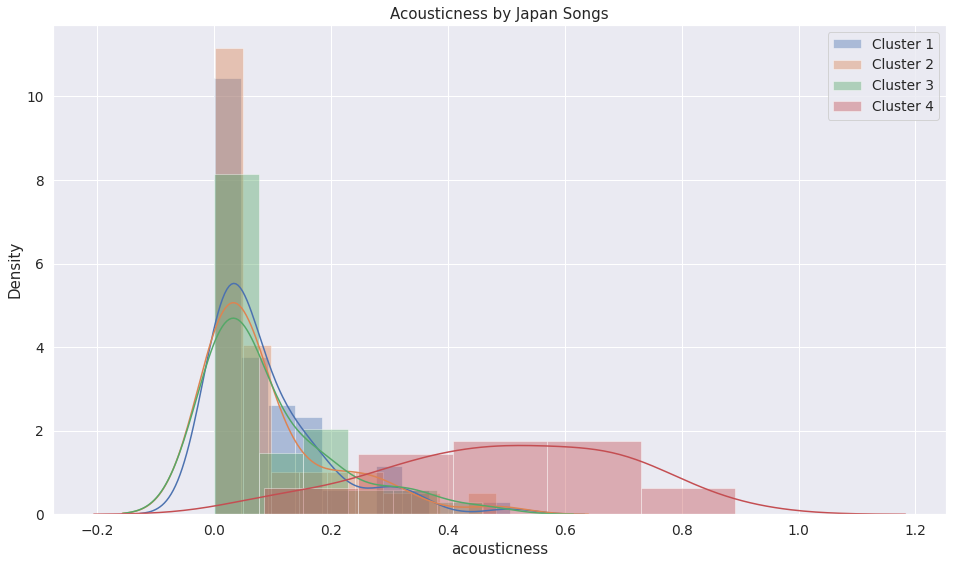

In [ ]:
# acousticness dari lagu jepang
compare_between_cluster(japan_cluster, 'acousticness', 'Acousticness by Japan Songs')

#### Instrumentalness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

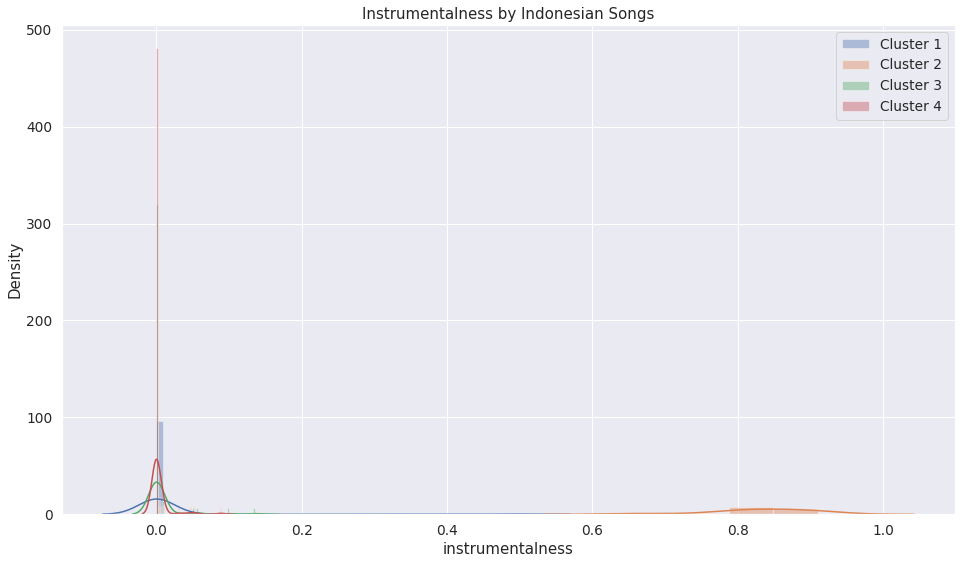

In [ ]:
# instrumentalness dari lagu indonesia
compare_between_cluster(indo_cluster, 'instrumentalness', 'Instrumentalness by Indonesian Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

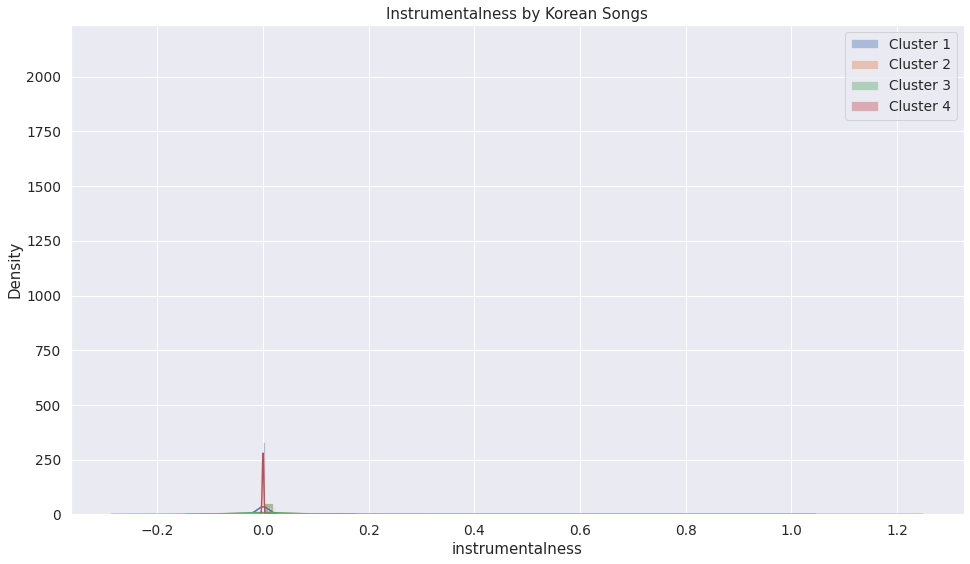

In [ ]:
# instrumentalness dari lagu korea
compare_between_cluster(korean_cluster, 'instrumentalness', 'Instrumentalness by Korean Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

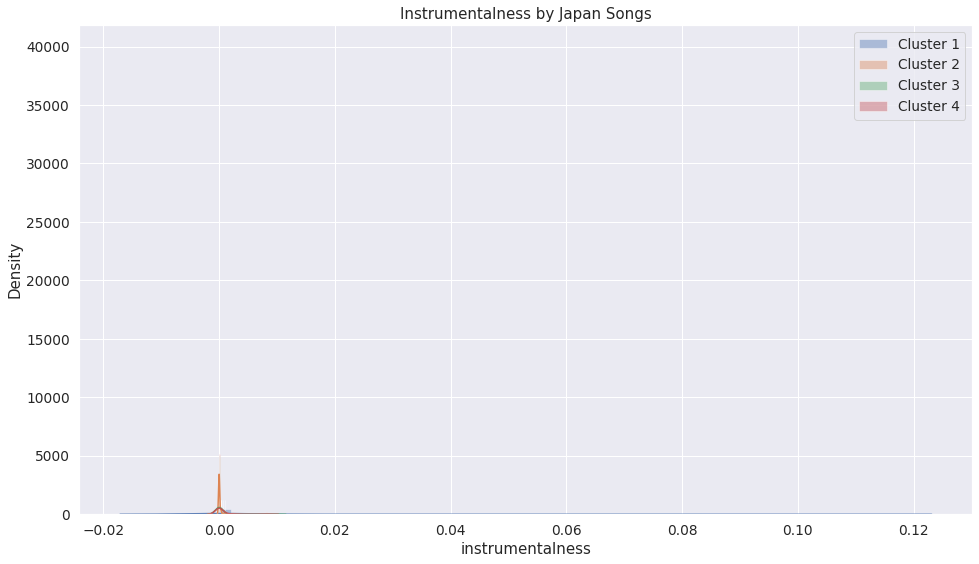

In [ ]:
# instrumentalness dari lagu jepang
compare_between_cluster(japan_cluster, 'instrumentalness', 'Instrumentalness by Japan Songs')

#### Liveness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

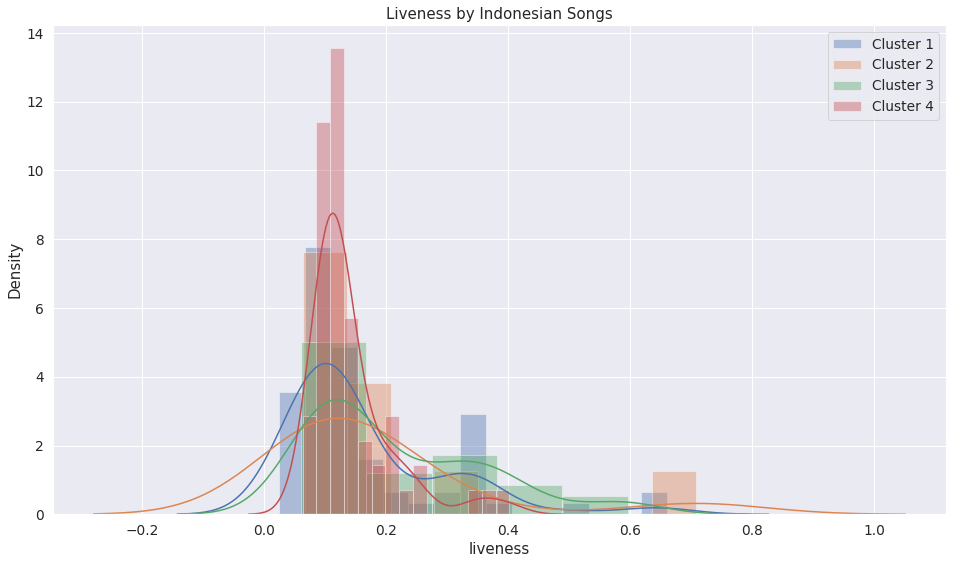

In [ ]:
# liveness dari lagu indonesia
compare_between_cluster(indo_cluster, 'liveness', 'Liveness by Indonesian Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

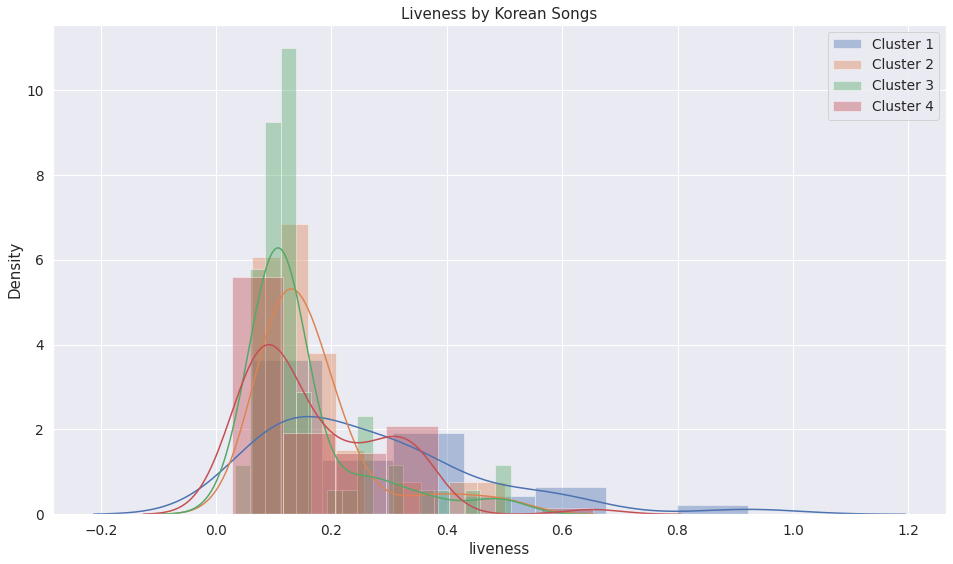

In [ ]:
# liveness dari lagu korea
compare_between_cluster(korean_cluster, 'liveness', 'Liveness by Korean Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

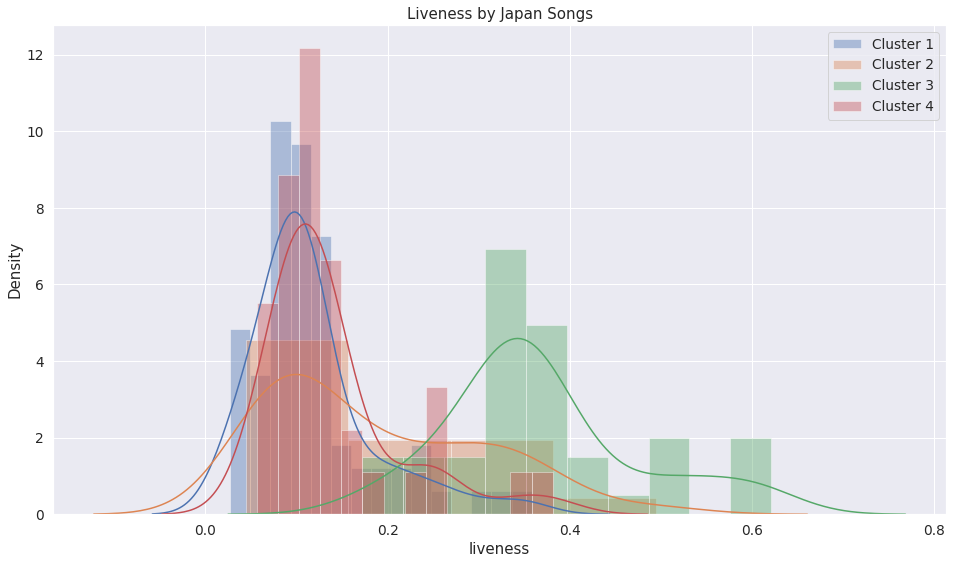

In [ ]:
# liveness dari lagu jepang
compare_between_cluster(japan_cluster, 'liveness', 'Liveness by Japan Songs')

#### Tempo

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

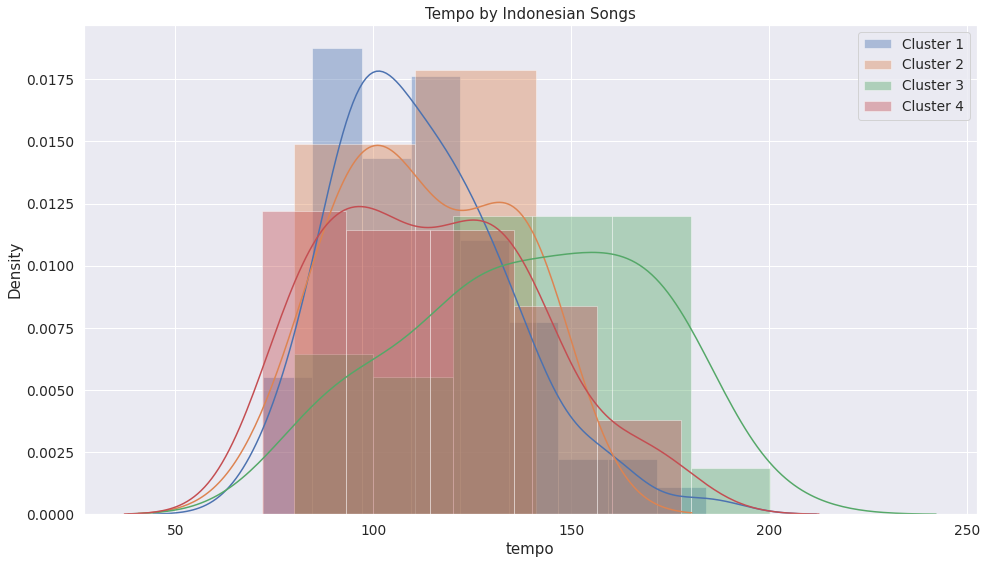

In [ ]:
# tempo dari lagu indonesia
compare_between_cluster(indo_cluster, 'tempo', 'Tempo by Indonesian Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

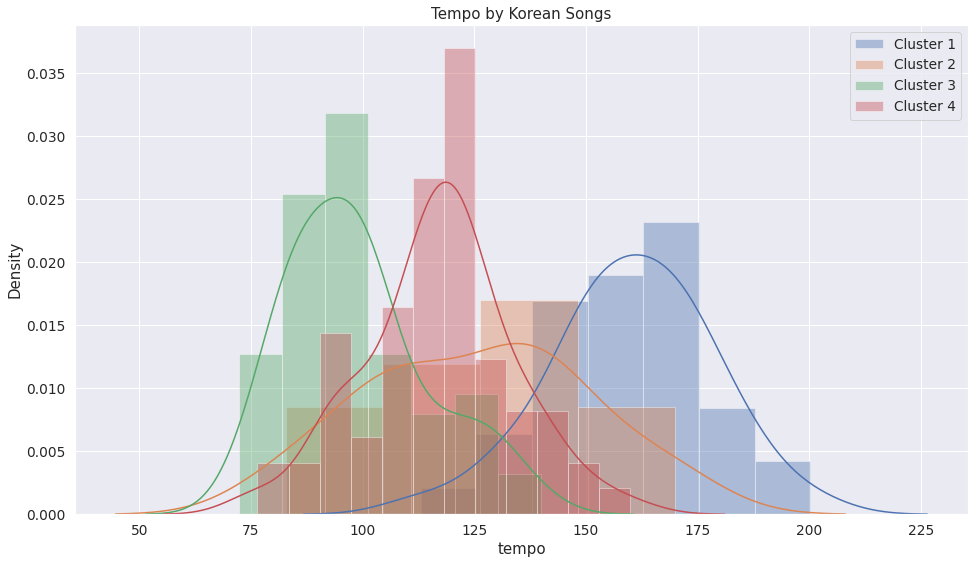

In [ ]:
# tempo dari lagu korea
compare_between_cluster(korean_cluster, 'tempo', 'Tempo by Korean Songs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

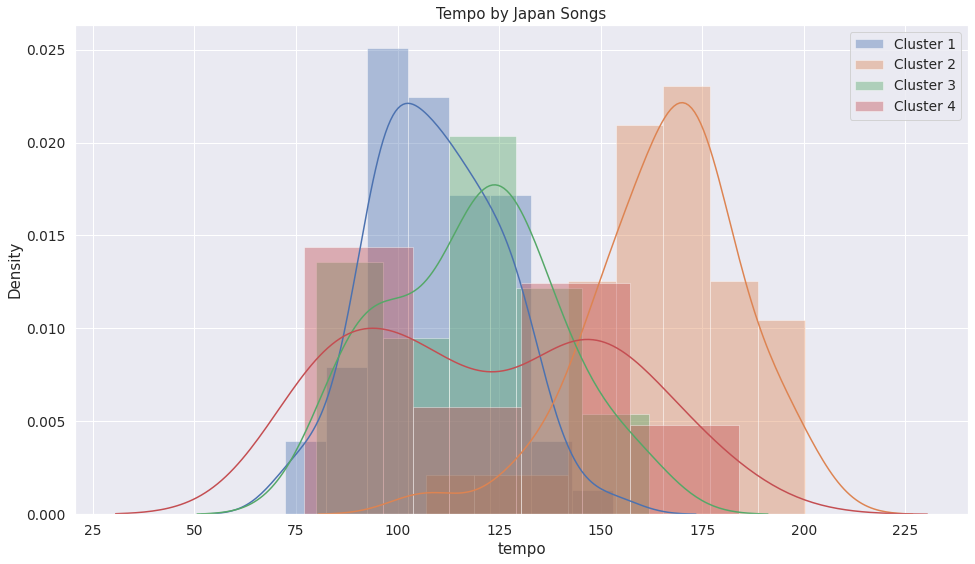

In [ ]:
# tempo dari lagu jepang
compare_between_cluster(japan_cluster, 'tempo', 'Tempo by Japan Songs')

### Pattern Identification of Popular song in Indonesian Demographic

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.183080
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.257057
[t-SNE] KL divergence after 500 iterations: 0.673584


[Text(0.5, 1.0, 'Indonesian Demographic song Pattern')]

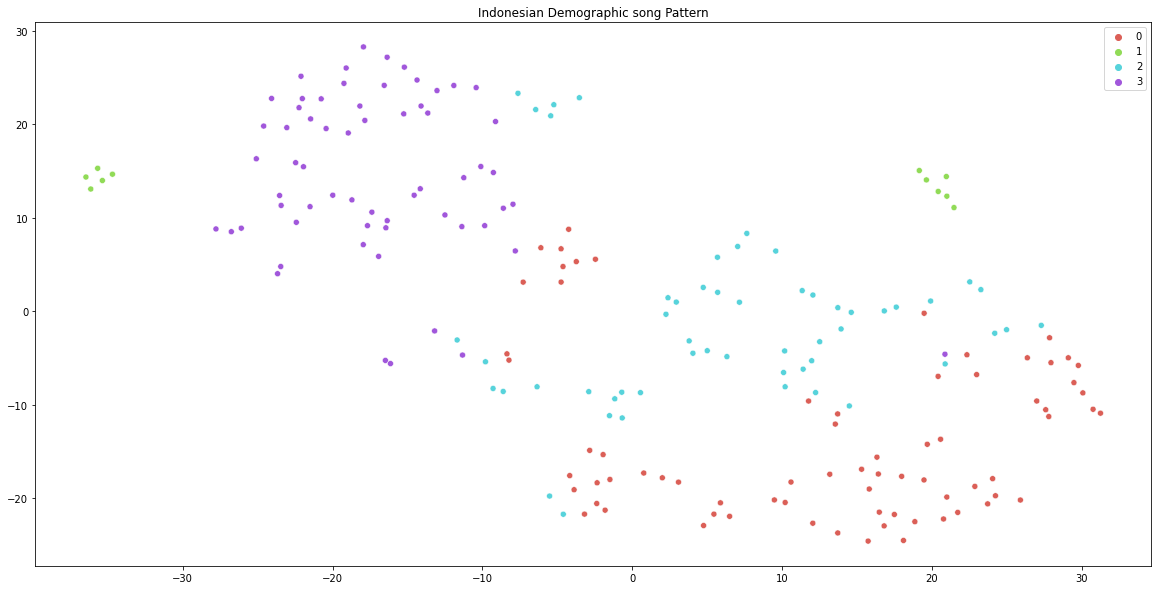

In [ ]:
from sklearn.manifold import TSNE

# tsne calculation
tsne_id = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=500)
tsne_results_id = tsne_id.fit_transform(scaled_Xid)

# scatter plot visualization
fig, ax1 = plt.subplots(figsize=(20,10))

sns.scatterplot(
    x=tsne_results_id[:,0], y=tsne_results_id[:,1],
    hue=id_label,
    # jumla cluster pada parameter color palette harus sesuai
    palette=sns.color_palette("hls", 4),
    legend="full"
).set(title='Indonesian Demographic song Pattern')

### Pattern Identification of Popular song in Korean Demographic

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.164827
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.344063
[t-SNE] KL divergence after 500 iterations: 0.779731


[Text(0.5, 1.0, 'Korean Demographic song Pattern')]

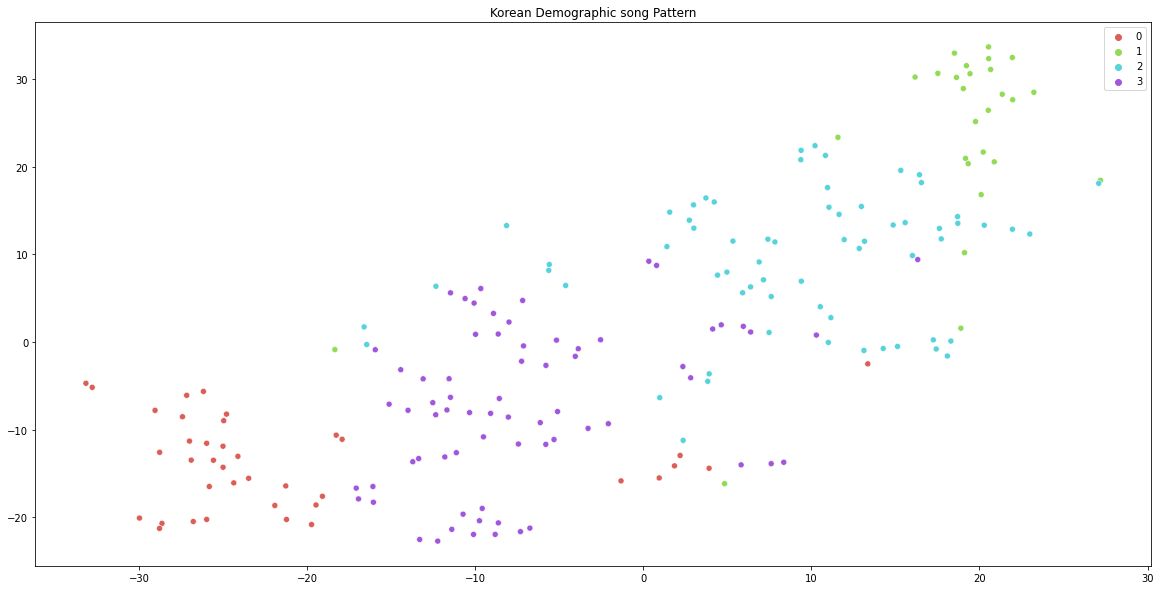

In [ ]:
# tsne calculation
tsne_kr = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=500)
tsne_results_kr = tsne_kr.fit_transform(scaled_Xkr)

# scatter plot visualization
fig, ax1 = plt.subplots(figsize=(20,10))

sns.scatterplot(
    x=tsne_results_kr[:,0], y=tsne_results_kr[:,1],
    hue=kr_label,
    # jumla cluster pada parameter color palette harus sesuai
    palette=sns.color_palette("hls", 4),
    legend="full"
).set(title='Korean Demographic song Pattern')

### Pattern Identification of Popular song in Japan Demographic

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.186789
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.275848
[t-SNE] KL divergence after 500 iterations: 0.778091


[Text(0.5, 1.0, 'Japan Demographic song Pattern')]

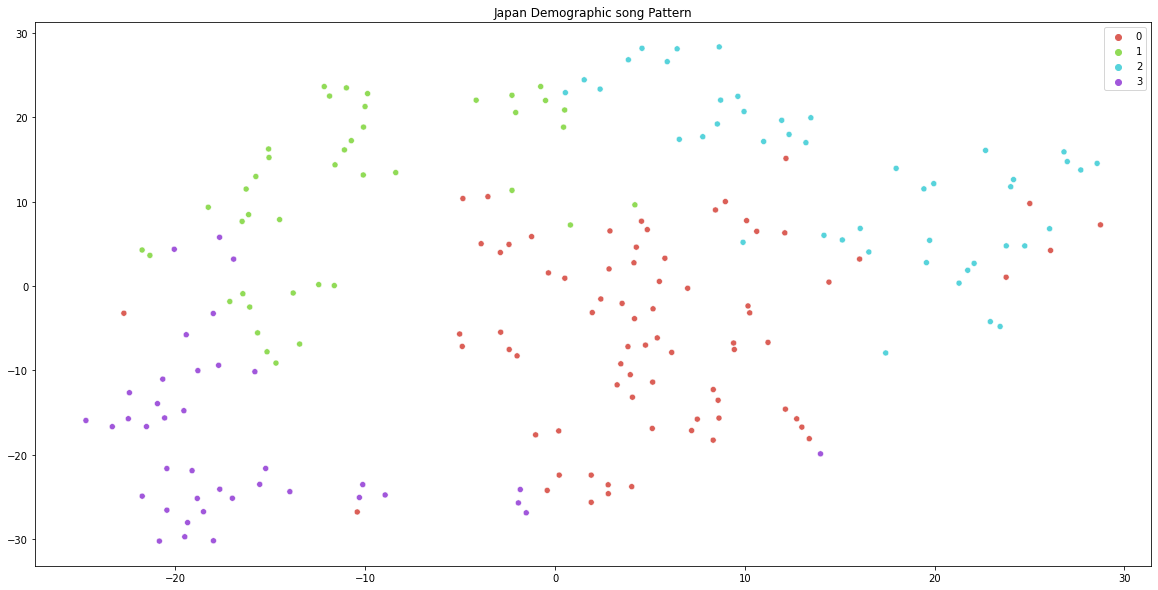

In [ ]:
# tsne calculation
tsne_jp = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=500)
tsne_results_jp = tsne_jp.fit_transform(scaled_Xjp)

# scatter plot visualization
fig, ax1 = plt.subplots(figsize=(20,10))

sns.scatterplot(
    x=tsne_results_jp[:,0], y=tsne_results_jp[:,1],
    hue=jp_label,
    # jumla cluster pada parameter color palette harus sesuai
    palette=sns.color_palette("hls", 4),
    legend="full"
).set(title='Japan Demographic song Pattern')

### Cari Tahu Popularitas lagu dari tiap Cluster

#### Lagu di Demografi masyarakat Indonesia

In [ ]:
# rata-rata popularity berdasarkan cluster
indo_cluster.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
0    69.301370
3    65.983871
2    57.148148
1    18.272727
Name: popularity, dtype: float64

In [ ]:
# tampilkan lagu berdasarkan cluster tertentu
indo_cluster.loc[indo_cluster['cluster'] == 0][:10]

artist name                                         track name  \
77            Lizzo                                    About Damn Time   
63     Harry Styles                                 Late Night Talking   
20     Charlie Puth            Left and Right (Feat. Jung Kook of BTS)   
139     Post Malone        I Like You (A Happier Song) (with Doja Cat)   
144     Jack Harlow                                        First Class   
302  Camila Cabello                         Bam Bam (feat. Ed Sheeran)   
247         Beyoncé                                      BREAK MY SOUL   
40      OneRepublic                                    I Ain't Worried   
626        Doja Cat  Vegas (From the Original Motion Picture Soundt...   
676   Calvin Harris                Potion (with Dua Lipa & Young Thug)   

                   track id  popularity  danceability  energy  key  loudness  \
77   1PckUlxKqWQs3RlWXVBLw3          95         0.836   0.743   10    -6.305   
63   1qEmFfgcLObUfQm0j1W2CK          95         0.714   0.728   10    -4.595   
20   0mBP9X2gPCuapvpZ7TGDk3          94         0.881   0.592    2    -4.898   
139  0O6u0VJ46W86TxN9wgyqDj          92         0.733   0.670    5    -6.009   
144  1rDQ4oMwGJI7B4tovsBOxc          92         0.905   0.563    8    -6.135   
302  0QBzMgT7NIeoCYy3sJCof1          91         0.756   0.697    8    -6.377   
247  2KukL7UlQ8TdvpaA7bY3ZJ          91         0.687   0.887    1    -5.040   
40   4h9wh7iOZ0GGn8QVp4RAOB          91         0.704   0.797    0    -5.927   
626  0hquQWY3xvYqN4qtiquniF          90         0.801   0.601    8    -7.574   
676  7fYRg3CEbk6rNCuzNzMT06          89         0.824   0.697   11    -4.869   

     mode  speechiness  acousticness  instrumentalness  liveness  valence  \
77      0       0.0656        0.0995          0.000000    0.3350    0.722   
63      1       0.0468        0.2980          0.000000    0.1060    0.901   
20      1       0.0324        0.6190          0.000013    0.0901    0.719   
139     1       0.0751        0.1210          0.000000    0.1210    0.472   
144     1       0.1020        0.0254          0.000010    0.1130    0.324   
302     1       0.0401        0.1820          0.000000    0.3330    0.956   
247     0       0.0826        0.0575          0.000002    0.2700    0.853   
40      1       0.0475        0.0826          0.000745    0.0546    0.825   
626     0       0.2550        0.0777          0.000032    0.1450    0.740   
676     0       0.0473        0.1580          0.000041    0.0770    0.757   

       tempo  duration_ms  time_signature  cluster  
77   108.966       191822               4        0  
63   114.996       177955               4        0  
20   101.058       154487               4        0  
139  100.964       192841               4        0  
144  106.998       173948               4        0  
302   94.996       206071               4        0  
247  114.941       278282               4        0  
40   139.994       148486               4        0  
626  159.969       182907               4        0  
676   99.988       214460               4        0

In [ ]:
# distribusi statitik dari data pada tiap kolom,  dan per cluster
indo_cluster.groupby('cluster').describe()

popularity                                                        \
             count       mean        std   min    25%   50%    75%   max   
cluster                                                                    
0             73.0  69.301370  23.265786  10.0  64.00  76.0  83.00  95.0   
1             11.0  18.272727   4.818525  10.0  17.00  19.0  21.00  26.0   
2             54.0  57.148148  26.793696   9.0  31.00  66.5  76.75  99.0   
3             62.0  65.983871  14.955115  15.0  59.25  65.5  75.00  99.0   

        danceability            ... duration_ms            time_signature  \
               count      mean  ...         75%        max          count   
cluster                         ...                                         
0               73.0  0.746479  ...   212687.00   336254.0           73.0   
1               11.0  0.481636  ...   371747.00   649000.0           11.0   
2               54.0  0.523463  ...   235581.25  3100640.0           54.0   
3               62.0  0.511661  ...   253500.00   336001.0           62.0   

                                                      
             mean       std  min  25%  50%  75%  max  
cluster                                               
0        4.013699  0.117041  4.0  4.0  4.0  4.0  5.0  
1        3.909091  0.301511  3.0  4.0  4.0  4.0  4.0  
2        3.833333  0.376177  3.0  4.0  4.0  4.0  4.0  
3        3.774194  0.421526  3.0  4.0  4.0  4.0  4.0  

[4 rows x 112 columns]

#### Lagu di Demografi masyarakat Korea

In [ ]:
# rata-rata popularity berdasarkan cluster
korean_cluster.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
2    69.169231
0    68.552632
3    67.085714
1    62.259259
Name: popularity, dtype: float64

In [ ]:
# tampilkan lagu berdasarkan cluster tertentu
korean_cluster.loc[korean_cluster['cluster'] == 2][:10]

artist name                                   track name  \
2      Charlie Puth      Left and Right (Feat. Jung Kook of BTS)   
166     Jack Harlow                                  First Class   
44      Post Malone  I Like You (A Happier Song) (with Doja Cat)   
531          Future              WAIT FOR U (feat. Drake & Tems)   
300    Harry Styles                 Music For a Sushi Restaurant   
629    Benson Boone                                 In The Stars   
20           j-hope                                         MORE   
621      Kanye West                                    True Love   
407   The Kid LAROI                               Thousand Miles   
475  Kendrick Lamar                                          N95   

                   track id  popularity  danceability  energy  key  loudness  \
2    0mBP9X2gPCuapvpZ7TGDk3          94         0.881   0.592    2    -4.898   
166  1rDQ4oMwGJI7B4tovsBOxc          92         0.905   0.563    8    -6.135   
44   0O6u0VJ46W86TxN9wgyqDj          92         0.733   0.670    5    -6.009   
531  59nOXPmaKlBfGMDeOVGrIK          91         0.463   0.642    1    -4.474   
300  5LYMamLv12UPbemOaTPyeV          91         0.720   0.715   11    -4.652   
629  1ei3hzQmrgealgRKFxIcWn          88         0.362   0.540   10    -6.031   
20   4XKXphKH76W4zNpkgFS5o2          87         0.783   0.722    2    -4.864   
621  06JvOZ39sK8D8SqiqfaxDU          87         0.712   0.861    5    -5.487   
407  1r8ZCjfrQxoy2wVaBUbpwg          87         0.376   0.657    7    -4.658   
475  0fX4oNGBWO3dSGUZcVdVV2          86         0.790   0.670    1    -5.527   

     mode  speechiness  acousticness  instrumentalness  liveness  valence  \
2       1       0.0324       0.61900          0.000013    0.0901    0.719   
166     1       0.1020       0.02540          0.000010    0.1130    0.324   
44      1       0.0751       0.12100          0.000000    0.1210    0.472   
531     1       0.3400       0.31400          0.000000    0.0686    0.339   
300     1       0.0400       0.25800          0.056800    0.1070    0.357   
629     1       0.0528       0.33800          0.000000    0.1390    0.300   
20      1       0.0357       0.00537          0.002090    0.1050    0.306   
621     0       0.2500       0.01820          0.000006    0.5110    0.388   
407     1       0.0768       0.08580          0.000000    0.0884    0.203   
475     1       0.1050       0.37700          0.000002    0.1190    0.408   

       tempo  duration_ms  time_signature  cluster  
2    101.058       154487               4        2  
166  106.998       173948               4        2  
44   100.964       192841               4        2  
531   83.389       189893               4        2  
300  107.041       193813               4        2  
629   78.007       216410               3        2  
20    97.031       180022               4        2  
621   84.042       148571               4        2  
407   80.565       164782               4        2  
475  139.956       195950               4        2

In [ ]:
# distribusi statitik dari data pada tiap kolom,  dan per cluster
korean_cluster.groupby('cluster').describe()

popularity                                                       \
             count       mean        std   min   25%   50%    75%   max   
cluster                                                                   
0             38.0  68.552632  16.758535  38.0  53.5  71.5  81.00  99.0   
1             27.0  62.259259  18.509026  42.0  46.0  51.0  78.50  99.0   
2             65.0  69.169231  15.927148  38.0  55.0  71.0  83.00  94.0   
3             70.0  67.085714  15.939871  36.0  54.0  68.0  80.75  95.0   

        danceability            ... duration_ms           time_signature  \
               count      mean  ...         75%       max          count   
cluster                         ...                                        
0               38.0  0.567579  ...    209453.0  248819.0           38.0   
1               27.0  0.524148  ...    234674.5  281360.0           27.0   
2               65.0  0.675123  ...    213427.0  264481.0           65.0   
3               70.0  0.755843  ...    203693.5  278282.0           70.0   

                                                      
             mean       std  min  25%  50%  75%  max  
cluster                                               
0        3.973684  0.162221  3.0  4.0  4.0  4.0  4.0  
1        3.740741  0.446576  3.0  3.5  4.0  4.0  4.0  
2        3.969231  0.174036  3.0  4.0  4.0  4.0  4.0  
3        4.014286  0.119523  4.0  4.0  4.0  4.0  5.0  

[4 rows x 112 columns]

#### Lagu di Demografi masyarakat Jepang

In [ ]:
# rata-rata popularity berdasarkan cluster
japan_cluster.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
0    69.706667
3    69.666667
1    68.121951
2    67.822222
Name: popularity, dtype: float64

In [ ]:
# tampilkan lagu berdasarkan cluster tertentu
japan_cluster.loc[japan_cluster['cluster'] == 0][:10]

artist name                                   track name  \
688            Bad Bunny                              Me Porto Bonito   
261         Harry Styles                           Late Night Talking   
486          Jack Harlow                                  First Class   
231          Post Malone  I Like You (A Happier Song) (with Doja Cat)   
204          OneRepublic                              I Ain't Worried   
354       Camila Cabello                   Bam Bam (feat. Ed Sheeran)   
290        Calvin Harris          Potion (with Dua Lipa & Young Thug)   
87                   BTS                                      Run BTS   
380  Megan Thee Stallion                                 Sweetest Pie   
652             Måneskin                                   SUPERMODEL   

                   track id  popularity  danceability  energy  key  loudness  \
688  6Sq7ltF9Qa7SNFBsV5Cogx         100         0.911   0.712    1    -5.105   
261  1qEmFfgcLObUfQm0j1W2CK          95         0.714   0.728   10    -4.595   
486  1rDQ4oMwGJI7B4tovsBOxc          92         0.905   0.563    8    -6.135   
231  0O6u0VJ46W86TxN9wgyqDj          92         0.733   0.670    5    -6.009   
204  4h9wh7iOZ0GGn8QVp4RAOB          91         0.704   0.797    0    -5.927   
354  0QBzMgT7NIeoCYy3sJCof1          91         0.756   0.697    8    -6.377   
290  7fYRg3CEbk6rNCuzNzMT06          89         0.824   0.697   11    -4.869   
87   69xohKu8C1fsflYAiSNbwM          89         0.724   0.818    8    -3.747   
380  7mFj0LlWtEJaEigguaWqYh          87         0.814   0.628    7    -7.178   
652  63WuQOXohQIxOxIFA2K7bR          87         0.636   0.876    7    -3.413   

     mode  speechiness  acousticness  instrumentalness  liveness  valence  \
688     0       0.0817       0.09010          0.000027    0.0933    0.425   
261     1       0.0468       0.29800          0.000000    0.1060    0.901   
486     1       0.1020       0.02540          0.000010    0.1130    0.324   
231     1       0.0751       0.12100          0.000000    0.1210    0.472   
204     1       0.0475       0.08260          0.000745    0.0546    0.825   
354     1       0.0401       0.18200          0.000000    0.3330    0.956   
290     0       0.0473       0.15800          0.000041    0.0770    0.757   
87      1       0.1680       0.02010          0.000000    0.0358    0.696   
380     1       0.2210       0.16700          0.000000    0.1010    0.677   
652     1       0.0555       0.00164          0.000000    0.1170    0.799   

       tempo  duration_ms  time_signature  cluster  
688   92.005       178567               4        0  
261  114.996       177955               4        0  
486  106.998       173948               4        0  
231  100.964       192841               4        0  
204  139.994       148486               4        0  
354   94.996       206071               4        0  
290   99.988       214460               4        0  
87    77.004       204940               4        0  
380  123.977       201334               4        0  
652  120.983       148064               4        0

In [ ]:
# distribusi statitik dari data pada tiap kolom,  dan per cluster
japan_cluster.groupby('cluster').describe()

popularity                                                       \
             count       mean        std   min   25%   50%   75%    max   
cluster                                                                   
0             75.0  69.706667  11.729811  56.0  60.5  66.0  77.5  100.0   
1             41.0  68.121951  10.945764  56.0  59.0  65.0  74.0   99.0   
2             45.0  67.822222  10.656387  56.0  61.0  66.0  73.0   98.0   
3             39.0  69.666667  13.454276  56.0  58.5  65.0  77.5   99.0   

        danceability            ... duration_ms           time_signature  \
               count      mean  ...         75%       max          count   
cluster                         ...                                        
0               75.0  0.728187  ...    221961.5  339870.0           75.0   
1               41.0  0.530244  ...    239200.0  372309.0           41.0   
2               45.0  0.668644  ...    249427.0  308809.0           45.0   
3               39.0  0.602077  ...    264407.0  326104.0           39.0   

                                                      
             mean       std  min  25%  50%  75%  max  
cluster                                               
0        4.000000  0.000000  4.0  4.0  4.0  4.0  4.0  
1        3.975610  0.156174  3.0  4.0  4.0  4.0  4.0  
2        4.000000  0.000000  4.0  4.0  4.0  4.0  4.0  
3        3.897436  0.307355  3.0  4.0  4.0  4.0  4.0  

[4 rows x 112 columns]

## Bandingkan dengan lagu JKT48

In [ ]:
# inisiasi fitur lagu jkt48 sebagai Y
Y = jkt48_df[['danceability', 'acousticness', 'energy', 'liveness', 'loudness', 'tempo', 
              'valence', 'instrumentalness']].values
              

### gunakan model berbeda dengan lagu jkt48

In [ ]:
# predict model lagu jepang ke jkt48
jkt_jp_label = kmean_jp.predict(Y)
np.unique(jkt_jp_label, return_counts=True)

(array([2], dtype=int32), array([195]))

In [ ]:
# predict model lagu korea ke jkt48
jkt_kr_label = kmean_kr.predict(Y)
np.unique(jkt_kr_label, return_counts=True)

(array([0], dtype=int32), array([195]))

In [ ]:
# predict model lagu indonesia ke jkt48
jkt_id_label = kmean_id.predict(Y)
np.unique(jkt_id_label, return_counts=True)

(array([2], dtype=int32), array([195]))

### Masukan label dari ketiga model berbeda ke lagu jkt49

In [ ]:
df_jkt_id = jkt48_df.copy()
df_jkt_id['cluster id'] = jkt_id_label
df_jkt_id.head()

album  track_number                      id  \
0  Sambil Menggandeng Erat Tanganku             1  7mGO7lGxnJhMWtqERZig8l   
1  Sambil Menggandeng Erat Tanganku             2  1TdhewZV5VYPZY1ahpfgBE   
2  Sambil Menggandeng Erat Tanganku             3  4fhJ1jFoIapbdiW8aDccHc   
3  Sambil Menggandeng Erat Tanganku             4  0eotVbveGVkC4gPvzdvks5   
4  Sambil Menggandeng Erat Tanganku             5  2N6KAievdXztAwHzcymJdz   

                               name                                   uri  \
0                        Angin Kita  spotify:track:7mGO7lGxnJhMWtqERZig8l   
1                       Mango No. 2  spotify:track:1TdhewZV5VYPZY1ahpfgBE   
2  Sambil Menggandeng Erat Tanganku  spotify:track:4fhJ1jFoIapbdiW8aDccHc   
3      Bel Sekolah adalah Love Song  spotify:track:0eotVbveGVkC4gPvzdvks5   
4                        Glory Days  spotify:track:2N6KAievdXztAwHzcymJdz   

   key  mode  danceability  acousticness  energy  liveness  loudness    tempo  \
0    5     1         0.554        0.0582   0.583    0.3260   -11.260  106.997   
1    1     0         0.614        0.2120   0.602    0.0829   -11.706  170.008   
2    5     1         0.515        0.0344   0.692    0.8020   -10.994  163.954   
3    7     1         0.452        0.0167   0.625    0.3350   -11.097  175.068   
4    0     1         0.553        0.0823   0.752    0.0674   -12.588  172.056   

   valence  instrumentalness  speechiness  duration_ms  time_signature  \
0    0.662               0.0       0.0343       279708               4   
1    0.795               0.0       0.0488       231404               4   
2    0.642               0.0       0.0520       264684               4   
3    0.679               0.0       0.0429       232121               4   
4    0.816               0.0       0.0340       295535               4   

   popularity  cluster id  
0          27           2  
1          25           2  
2          32           2  
3          31           2  
4          28           2

In [ ]:
closest_jktid, _ = pairwise_distances_argmin_min(kmean_id.cluster_centers_, Y)
closest_jktid

array([188, 188, 188, 188])

In [ ]:
df_jkt_id.iloc[[188],[3,7,8,9,10,11,12,13,18]]

name  danceability  acousticness  energy  liveness  loudness   tempo  \
188  Menanti         0.697         0.792   0.261    0.0911    -7.673  73.924   

     valence  popularity  
188    0.408          38

In [ ]:
df_jkt_kr = jkt48_df.copy()
df_jkt_kr['cluster kr'] = jkt_kr_label
df_jkt_kr.head()

album  track_number                      id  \
0  Sambil Menggandeng Erat Tanganku             1  7mGO7lGxnJhMWtqERZig8l   
1  Sambil Menggandeng Erat Tanganku             2  1TdhewZV5VYPZY1ahpfgBE   
2  Sambil Menggandeng Erat Tanganku             3  4fhJ1jFoIapbdiW8aDccHc   
3  Sambil Menggandeng Erat Tanganku             4  0eotVbveGVkC4gPvzdvks5   
4  Sambil Menggandeng Erat Tanganku             5  2N6KAievdXztAwHzcymJdz   

                               name                                   uri  \
0                        Angin Kita  spotify:track:7mGO7lGxnJhMWtqERZig8l   
1                       Mango No. 2  spotify:track:1TdhewZV5VYPZY1ahpfgBE   
2  Sambil Menggandeng Erat Tanganku  spotify:track:4fhJ1jFoIapbdiW8aDccHc   
3      Bel Sekolah adalah Love Song  spotify:track:0eotVbveGVkC4gPvzdvks5   
4                        Glory Days  spotify:track:2N6KAievdXztAwHzcymJdz   

   key  mode  danceability  acousticness  energy  liveness  loudness    tempo  \
0    5     1         0.554        0.0582   0.583    0.3260   -11.260  106.997   
1    1     0         0.614        0.2120   0.602    0.0829   -11.706  170.008   
2    5     1         0.515        0.0344   0.692    0.8020   -10.994  163.954   
3    7     1         0.452        0.0167   0.625    0.3350   -11.097  175.068   
4    0     1         0.553        0.0823   0.752    0.0674   -12.588  172.056   

   valence  instrumentalness  speechiness  duration_ms  time_signature  \
0    0.662               0.0       0.0343       279708               4   
1    0.795               0.0       0.0488       231404               4   
2    0.642               0.0       0.0520       264684               4   
3    0.679               0.0       0.0429       232121               4   
4    0.816               0.0       0.0340       295535               4   

   popularity  cluster kr  
0          27           0  
1          25           0  
2          32           0  
3          31           0  
4          28           0

In [ ]:
closest_jktkr, _ = pairwise_distances_argmin_min(kmean_kr.cluster_centers_, Y)
closest_jktkr

array([188, 188, 188, 188])

In [ ]:
df_jkt_kr.iloc[[188],[3,7,8,9,10,11,12,13,18]]

name  danceability  acousticness  energy  liveness  loudness   tempo  \
188  Menanti         0.697         0.792   0.261    0.0911    -7.673  73.924   

     valence  popularity  
188    0.408          38

In [ ]:
df_jkt_jp = jkt48_df.copy()
df_jkt_jp['cluster jp'] = jkt_jp_label
df_jkt_jp.head()

album  track_number                      id  \
0  Sambil Menggandeng Erat Tanganku             1  7mGO7lGxnJhMWtqERZig8l   
1  Sambil Menggandeng Erat Tanganku             2  1TdhewZV5VYPZY1ahpfgBE   
2  Sambil Menggandeng Erat Tanganku             3  4fhJ1jFoIapbdiW8aDccHc   
3  Sambil Menggandeng Erat Tanganku             4  0eotVbveGVkC4gPvzdvks5   
4  Sambil Menggandeng Erat Tanganku             5  2N6KAievdXztAwHzcymJdz   

                               name                                   uri  \
0                        Angin Kita  spotify:track:7mGO7lGxnJhMWtqERZig8l   
1                       Mango No. 2  spotify:track:1TdhewZV5VYPZY1ahpfgBE   
2  Sambil Menggandeng Erat Tanganku  spotify:track:4fhJ1jFoIapbdiW8aDccHc   
3      Bel Sekolah adalah Love Song  spotify:track:0eotVbveGVkC4gPvzdvks5   
4                        Glory Days  spotify:track:2N6KAievdXztAwHzcymJdz   

   key  mode  danceability  acousticness  energy  liveness  loudness    tempo  \
0    5     1         0.554        0.0582   0.583    0.3260   -11.260  106.997   
1    1     0         0.614        0.2120   0.602    0.0829   -11.706  170.008   
2    5     1         0.515        0.0344   0.692    0.8020   -10.994  163.954   
3    7     1         0.452        0.0167   0.625    0.3350   -11.097  175.068   
4    0     1         0.553        0.0823   0.752    0.0674   -12.588  172.056   

   valence  instrumentalness  speechiness  duration_ms  time_signature  \
0    0.662               0.0       0.0343       279708               4   
1    0.795               0.0       0.0488       231404               4   
2    0.642               0.0       0.0520       264684               4   
3    0.679               0.0       0.0429       232121               4   
4    0.816               0.0       0.0340       295535               4   

   popularity  cluster jp  
0          27           2  
1          25           2  
2          32           2  
3          31           2  
4          28           2

In [ ]:
closest_jktjp, _ = pairwise_distances_argmin_min(kmean_jp.cluster_centers_, Y)
closest_jktjp

array([188, 188, 188, 188])

In [ ]:
df_jkt_jp.iloc[[188],[3,7,8,9,10,11,12,13,18]]

name  danceability  acousticness  energy  liveness  loudness   tempo  \
188  Menanti         0.697         0.792   0.261    0.0911    -7.673  73.924   

     valence  popularity  
188    0.408          38

### Mencocokan lagu jkt48 dengan lagu dari demografi indonesia, korea dan jepang

#### JKT48 - Demografi Indo

In [ ]:
# membandingkan lagu jkt48 dengan lagu yang populer di indo
song_index_id, distance_song_id = pairwise_distances_argmin_min(Y,scaled_Xid)
np.argsort(distance_song_id)[:3]

array([188,  80,  33])

In [ ]:
song_index_id[[188,  80,  33]]

array([161, 161, 197])

In [ ]:
jkt48_df.iloc[[188,  80,  33]]

album  track_number                      id  \
188                             Rapsodi             3  733SiVQU5Lz0gWkTf4Zhov   
80   Dareka no Tame ni - Demi Seseorang             4  0kxa9QomcAR3FdT1S9fUfw   
33      Theater no Megami: Dewi Theater             4  2G578dOOQmocYcjvhHNPir   

               name                                   uri  key  mode  \
188         Menanti  spotify:track:733SiVQU5Lz0gWkTf4Zhov    5     1   
80             Bird  spotify:track:0kxa9QomcAR3FdT1S9fUfw    4     0   
33   Stripper Cinta  spotify:track:2G578dOOQmocYcjvhHNPir    2     1   

     danceability  acousticness  energy  liveness  loudness   tempo  valence  \
188         0.697       0.79200   0.261    0.0911    -7.673  73.924    0.408   
80          0.550       0.00105   0.629    0.1670   -10.098  74.990    0.495   
33          0.466       0.06790   0.892    0.1270    -3.632  76.015    0.803   

     instrumentalness  speechiness  duration_ms  time_signature  popularity  
188               0.0       0.0320       220000               4          38  
80                0.0       0.0323       248400               4          23  
33                0.0       0.0488       279000               4          19

In [ ]:
indo_cluster.iloc[[161, 161, 197]]

artist name                                         track name  \
157  Christina Aguilera    Lady Marmalade - From "Moulin Rouge" Soundtrack   
157  Christina Aguilera    Lady Marmalade - From "Moulin Rouge" Soundtrack   
114              Oxygen  Am I On Your Mind (Lustral Remix) - 2022 Remaster   

                   track id  popularity  danceability  energy  key  loudness  \
157  3uRUbppUFPsmrccRXSDAjE          34         0.756   0.809    5    -3.655   
157  3uRUbppUFPsmrccRXSDAjE          34         0.756   0.809    5    -3.655   
114  4LLGGhY3ZSRVw3IulVVVcy          10         0.521   0.858    7    -5.305   

     mode  speechiness  acousticness  instrumentalness  liveness  valence  \
157     1       0.0541      0.017300          0.000004     0.660    0.640   
157     1       0.0541      0.017300          0.000004     0.660    0.640   
114     1       0.0545      0.000018          0.896000     0.708    0.235   

       tempo  duration_ms  time_signature  cluster  
157  109.901       264847               4        0  
157  109.901       264847               4        0  
114  134.989       263657               4        1

#### JKT48 - Demografi Jepang

In [ ]:
# membandingkan lagu jkt48 dengan lagu yang populer di jepang
song_index_jp, distance_song_jp = pairwise_distances_argmin_min(Y,scaled_Xjp)
np.argsort(distance_song_jp)[:3]

array([188,  80,  33])

In [ ]:
song_index_jp[[188,  80,  33]]

array([85, 85, 85])

In [ ]:
jkt48_df.iloc[[188,  80,  33]]

album  track_number                      id  \
188                             Rapsodi             3  733SiVQU5Lz0gWkTf4Zhov   
80   Dareka no Tame ni - Demi Seseorang             4  0kxa9QomcAR3FdT1S9fUfw   
33      Theater no Megami: Dewi Theater             4  2G578dOOQmocYcjvhHNPir   

               name                                   uri  key  mode  \
188         Menanti  spotify:track:733SiVQU5Lz0gWkTf4Zhov    5     1   
80             Bird  spotify:track:0kxa9QomcAR3FdT1S9fUfw    4     0   
33   Stripper Cinta  spotify:track:2G578dOOQmocYcjvhHNPir    2     1   

     danceability  acousticness  energy  liveness  loudness   tempo  valence  \
188         0.697       0.79200   0.261    0.0911    -7.673  73.924    0.408   
80          0.550       0.00105   0.629    0.1670   -10.098  74.990    0.495   
33          0.466       0.06790   0.892    0.1270    -3.632  76.015    0.803   

     instrumentalness  speechiness  duration_ms  time_signature  popularity  
188               0.0       0.0320       220000               4          38  
80                0.0       0.0323       248400               4          23  
33                0.0       0.0488       279000               4          19

In [ ]:
korean_cluster.iloc[[85]]

artist name  track name                track id  popularity  \
401  Official HIGE DANdism  Mixed Nuts  3RFL9hE5cBocBsjD5XLJLQ          72   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
401         0.542   0.918    6    -5.074     1       0.0937        0.0101   

     instrumentalness  liveness  valence    tempo  duration_ms  \
401               0.0     0.259    0.784  150.094       213438   

     time_signature  cluster  
401               4        0

#### JKT48 - Demografi Korea

In [ ]:
# membandingkan lagu jkt48 dengan lagu yang populer di korea
song_index_kr, distance_song_kr = pairwise_distances_argmin_min(Y,scaled_Xkr)
np.argsort(distance_song_kr)[:3]

array([188,  80,  33])

In [ ]:
song_index_kr[[188,  80,  33]]

array([79, 79, 79])

In [ ]:
jkt48_df.iloc[[188,  80,  33]]

album  track_number                      id  \
188                             Rapsodi             3  733SiVQU5Lz0gWkTf4Zhov   
80   Dareka no Tame ni - Demi Seseorang             4  0kxa9QomcAR3FdT1S9fUfw   
33      Theater no Megami: Dewi Theater             4  2G578dOOQmocYcjvhHNPir   

               name                                   uri  key  mode  \
188         Menanti  spotify:track:733SiVQU5Lz0gWkTf4Zhov    5     1   
80             Bird  spotify:track:0kxa9QomcAR3FdT1S9fUfw    4     0   
33   Stripper Cinta  spotify:track:2G578dOOQmocYcjvhHNPir    2     1   

     danceability  acousticness  energy  liveness  loudness   tempo  valence  \
188         0.697       0.79200   0.261    0.0911    -7.673  73.924    0.408   
80          0.550       0.00105   0.629    0.1670   -10.098  74.990    0.495   
33          0.466       0.06790   0.892    0.1270    -3.632  76.015    0.803   

     instrumentalness  speechiness  duration_ms  time_signature  popularity  
188               0.0       0.0320       220000               4          38  
80                0.0       0.0323       248400               4          23  
33                0.0       0.0488       279000               4          19

In [ ]:
korean_cluster.iloc[[79]]

artist name               track name                track id  \
731  Machine Gun Kelly  emo girl (feat. WILLOW)  3tBZ60j1jQ7NJm8IjelyQe   

     popularity  danceability  energy  key  loudness  mode  speechiness  \
731          75         0.412   0.881    2    -3.502     1        0.087   

     acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
731       0.00039          0.000058     0.923    0.359  165.012       159096   

     time_signature  cluster  
731               4        0

### Membandingkan cluster lagu dari yang terkenal dari demografi asalnya dengan lagu yang di jkt48

#### Lagu di Indonesia
lagu indonesia yang populer dari cluster di cluster 0, sementara yang dipakai ke jkt48 cluster 2

In [ ]:
# cluster yang paling populer
indo_cluster.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
0    69.301370
3    65.983871
2    57.148148
1    18.272727
Name: popularity, dtype: float64

In [ ]:
df_jkt_id['cluster id'].unique()

array([2], dtype=int32)

Membandingkan Cluster 1 (yang paling populer) dengan Cluster 3 (yang nempel di lagu jkt48)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

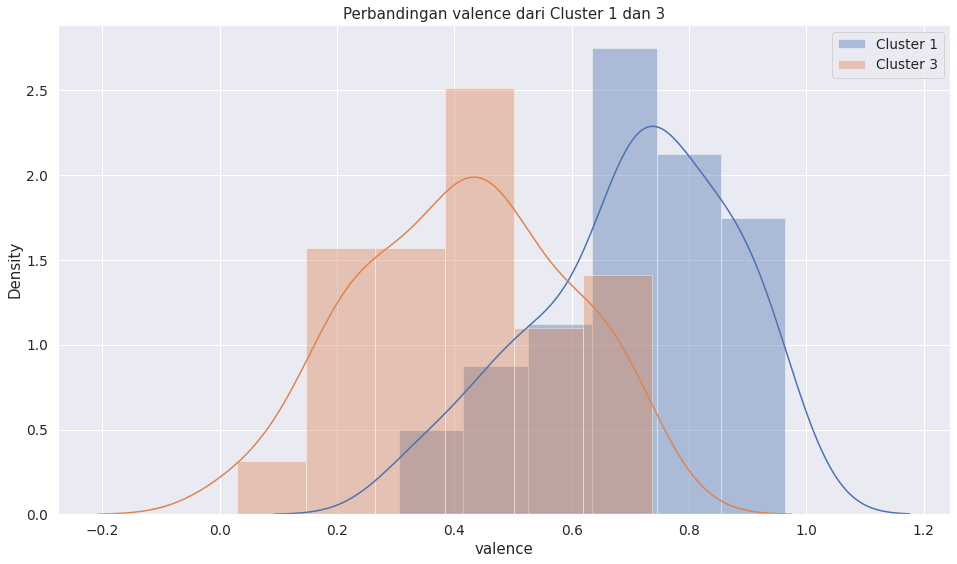

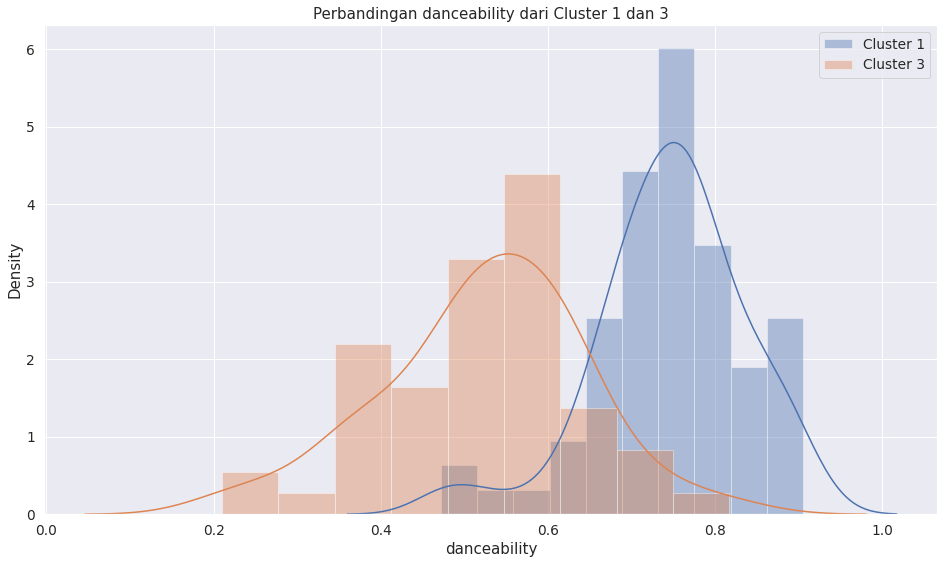

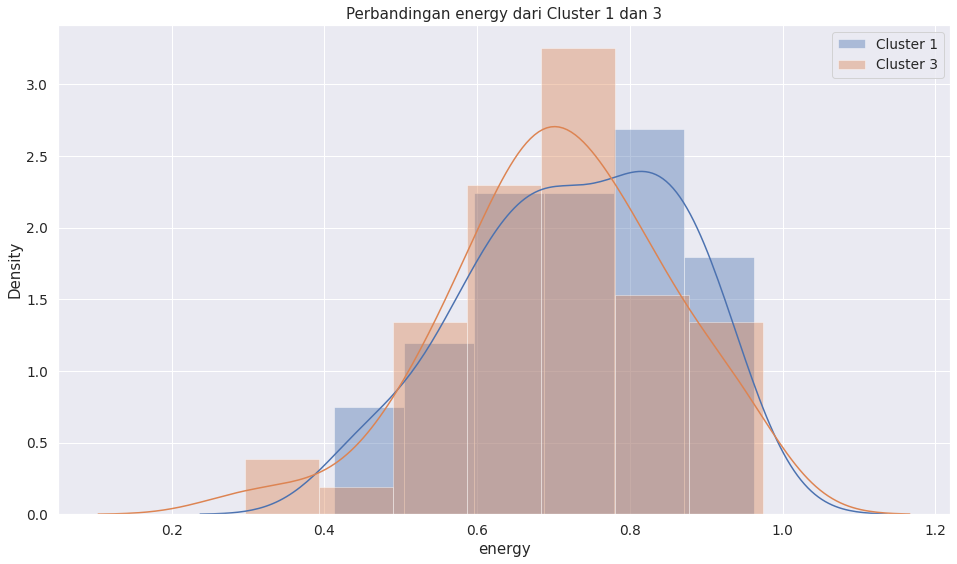

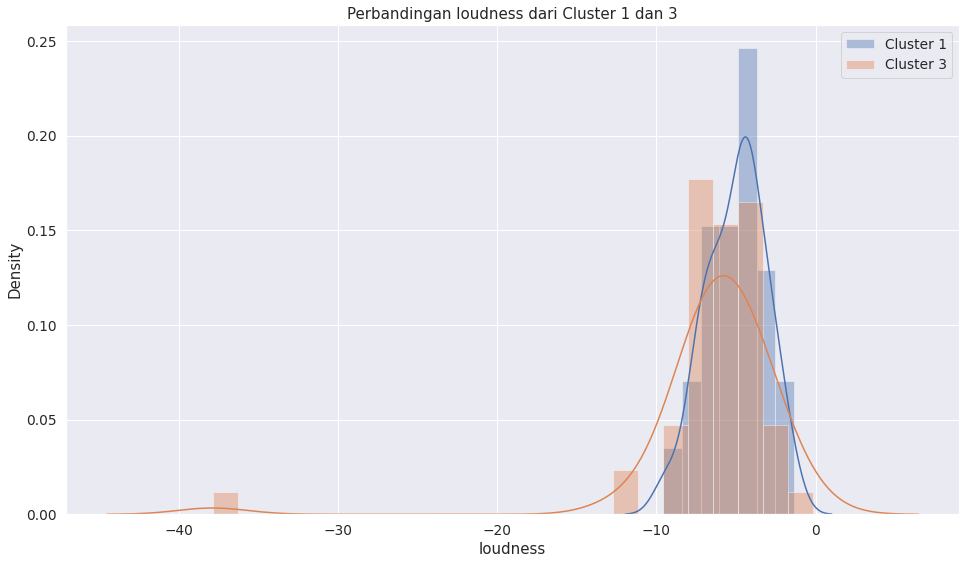

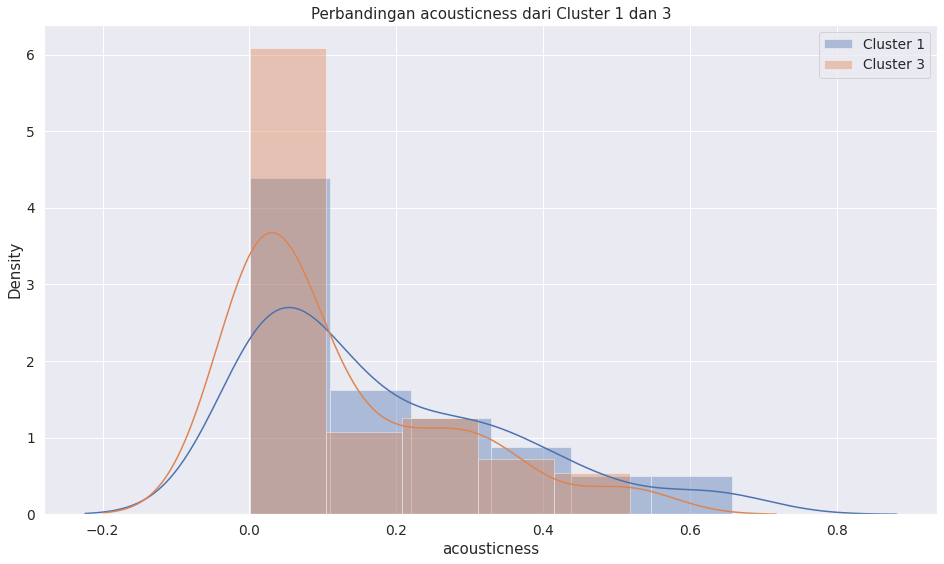

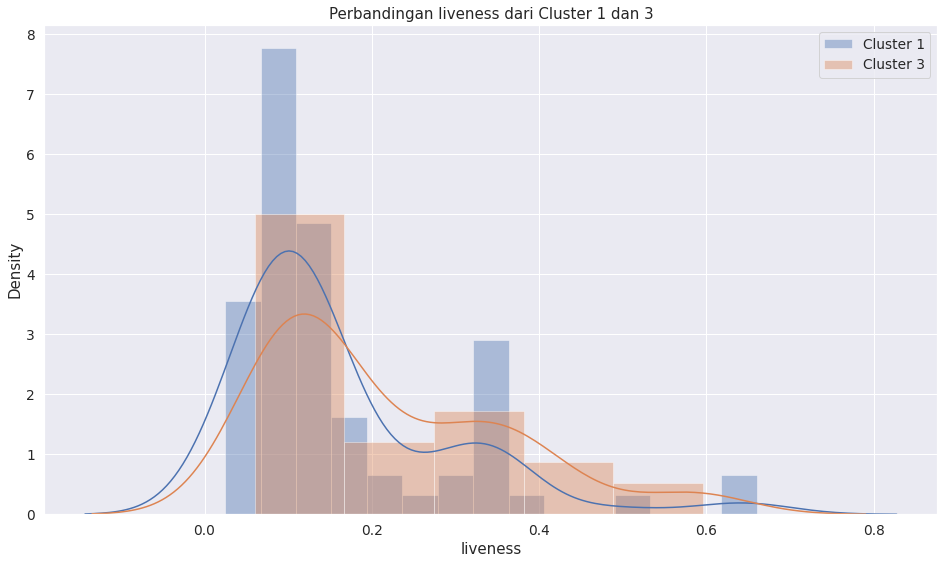

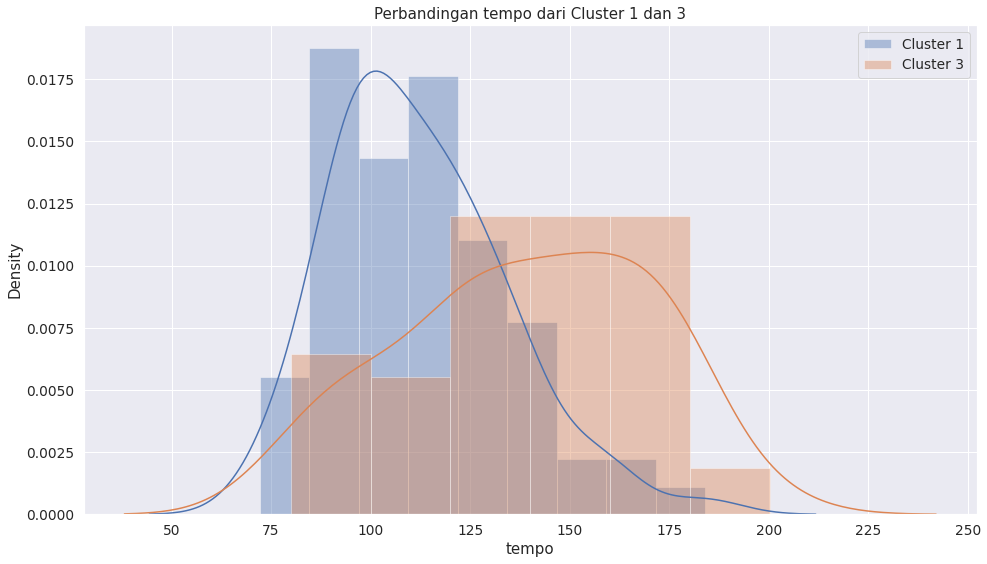

In [ ]:
feature_compared = ['valence', 'danceability', 'energy', 'loudness', 'acousticness', 'liveness', 'tempo']

for feat in feature_compared:
    fig, ax1 = plt.subplots(figsize=(16,9))
    sns.distplot(indo_cluster[indo_cluster['cluster'] == 0][feat], label = 'Cluster 1')
    sns.distplot(indo_cluster[indo_cluster['cluster'] == 2][feat], label = 'Cluster 3')
    plt.title('Perbandingan ' + feat + ' dari Cluster 1 dan 3')
    plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

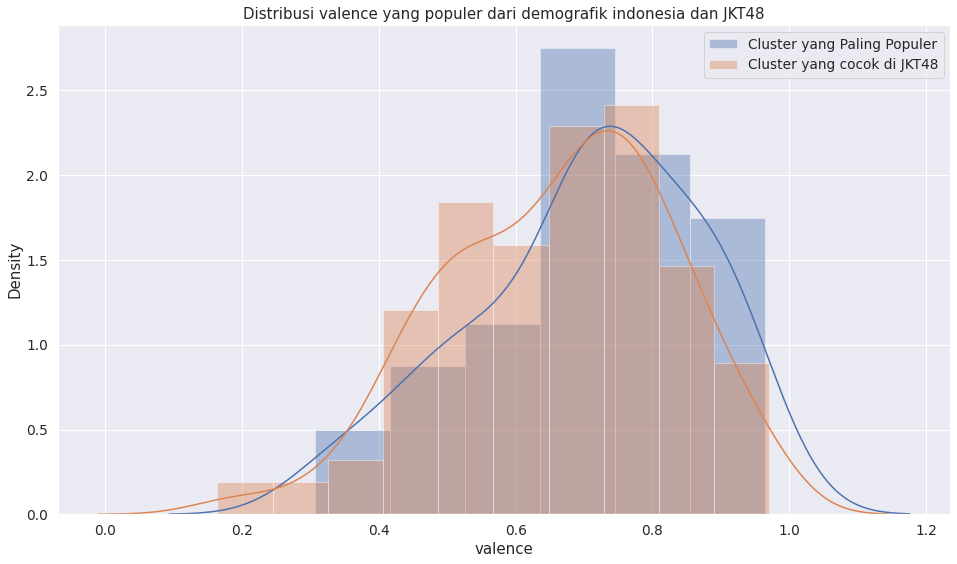

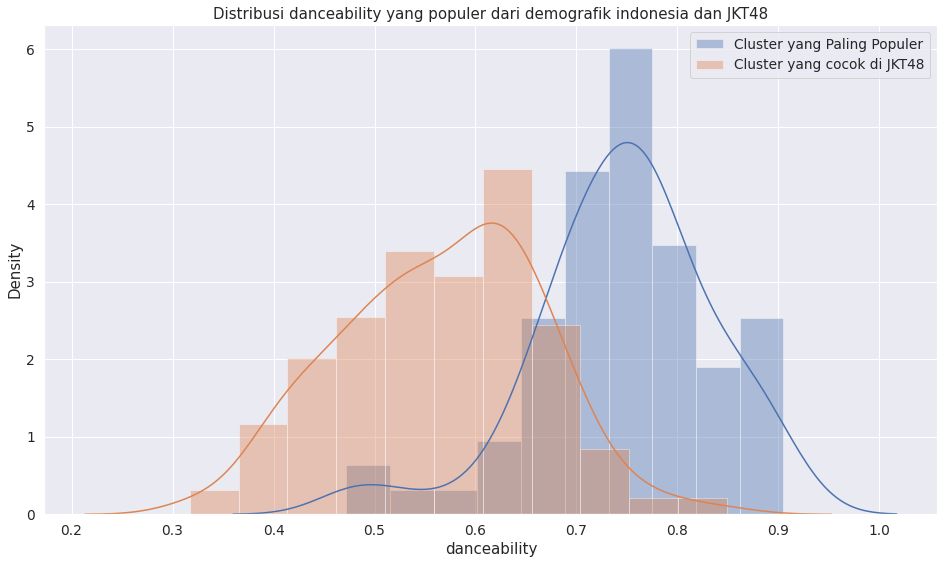

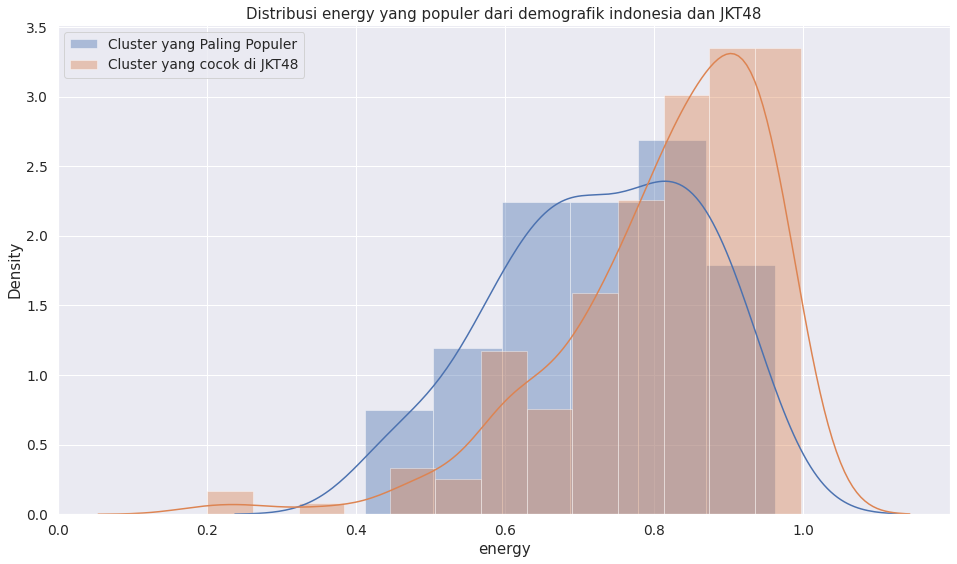

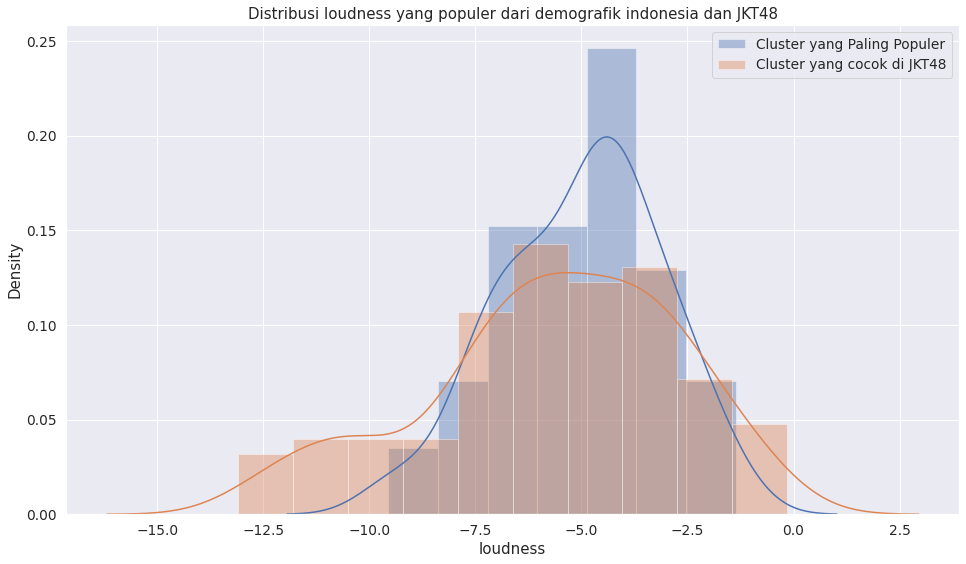

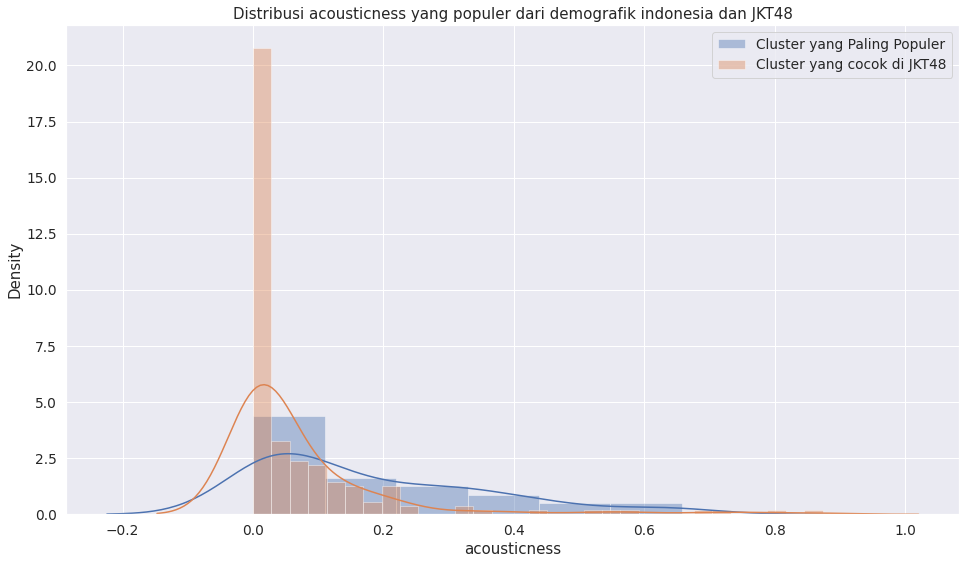

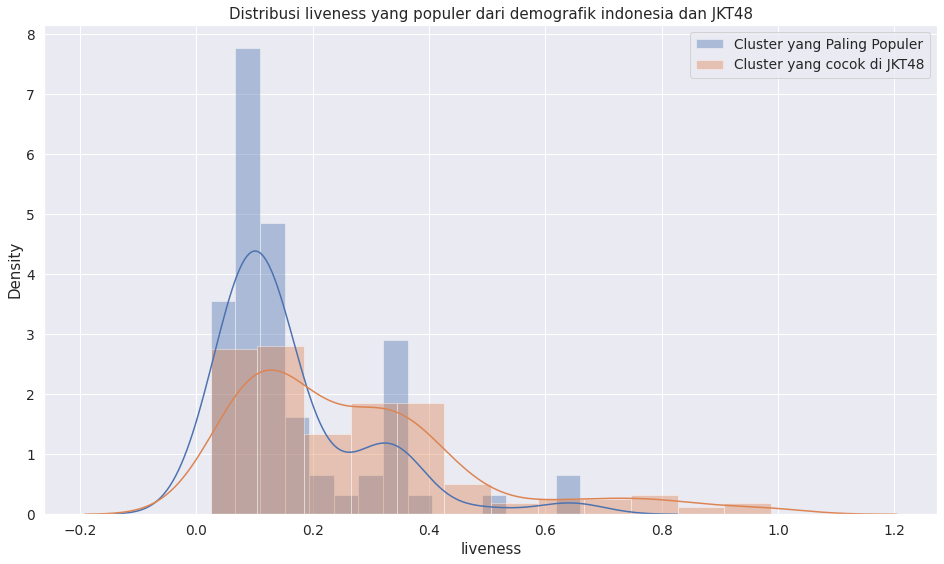

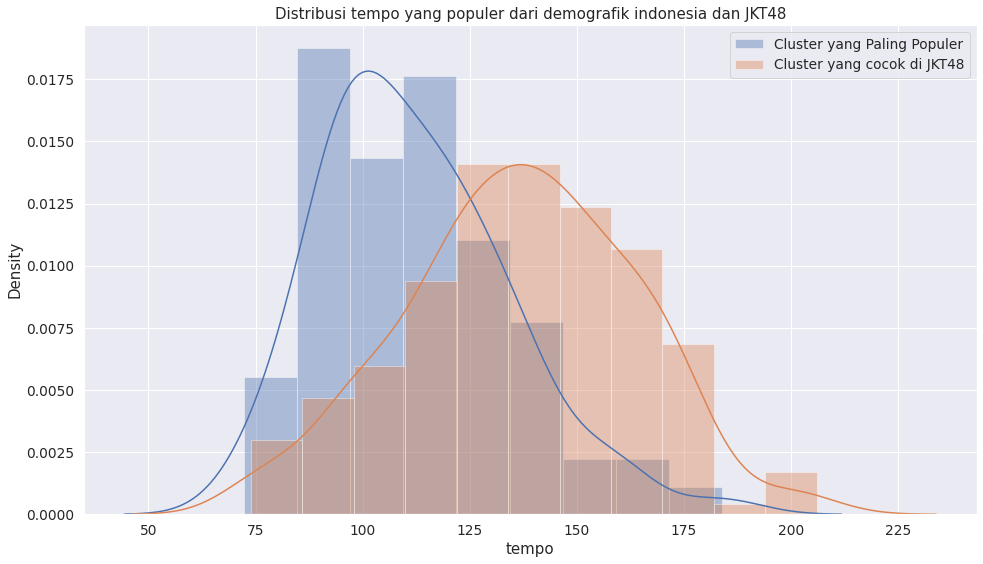

In [ ]:
for feat in feature_compared:
    fig, ax1 = plt.subplots(figsize=(16,9))
    sns.distplot(indo_cluster[indo_cluster['cluster'] == 0][feat], label = 'Cluster yang Paling Populer')
    sns.distplot(df_jkt_id[df_jkt_id['cluster id'] == 2][feat], label = 'Cluster yang cocok di JKT48')
    plt.title('Distribusi ' + feat + ' yang populer dari demografik indonesia dan JKT48')
    plt.legend()

#### Lagu di Jepang

In [ ]:
japan_cluster.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
0    69.706667
3    69.666667
1    68.121951
2    67.822222
Name: popularity, dtype: float64

In [ ]:
df_jkt_jp['cluster jp'].unique()

array([2], dtype=int32)

Membandingkan Cluster 1 dengan Cluster 3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

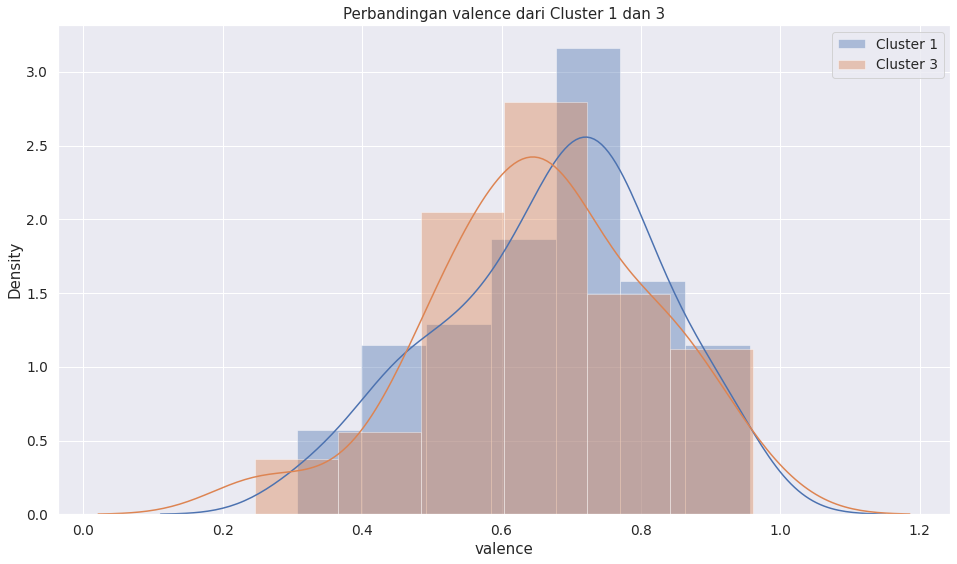

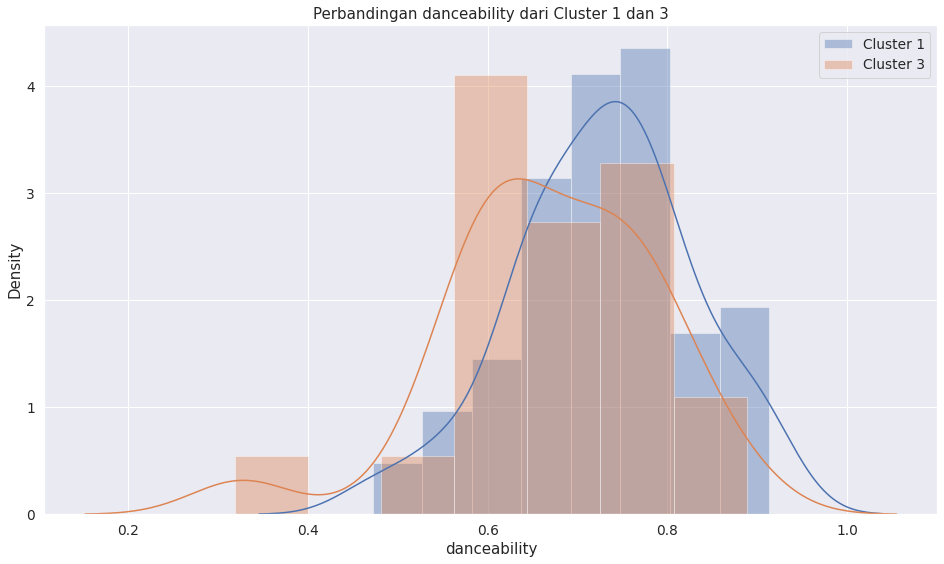

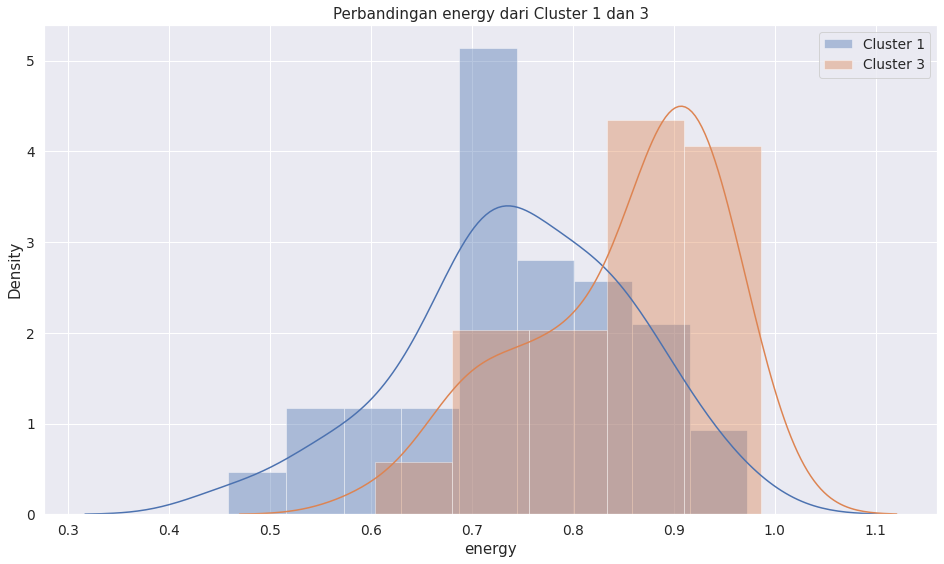

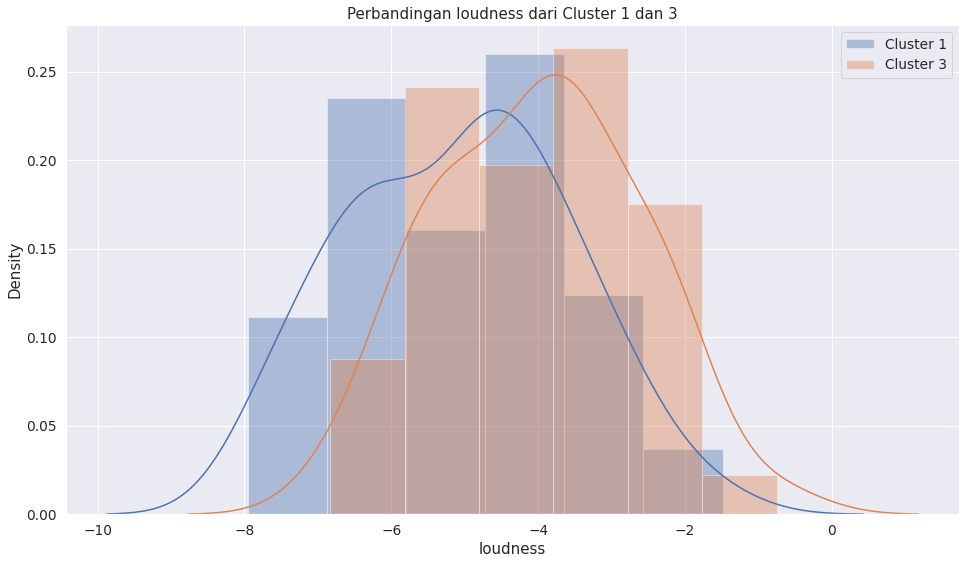

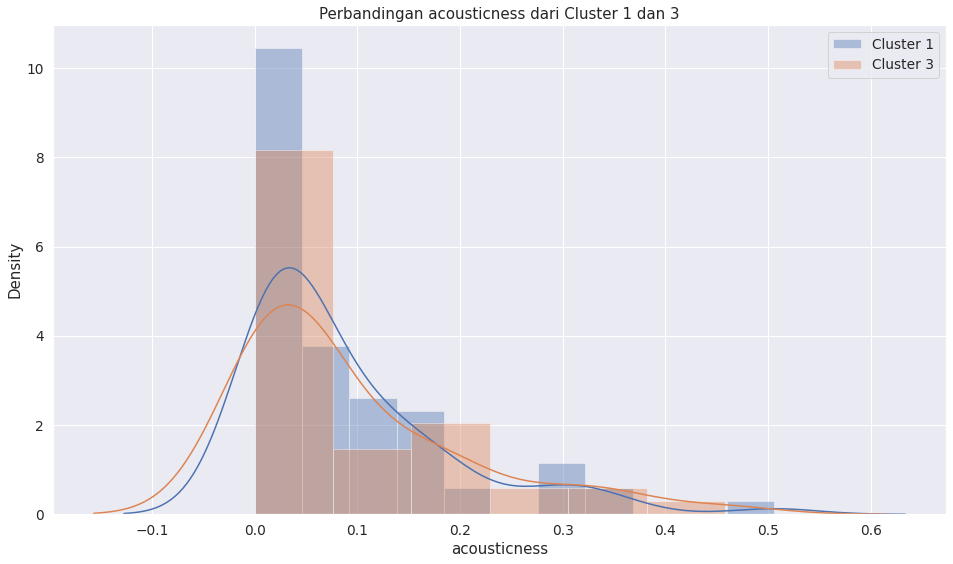

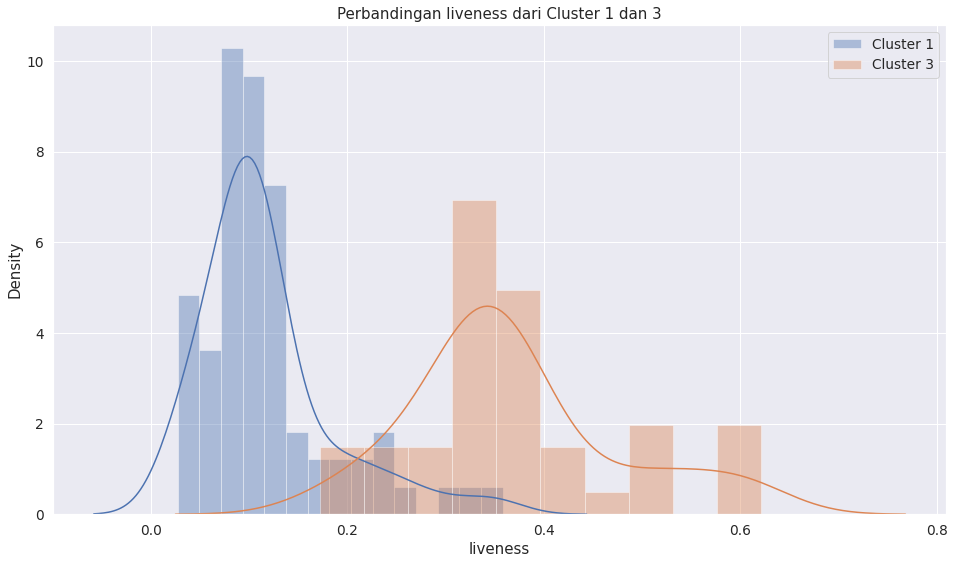

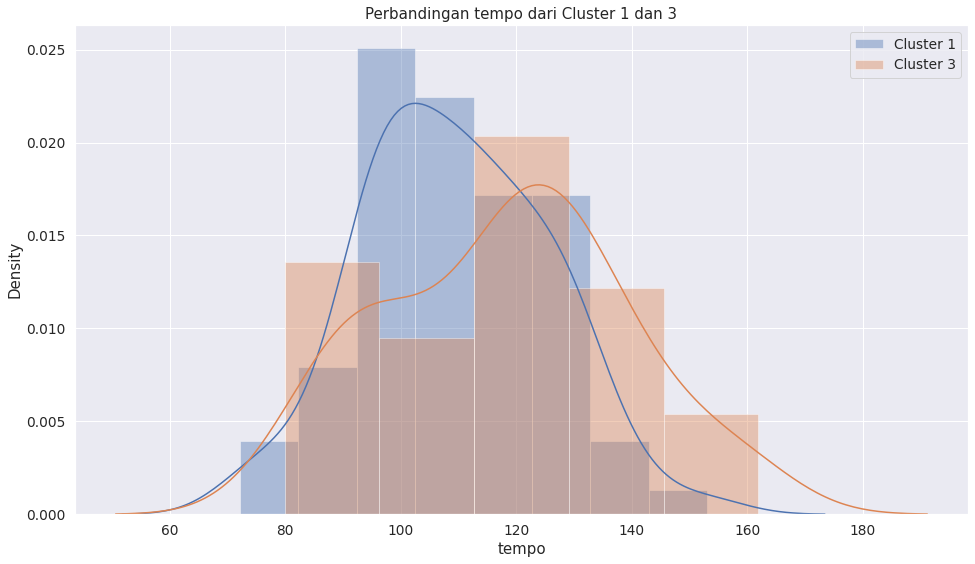

In [ ]:
feature_compared = ['valence', 'danceability', 'energy', 'loudness', 'acousticness', 'liveness', 'tempo']

for feat in feature_compared:
    fig, ax1 = plt.subplots(figsize=(16,9))
    sns.distplot(japan_cluster[japan_cluster['cluster'] == 0][feat], label = 'Cluster 1')
    sns.distplot(japan_cluster[japan_cluster['cluster'] == 2][feat], label = 'Cluster 3')
    plt.title('Perbandingan ' + feat + ' dari Cluster 1 dan 3')
    plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

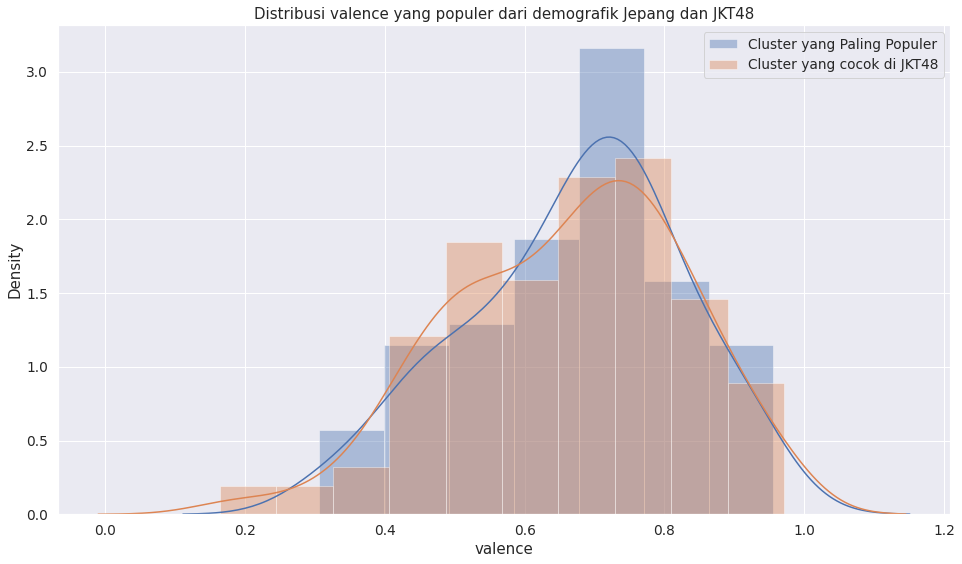

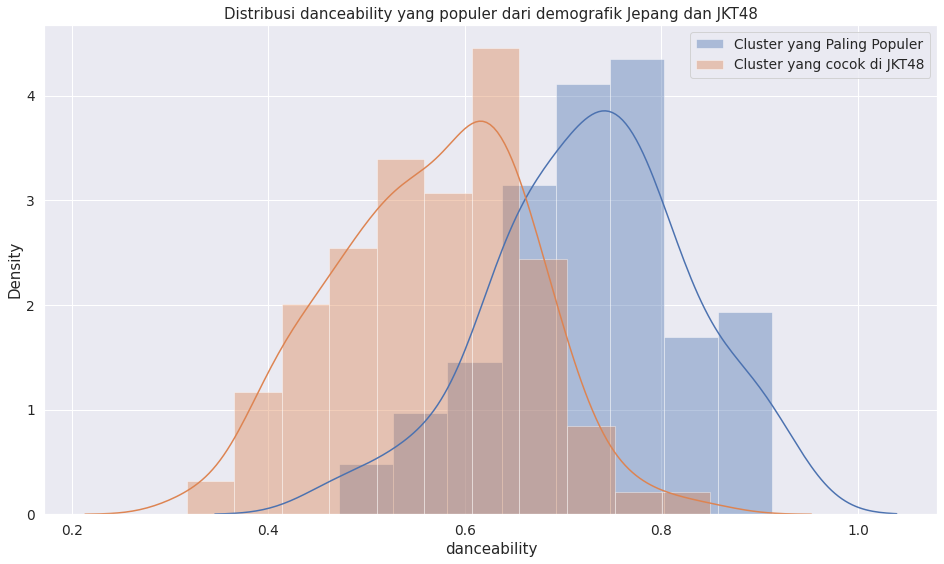

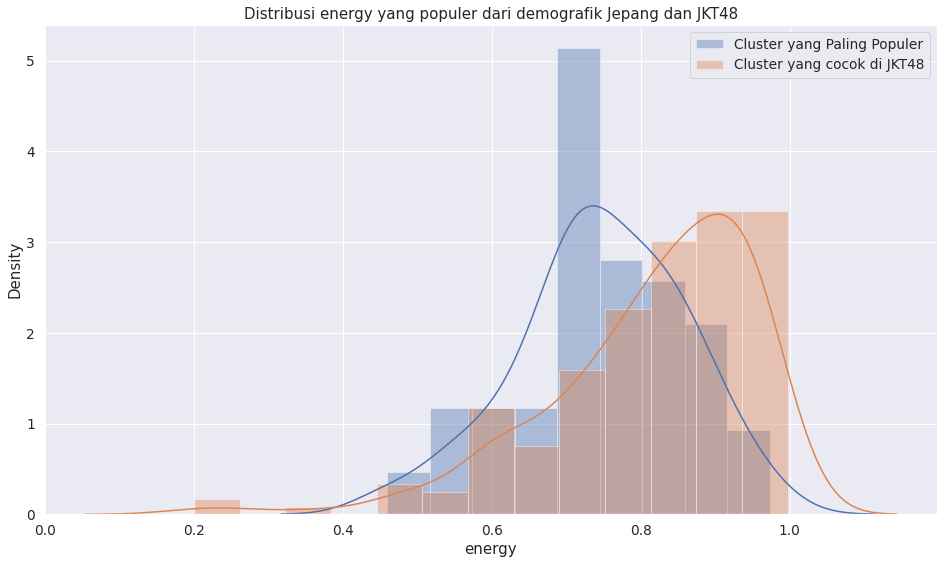

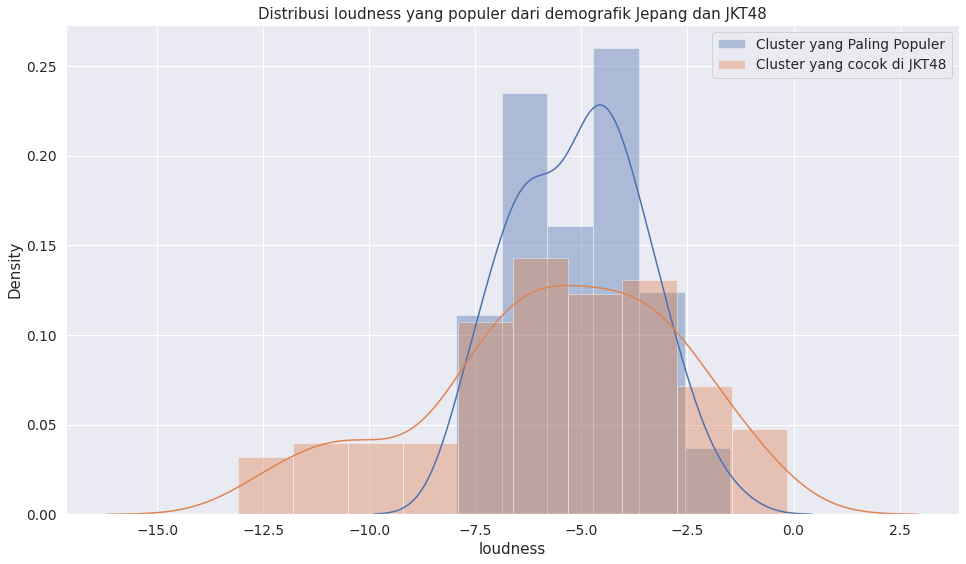

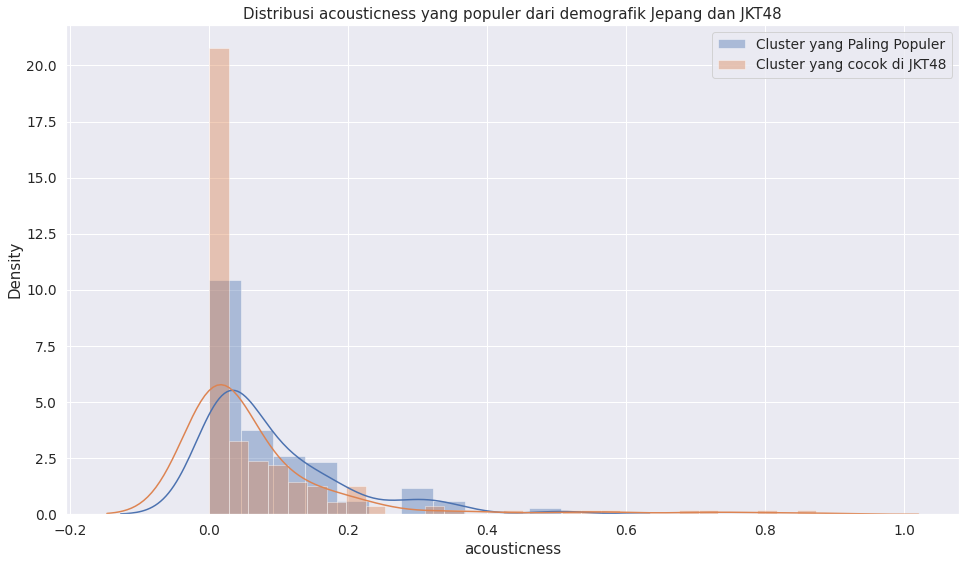

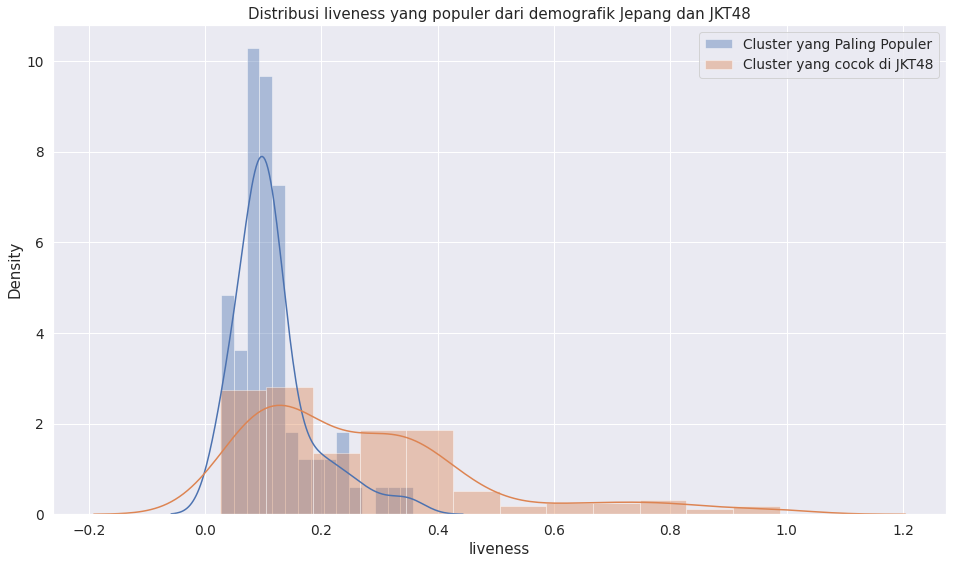

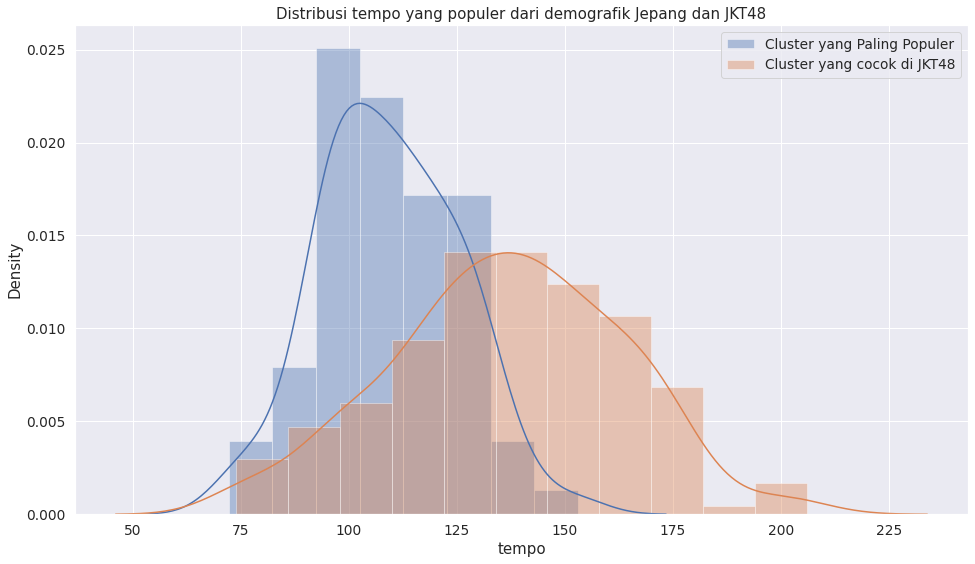

In [ ]:
for feat in feature_compared:
    fig, ax1 = plt.subplots(figsize=(16,9))
    sns.distplot(japan_cluster[japan_cluster['cluster'] == 0][feat], label = 'Cluster yang Paling Populer')
    sns.distplot(df_jkt_jp[df_jkt_jp['cluster jp'] == 2][feat], label = 'Cluster yang cocok di JKT48')
    plt.title('Distribusi ' + feat + ' yang populer dari demografik Jepang dan JKT48')
    plt.legend()

#### Lagu di Korea

In [ ]:
korean_cluster.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
2    69.169231
0    68.552632
3    67.085714
1    62.259259
Name: popularity, dtype: float64

In [ ]:
df_jkt_kr['cluster kr'].unique()

array([0], dtype=int32)

Membandingkan Cluster 3 dengan Cluster 1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

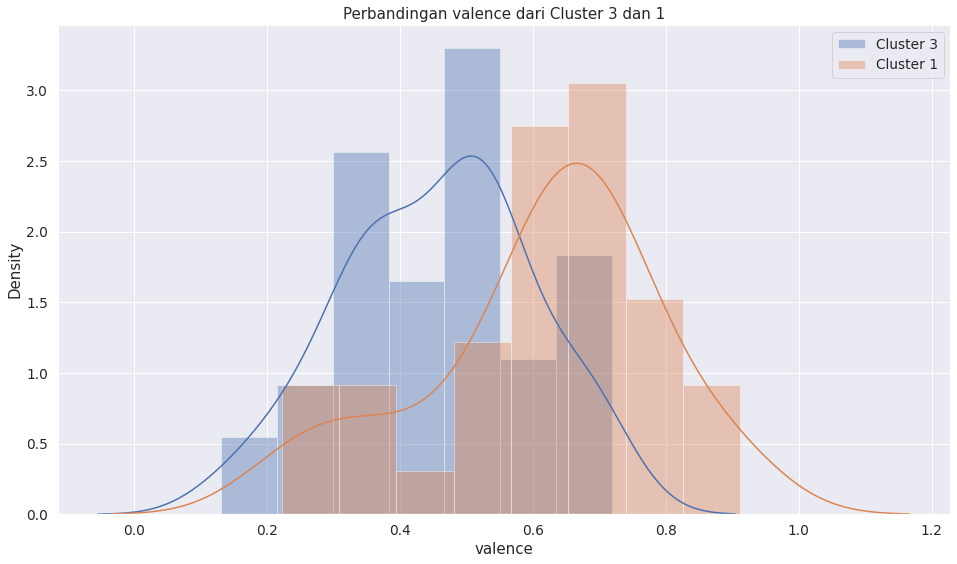

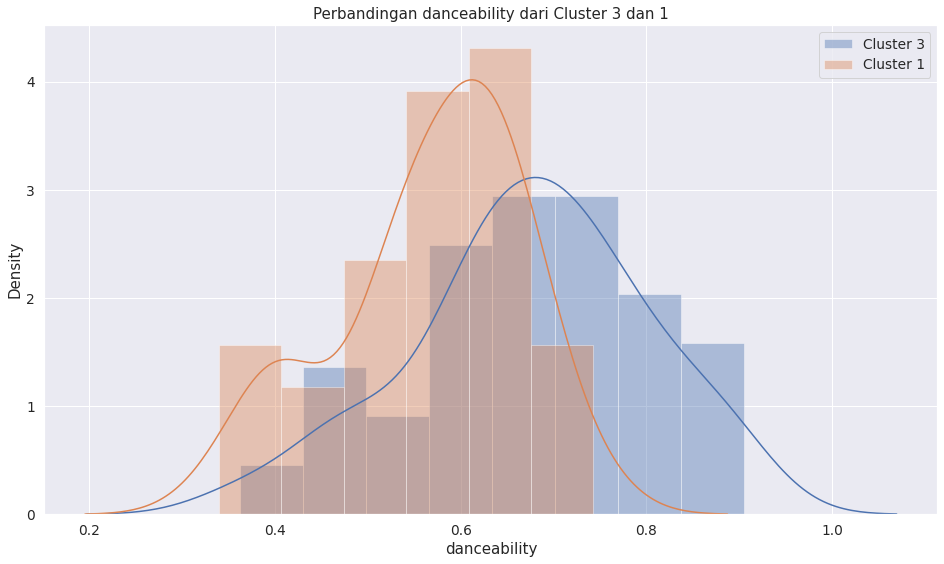

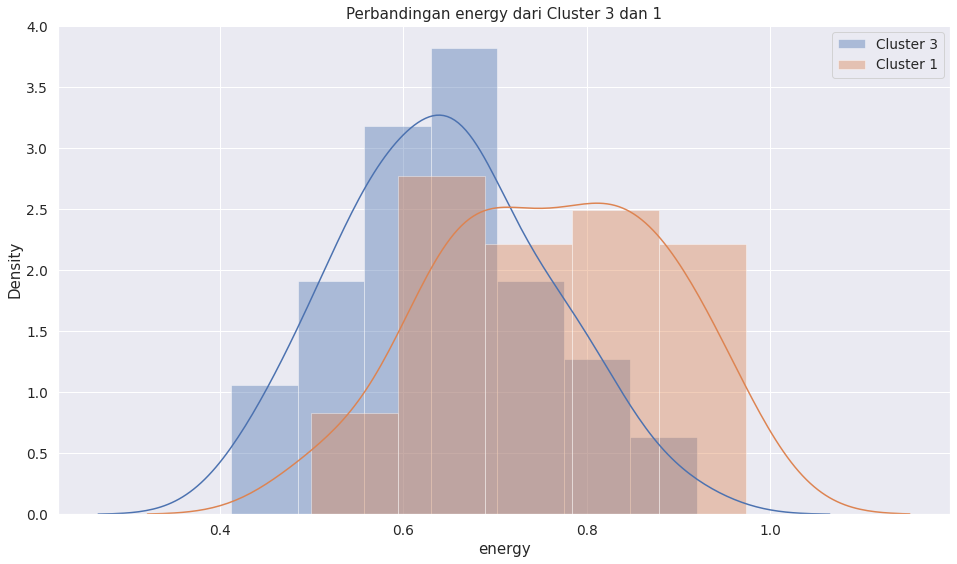

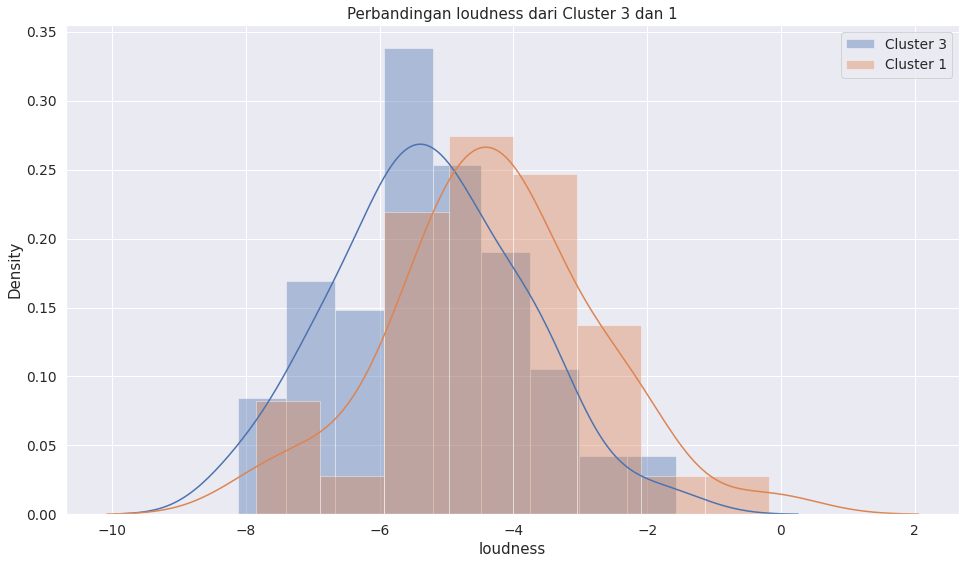

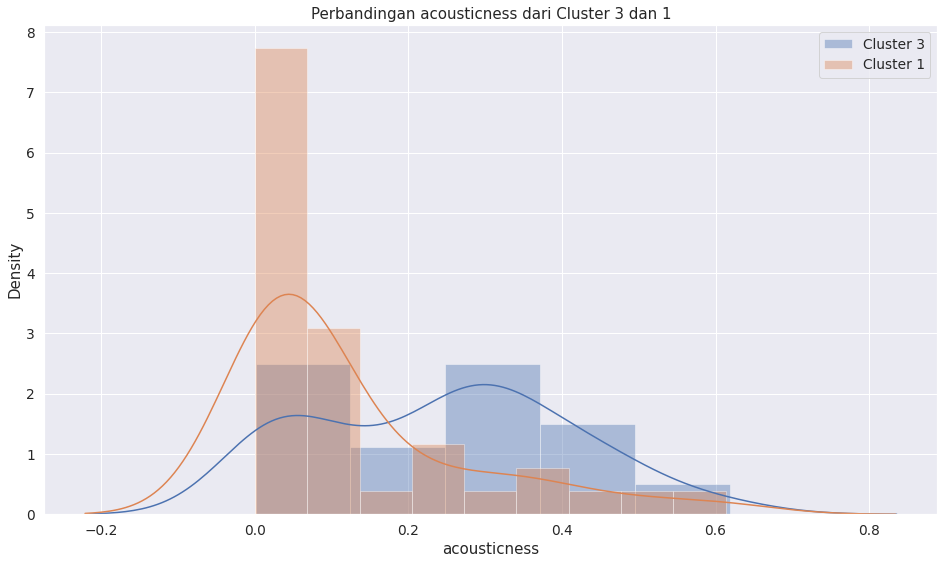

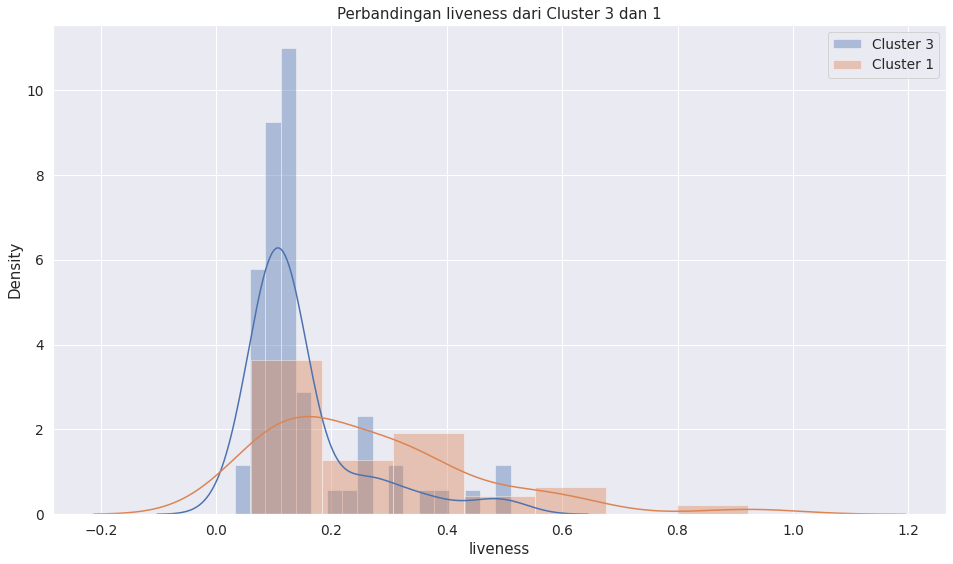

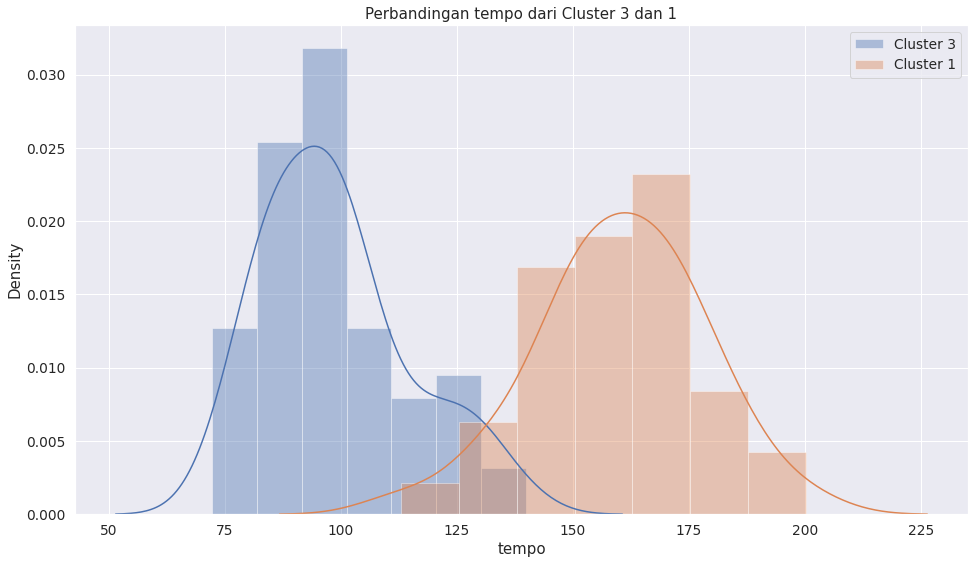

In [ ]:
feature_compared = ['valence', 'danceability', 'energy', 'loudness', 'acousticness', 'liveness', 'tempo']

for feat in feature_compared:
    fig, ax1 = plt.subplots(figsize=(16,9))
    sns.distplot(korean_cluster[korean_cluster['cluster'] == 2][feat], label = 'Cluster 3')
    sns.distplot(korean_cluster[korean_cluster['cluster'] == 0][feat], label = 'Cluster 1')
    plt.title('Perbandingan ' + feat + ' dari Cluster 3 dan 1')
    plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

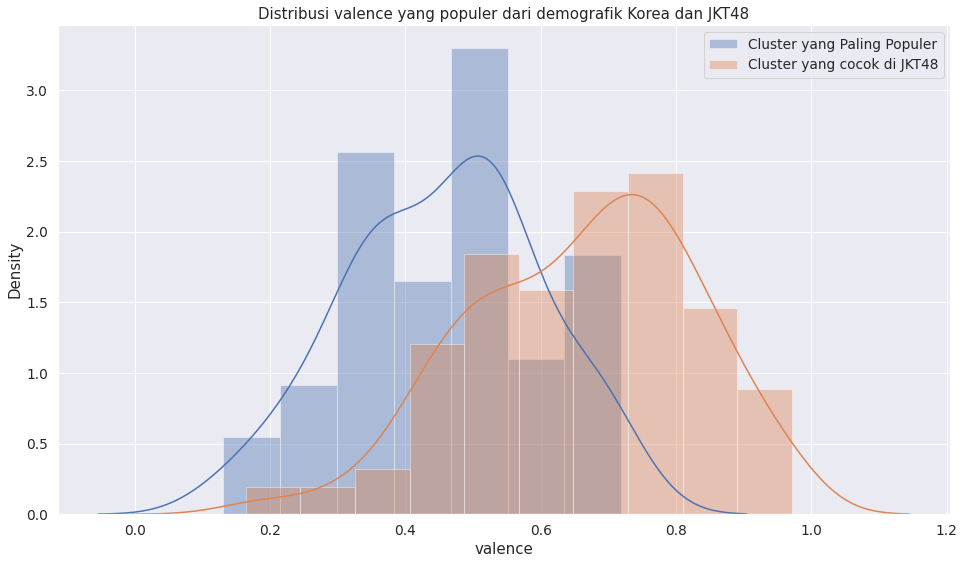

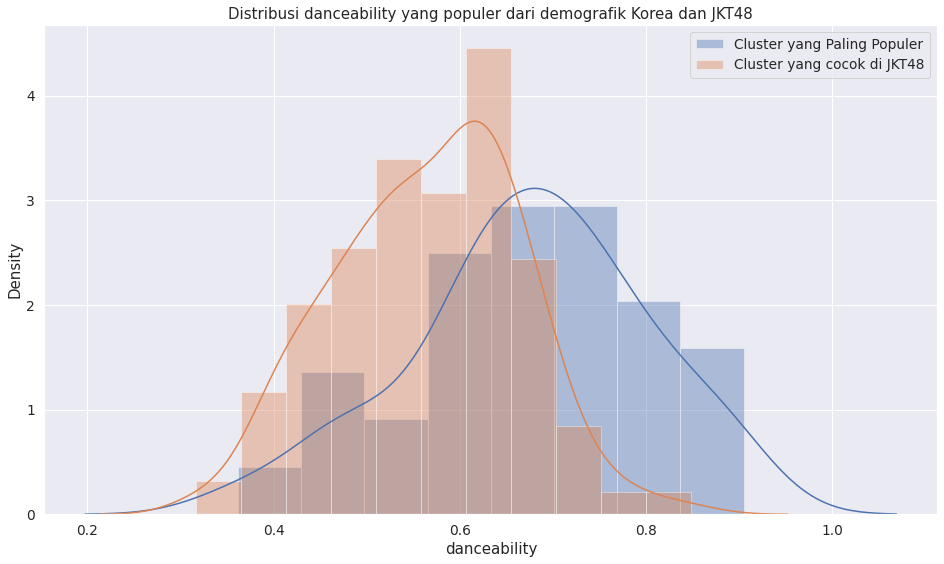

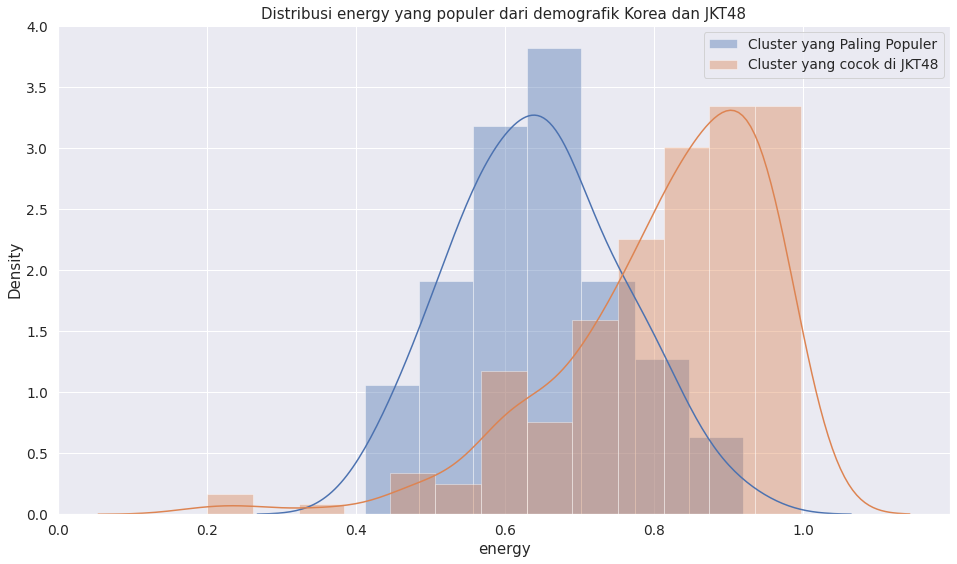

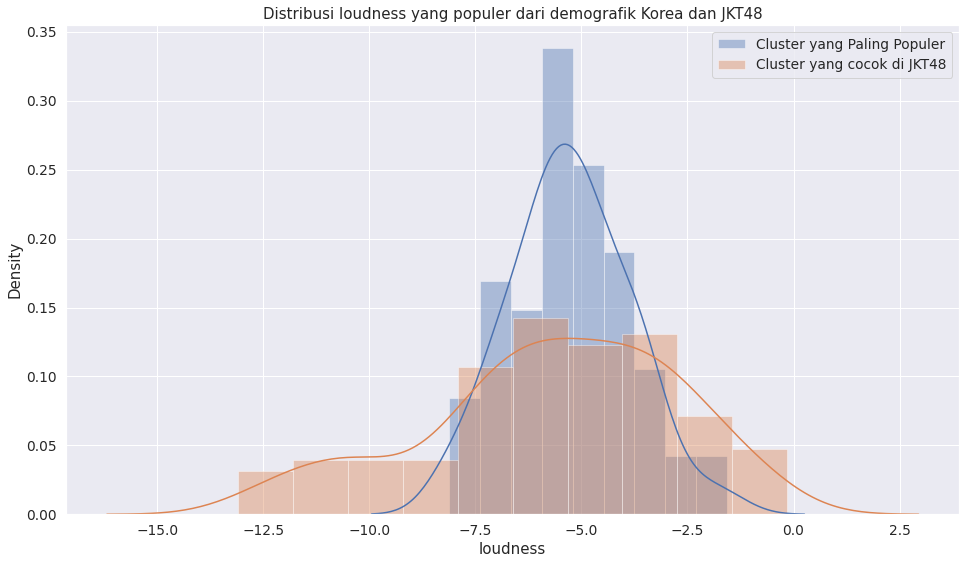

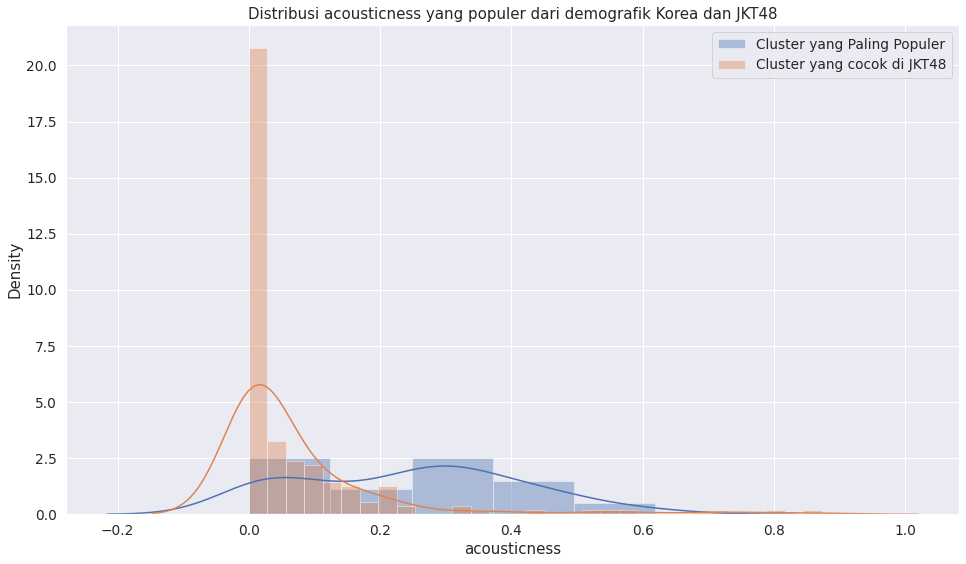

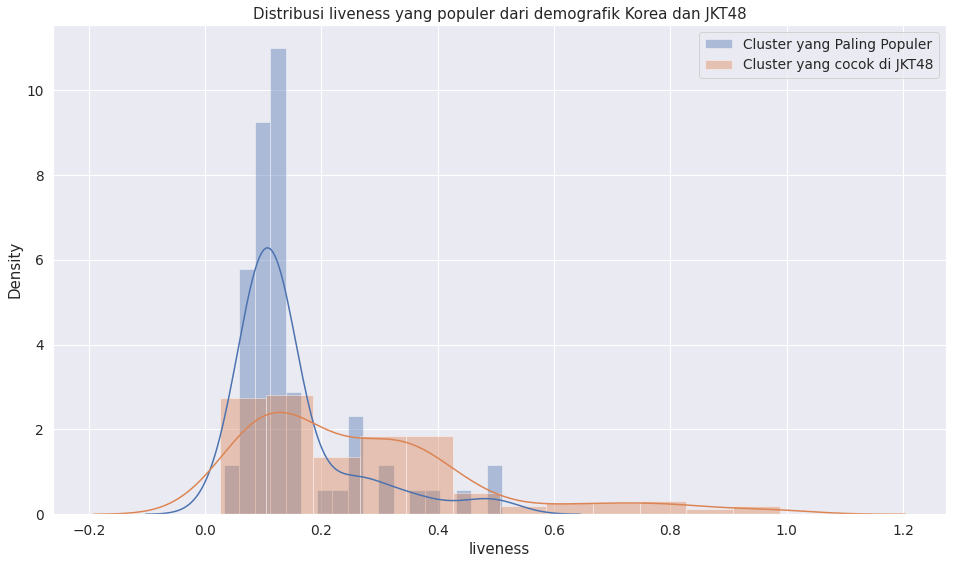

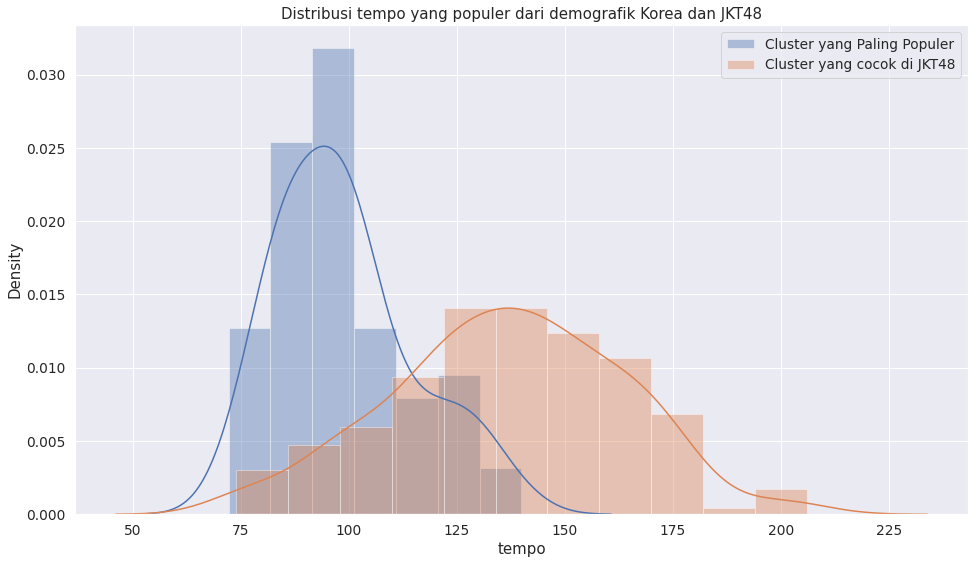

In [ ]:
for feat in feature_compared:
    fig, ax1 = plt.subplots(figsize=(16,9))
    sns.distplot(korean_cluster[korean_cluster['cluster'] == 2][feat], label = 'Cluster yang Paling Populer')
    sns.distplot(df_jkt_kr[df_jkt_kr['cluster kr'] == 0][feat], label = 'Cluster yang cocok di JKT48')
    plt.title('Distribusi ' + feat + ' yang populer dari demografik Korea dan JKT48')
    plt.legend()